# Initialization cell

In [28]:
# initialization cell
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
import scipy 
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'
path_to_kSZ2X_2022 = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/kSZ2X_2022/'
import matplotlib.patches as mpatches

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

arcmin_to_radians = np.pi/(60.*180.)

# the parameters needed for the ksz calculations:
ksz_params = {
#fiducial ksz params

'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
# 'non linear' : 'halofit',


# 'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper

'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,


'ndim_masses' : 80,
'ndim_redshifts' : 80,




'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    
# some settings to try more points to avoid numerical noise in some cases:
# 'ndim_masses' : 100,
# 'ndim_redshifts' : 100,
# 'n_ell_density_profile' : 100,
# 'n_m_density_profile' : 100,
# 'n_z_density_profile' : 100,
    

# slow:
# 'n_z_psi_b1g' : 100,
# 'n_l_psi_b1g' : 400,

# 'n_z_psi_b2g' : 100,
# 'n_l_psi_b2g' : 400,

# 'n_z_psi_b2t' : 100,
# 'n_l_psi_b2t' : 400,

# 'n_z_psi_b1t' : 100,
# 'n_l_psi_b1t' : 100,

# 'n_z_psi_b1gt' : 100,
# 'n_l_psi_b1gt' : 100,
    
    
# fast:
'n_z_psi_b1g' : 50,
'n_l_psi_b1g' : 50,

'n_z_psi_b2g' : 50,
'n_l_psi_b2g' : 50,

'n_z_psi_b2t' : 50,
'n_l_psi_b2t' : 50,

'n_z_psi_b1t' : 50,
'n_l_psi_b1t' : 50,

'n_z_psi_b1gt' : 50,
'n_l_psi_b1gt' : 50,

'N_samp_fftw' : 800, # fast: 800 ;  slow: 2000
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
}

# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'h': 0.6766,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# the common parameters:

common_params = {

'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
    

'delta for galaxies' : "200c",
'delta for matter density' : "200c",
'delta for electron density':"200c",    

'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non linear' : 'halofit',
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
    
'f_free' : 1.0,
    

# 'ndim_masses': 150,
# 'ndim_redshifts': 150,

# 'P_k_max_h/Mpc': 50.0,
# 'k_min_for_pk_class_sz': 0.0001,
# 'k_max_for_pk_class_sz': 10.0,
# 'k_per_decade_class_sz': 20.0,
    
'x_out_truncated_nfw_profile':1.,
'x_out_truncated_density_profile (electrons)': 1., 
'use_xout_in_density_profile_from_enclosed_mass': 1,
'normalize_gas_density_profile': 0, # only useful when we dont set xout_in_density_profile_from_enclosed_mass, e.g., computing the transform as in Cayuso et al 2021 
    
'ksz template file': path_to_kSZ2X_2022+'external_data/dl_ksz_hm_agn_1p2h_uK2_170422.txt',
'ksz template file, reio contribution': path_to_kSZ2X_2022+'external_data/dl_ksz_hm_agn_1p2h_uK2_170422_zeros.txt',
     
}


# HOD params for kSZ2-g

bestfit_blue_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "blue",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
# 'UNWISE_fdndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_fdndz.txt",

   

'sigma_log10M_HOD' : 0.69,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 5.03e12, # Msun/h
'M_min_HOD' : 6.25e11, # Msun/h
'cl_gal_gal_A_sn' : -0.26e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 1.09,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
   
    
}

bestfit_green_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "green",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
   

'sigma_log10M_HOD' : 0.97,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 2.76e13, # Msun/h
'M_min_HOD' : 1.34e13, # Msun/h
'cl_gal_gal_A_sn' : 1.38e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 2.75,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
 
    
}


T_cmb = 2.7255
l_max_planck = 3000
l_max_advact_s4_so = 8000



# Derived Parameters

In [4]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({
'output':'mPk,tSZ_1h', # request sz to get class_sz derived params, e.g, f_b. 
})

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 5.4624 seconds


In [5]:
print(M.sigma8())
print(M.Neff())
print(M.Omega_m())
print(M.Omega_b())
print(M.get_f_free())
print(M.get_f_b(),M.Omega_b()/M.Omega_m())
print(M.get_current_derived_parameters(['YHe']))
print((1.-M.get_current_derived_parameters(['YHe'])['YHe']/2.)**-1)

0.8100261899694395
3.0459982214534316
0.31104850446994275
0.04897468161869667
1.0
0.15745030410017352 0.15745030410017352
{'YHe': 0.2454149068768628}
1.1398706211734808


# DES/VRO/Euclid-like galaxy distribution

(0.0, 1.4)

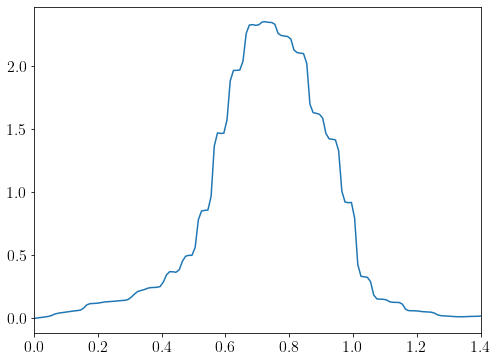

In [9]:
ng = np.loadtxt(path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt')
np.shape(ng)
plt.plot(ng[:,0],ng[:,1])
plt.xlim(0.,1.4)

# Templates for computation of filters

In [6]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({
'dell':0.,
'dlogell':0.2,
'ell_max' : 12000,
'ell_min' : 2,
})

M.set({

'output':'kSZ_kSZ_1h,kSZ_kSZ_2h',
'gas profile':'nfw',
})

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

cl_ksz_nfw = M.cl_ksz()




M.set({

'output':'tCl,lCl,kSZ_kSZ_1h,kSZ_kSZ_2h',
'modes':'s',
'lensing': 'yes',
'l_max_scalars':12000,

'gas profile':'B16',
'gas profile mode' : 'agn',

})
        
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

cl_ksz_b16_agn = M.cl_ksz()
lensed_cl = M.lensed_cl()

computed in 5.8194 seconds
computed in 19.6606 seconds


In [7]:
print(M.get_f_b())

0.15745030410017352


## save the templates

In [15]:
x = cl_ksz_b16_agn['ell']
y = (np.asarray(cl_ksz_b16_agn['1h'])+np.asarray(cl_ksz_b16_agn['2h']))

y_1h = (np.asarray(cl_ksz_b16_agn['1h']))
y_2h = (np.asarray(cl_ksz_b16_agn['2h']))

dl_ksz_hm = y*(M.T_cmb()*1e6)**2.
dl_ksz_hm_1h = y_1h*(M.T_cmb()*1e6)**2.
dl_ksz_hm_2h = y_2h*(M.T_cmb()*1e6)**2.

l_ksz_hm  = x
dl_ksz_hm_interp = scipy.interpolate.interp1d(l_ksz_hm,dl_ksz_hm)
dl_ksz_hm_1h_interp = scipy.interpolate.interp1d(l_ksz_hm,dl_ksz_hm_1h)
dl_ksz_hm_2h_interp = scipy.interpolate.interp1d(l_ksz_hm,dl_ksz_hm_2h)

newl = np.arange(2,10000)


np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_interp(newl)])
np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422_zeros.txt',np.c_[newl,0.*dl_ksz_hm_interp(newl)])
np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_1h_interp(newl)])
np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_2h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_2h_interp(newl)])

x = cl_ksz_nfw['ell']
y = (np.asarray(cl_ksz_nfw['1h'])+np.asarray(cl_ksz_nfw['2h']))

y_1h = (np.asarray(cl_ksz_nfw['1h']))
y_2h = (np.asarray(cl_ksz_nfw['2h']))

dl_ksz_hm_nfw = y*(M.T_cmb()*1e6)**2.
dl_ksz_hm_nfw_1h = y_1h*(M.T_cmb()*1e6)**2.
dl_ksz_hm_nfw_2h = y_2h*(M.T_cmb()*1e6)**2.

l_ksz_hm_nfw  = x
dl_ksz_hm_nfw_interp = scipy.interpolate.interp1d(l_ksz_hm_nfw,dl_ksz_hm_nfw)
dl_ksz_hm_nfw_1h_interp = scipy.interpolate.interp1d(l_ksz_hm_nfw,dl_ksz_hm_nfw_1h)
dl_ksz_hm_nfw_2h_interp = scipy.interpolate.interp1d(l_ksz_hm_nfw,dl_ksz_hm_nfw_2h)

np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_nfw_1p2h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_nfw_interp(newl)])
np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_nfw_1h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_nfw_1h_interp(newl)])
np.savetxt(path_to_kSZ2X_2022+'dl_ksz_hm_nfw_2h_uK2_170422.txt',np.c_[newl,dl_ksz_hm_nfw_2h_interp(newl)])



ls = M.raw_cl()['ell']
dls = M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2./np.pi*M.raw_cl()['tt']
dls_interp = scipy.interpolate.interp1d(ls,dls)
np.savetxt(path_to_kSZ2X_2022+'dl_TT_unlensed_dimensionless_170422.txt',np.c_[newl,dls_interp(newl)])

ls = M.lensed_cl()['ell']
dls = M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt']
dls_interp = scipy.interpolate.interp1d(ls,dls)
np.savetxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',np.c_[newl,dls_interp(newl)])


l_arr = newl
DeltaT = 47.*arcmin_to_radians
ThetaFWHM = 5.*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))

np.savetxt(path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',np.c_[l_arr,Nl])

l_arr = newl
DeltaT = 20.*arcmin_to_radians
ThetaFWHM = 1.4*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))

np.savetxt(path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',np.c_[l_arr,Nl])

l_arr = newl
DeltaT = 20.*arcmin_to_radians
ThetaFWHM = 1.5*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))

np.savetxt(path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',np.c_[l_arr,Nl])

l_arr = newl
DeltaT = 10.*arcmin_to_radians
ThetaFWHM = 1.4*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))

np.savetxt(path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',np.c_[l_arr,Nl])



l_arr = newl
DeltaT = 10.*arcmin_to_radians
ThetaFWHM = 1.5*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))

np.savetxt(path_to_kSZ2X_2022+'nl_advact_10uK_1p5arcmin_uK2_170422.txt',np.c_[l_arr,Nl])




nl_so_goal_l, nl_so_goal_nl_std_ilc, nl_so_goal_nl_cilc_tsz, nl_so_goal_nl_cilc_cib, nl_so_goal_nl_cilc_tszcib = np.loadtxt(path_to_kSZ2X_2022+'external_data/SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt',unpack=True)
ls4,nls4,ys4 = np.loadtxt(path_to_kSZ2X_2022+'external_data/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',unpack=True)



np.savetxt(path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',
           np.c_[nl_so_goal_l,nl_so_goal_nl_std_ilc])
np.savetxt(path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',
           np.c_[ls4,nls4])




In [8]:
newl = np.arange(2,10000)
l_arr = newl
DeltaT = 2.3*arcmin_to_radians
ThetaFWHM = 1.5*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))

np.savetxt(path_to_kSZ2X_2022+'nl_spt_2p3uK_1p5arcmin_uK2_070722.txt',np.c_[l_arr,Nl])



## plot the templates cl ksz

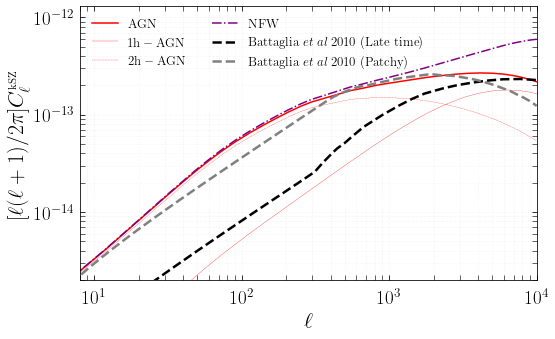

In [16]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')

ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{_\mathrm{kSZ}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)


x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
ax.plot(x,y*(T_cmb*1e6)**-2.,c='r',label=r'$\mathrm{AGN}$')

x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1h_uK2_170422.txt',unpack=True)
ax.plot(x,y*(T_cmb*1e6)**-2.,c='r',
        lw=0.3,
        label=r'$1\mathrm{h}-\mathrm{AGN}$')

x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_2h_uK2_170422.txt',unpack=True)
ax.plot(x,y*(T_cmb*1e6)**-2.,c='r',
        lw=0.3,ls='--',
        label=r'$2\mathrm{h}-\mathrm{AGN}$')


x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_nfw_1p2h_uK2_170422.txt',unpack=True)
ax.plot(x,y*(T_cmb*1e6)**-2.,c='purple',ls='-.',label=r'$\mathrm{NFW}$')


l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
ax.plot(l_bat,dl_bat*(T_cmb*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$ $(\mathrm{Late}$  $\mathrm{time})$',ls='--',c='k',lw=2.5)

l_bat_patchy,dl_bat_patchy = np.loadtxt(path_to_files+'/FBN_kSZ_PS_patchy.d.txt',unpack=True)
ax.plot(l_bat_patchy,dl_bat_patchy*(T_cmb*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$ $(\mathrm{Patchy})$',ls='--',c='grey',lw=2.5)


# ax.plot(l_bat_patchy,(dl_bat_patchy+dl_bat)*(M.T_cmb()*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$ - Patchy',ls='--',c='grey',lw=2.5)




ax.set_yscale('log')
ax.set_xscale('log')
# ax.legend(fontsize=14,frameon=False)
ax.set_ylim(2e-15,13e-13)
ax.set_xlim(8,1e4)


    
ax.legend(frameon=False,fontsize=13,loc=2,ncol=2)

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_kSZ.pdf')

## plot the templates cl's and nl's

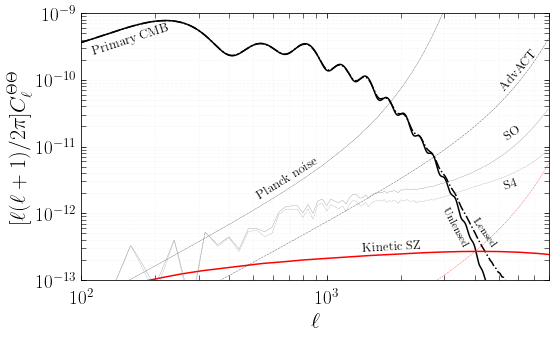

In [20]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{\Theta\Theta}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)



x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
ax.plot(x,y,c='k',ls='-.',label=r'lensed cmb')

x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_unlensed_dimensionless_170422.txt',unpack=True)
ax.plot(x,y,c='k',ls='-',label=r'unlensed cmb')


x,y = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
ax.plot(x,y*(T_cmb*1e6)**-2.,c='r',label=r'kSZ $\mathrm{AGN}$')


x,y = np.loadtxt(path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',unpack=True)
ax.plot(x,x*(x+1.)/2./np.pi*y*(T_cmb*1e6)**-2.,c='k',ls='--',label=r'Planck noise',lw=0.3)


x,y = np.loadtxt(path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',unpack=True)
ax.plot(x,x*(x+1.)/2./np.pi*y*(T_cmb*1e6)**-2.,c='k',ls='-.',label=r'AdvACT noise',lw=0.3)

x,y = np.loadtxt(path_to_kSZ2X_2022+'nl_spt_2p3uK_1p5arcmin_uK2_070722.txt',unpack=True)
ax.plot(x,x*(x+1.)/2./np.pi*y*(T_cmb*1e6)**-2.,c='r',ls='-.',label=r'SPT noise',lw=0.3)

x,y = np.loadtxt(path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',unpack=True)
ax.plot(x,x*(x+1.)/2./np.pi*y*(T_cmb*1e6)**-2.,c='grey',ls='-',label=r'SO noise',lw=0.3)

x,y = np.loadtxt(path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',unpack=True)
ax.plot(x,x*(x+1.)/2./np.pi*y*(T_cmb*1e6)**-2.,ls='--',c='grey',label=r'S4 noise',lw=0.3)




    

    
    

    
    

    


    
 

textstr  = r'$\mathrm{Lensed}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.835, 0.24, textstr, transform=ax.transAxes, 
        fontsize=11,rotation=-55,
        verticalalignment='top')
        #,bbox=props)      


    
textstr  = r'$\mathrm{Unlensed}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.77, 0.278, textstr, transform=ax.transAxes, fontsize=11,rotation=-62,
        verticalalignment='top')
        #,bbox=props)  
    
textstr  = r'$\mathrm{S4}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.9, 0.39, textstr, transform=ax.transAxes, fontsize=13,rotation=19,
        verticalalignment='top')
        #,bbox=props)


textstr  = r'$\mathrm{SO}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.9, 0.59, textstr, transform=ax.transAxes, fontsize=13,rotation=35,
        verticalalignment='top')
        #,bbox=props)
    

textstr  = r'$\mathrm{AdvACT}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.89, 0.875, textstr, transform=ax.transAxes, fontsize=13,rotation=49,
        verticalalignment='top')
        #,bbox=props)
 

textstr  = r'$\mathrm{Planck}\,\,\mathrm{noise}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.37, 0.47, textstr, transform=ax.transAxes, fontsize=13,rotation=32,
        verticalalignment='top')
        #,bbox=props)
    
textstr  = r'$\mathrm{Primary\,\,CMB}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.02, 0.97, textstr, transform=ax.transAxes, fontsize=13,rotation=18,
        verticalalignment='top')
        #,bbox=props)

    
textstr  = r'$\mathrm{Kinetic\,\,SZ}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.60, 0.155, textstr, transform=ax.transAxes, fontsize=13,rotation=3,
        verticalalignment='top')
        #,bbox=props)
    
    
ax.set_yscale('log')
ax.set_xscale('log')
# ax.legend(fontsize=12)
ax.set_ylim(1e-13,1e-9)
ax.set_xlim(1e2,8e3)

# plt.legend(fontsize=10,frameon=False)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_figure.pdf')

## Planck filter "b*F" define and save

In [41]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 5.*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_planck)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_planck)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_planck)/50.))

np.savetxt(path_to_kSZ2X_2022+'planck_fl_A_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A])
np.savetxt(path_to_kSZ2X_2022+'planck_fl_B_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_B])
np.savetxt(path_to_kSZ2X_2022+'planck_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

In [25]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 5.*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A_bis = np.sqrt(cl_ksz_b2/bl2)/(cl_tot_b2/bl2)



Fl_A_bis = Fl_A_bis/np.max(Fl_A_bis)*0.5*(1.-np.tanh((l_filter-l_max_planck)/50.))


np.savetxt(path_to_kSZ2X_2022+'planck_fl_Abis_040522.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A_bis])


## Planck filter "b*F" plot

Text(0.5, 1.0, 'Planck')

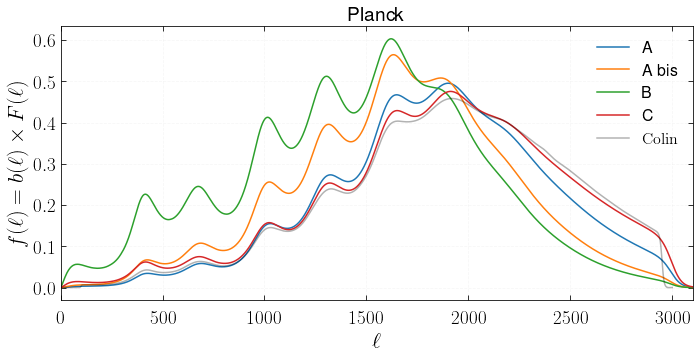

In [29]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


x,y = np.loadtxt(path_to_kSZ2X_2022+'planck_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label='A')
x,y = np.loadtxt(path_to_kSZ2X_2022+'planck_fl_Abis_040522.txt',unpack=True)
ax.plot(x,y,label='A bis')
x,y = np.loadtxt(path_to_kSZ2X_2022+'planck_fl_B_170422.txt',unpack=True)
ax.plot(x,y,label='B')
x,y = np.loadtxt(path_to_kSZ2X_2022+'planck_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C')

l_planck, F_planck = np.loadtxt(path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',unpack=True)
plt.plot(l_planck,F_planck,label=r'$\mathrm{Colin}$',ls='-',c='k',alpha=0.3)

plt.legend(frameon=False)
ax.set_ylabel(r'$f(\ell)= b(\ell)\times F(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
plt.xlim(0,3100)
plt.title('Planck')

## AdvACT filter "b*F" define and save

In [43]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.4*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))

np.savetxt(path_to_kSZ2X_2022+'advact_10uK_1p4arcmin_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

In [45]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_advact_10uK_1p5arcmin_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.5*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))

np.savetxt(path_to_kSZ2X_2022+'advact_10uK_1p5arcmin_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

In [18]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.5*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))

np.savetxt(path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A])
np.savetxt(path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_B_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_B])
np.savetxt(path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

## AdvACT filter "b*F" plot

Text(0.5, 1.0, 'advACT')

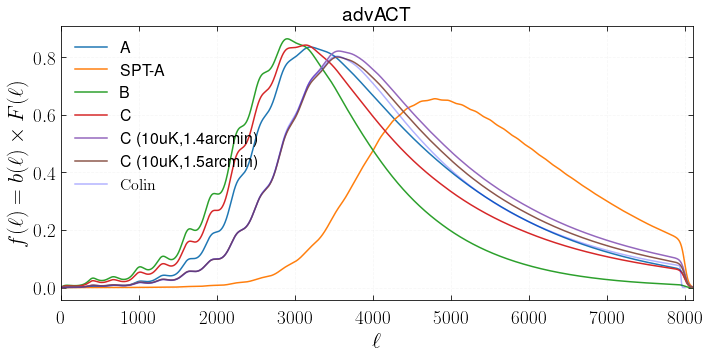

In [10]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label='A')

x,y = np.loadtxt(path_to_kSZ2X_2022+'spt_2p3uK_1p5arcmin_fl_A_070722.txt',unpack=True)
ax.plot(x,y,label='SPT-A')

x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_B_170422.txt',unpack=True)
ax.plot(x,y,label='B')
x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C')

x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_10uK_1p4arcmin_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C (10uK,1.4arcmin)')

x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_10uK_1p5arcmin_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C (10uK,1.5arcmin)')


l_planck, F_planck = np.loadtxt(path_to_kSZ2X_2022+'external_data/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
plt.plot(l_planck,F_planck,label=r'$\mathrm{Colin}$',ls='-',c='b',alpha=0.3)

plt.legend(frameon=False)
ax.set_ylabel(r'$f(\ell)= b(\ell)\times F(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
plt.xlim(0,8100)
plt.title('advACT')

## SPT-3G filter "b*F" define and save

In [9]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_spt_2p3uK_1p5arcmin_uK2_070722.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.5*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
# Fl_B = cl_ksz_b2/cl_tot_b2
# Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
# Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
# Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))

np.savetxt(path_to_kSZ2X_2022+'spt_2p3uK_1p5arcmin_fl_A_070722.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A])

## SO filter "b*F" define and save

In [258]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.4*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))

np.savetxt(path_to_kSZ2X_2022+'so_fl_A_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A])
np.savetxt(path_to_kSZ2X_2022+'so_fl_B_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_B])
np.savetxt(path_to_kSZ2X_2022+'so_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

## SO filter "b*F" plot

Text(0.5, 1.0, 'SO')

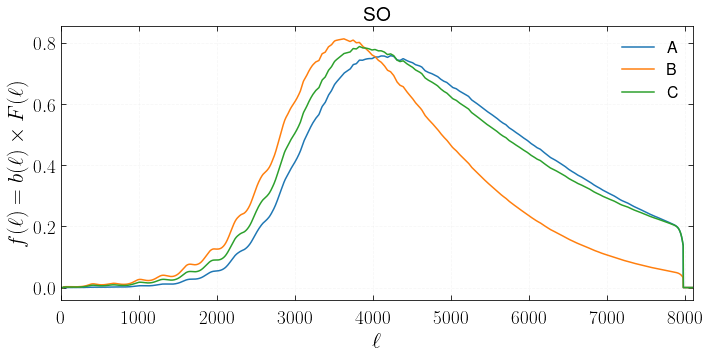

In [259]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label='A')
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_B_170422.txt',unpack=True)
ax.plot(x,y,label='B')
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C')



plt.legend(frameon=False)
ax.set_ylabel(r'$f(\ell)= b(\ell)\times F(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
plt.xlim(0,8100)
plt.title('SO')

### SO filter no small scales (l<400)

In [260]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.4*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_A_no_small_scales = Fl_A*0.5*(1.-np.tanh((l_filter-400.)/50.))


np.savetxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax400.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A_no_small_scales])


(0.0, 600.0)

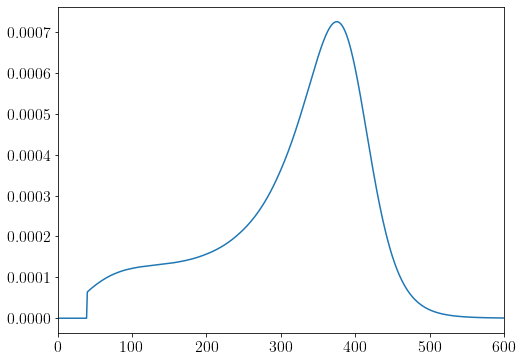

In [261]:
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax400.txt',unpack=True)
plt.plot(x,y,label='A no small scales')
plt.xlim(0,600)

### SO filter no small scales (l<200)

In [262]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.4*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_A_no_small_scales = Fl_A*0.5*(1.-np.tanh((l_filter-200.)/50.))


np.savetxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax200.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A_no_small_scales])


(0.0, 600.0)

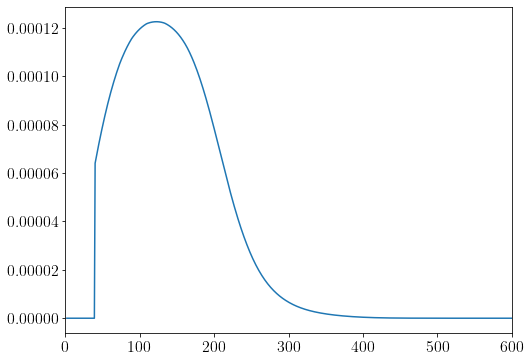

In [263]:
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax200.txt',unpack=True)
plt.plot(x,y,label='A no small scales')
plt.xlim(0,600)

### SO filter no small scales (l<800)

In [264]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.4*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_A_no_small_scales = Fl_A*0.5*(1.-np.tanh((l_filter-800.)/50.))


np.savetxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax800.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A_no_small_scales])


(0.0, 1000.0)

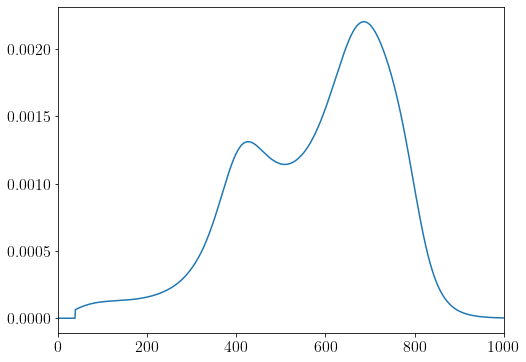

In [266]:
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax800.txt',unpack=True)
plt.plot(x,y,label='A no small scales')
plt.xlim(0,1000)

### SO filter no small scales (l<4000)

In [271]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.4*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_A_no_small_scales = Fl_A*0.5*(1.-np.tanh((l_filter-4000.)/50.))


np.savetxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax4000.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A_no_small_scales])


(0.0, 6000.0)

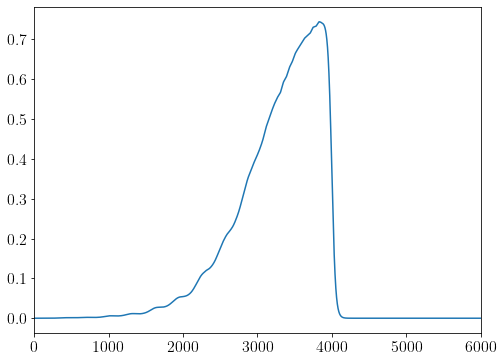

In [272]:
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax4000.txt',unpack=True)
plt.plot(x,y,label='A no small scales')
plt.xlim(0,6000)

### SO filter no small scales (l<1600)

In [269]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.4*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_A_no_small_scales = Fl_A*0.5*(1.-np.tanh((l_filter-1600.)/50.))


np.savetxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax1600.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A_no_small_scales])


(0.0, 2000.0)

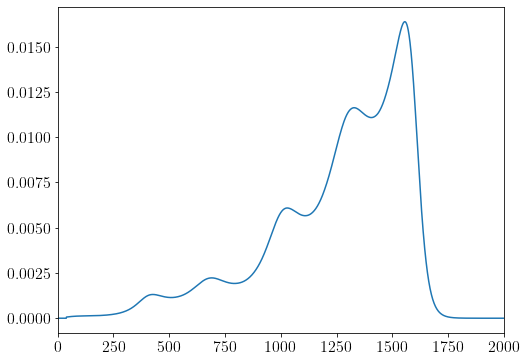

In [270]:
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax1600.txt',unpack=True)
plt.plot(x,y,label='A no small scales')
plt.xlim(0,2000)

### summary plot with filter l<lmax

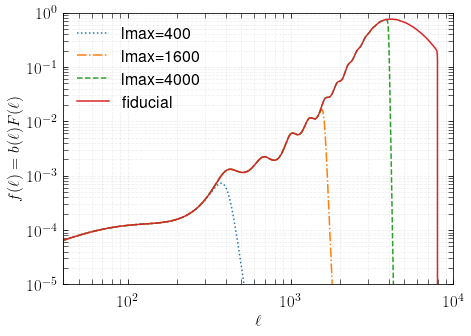

In [174]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax400.txt',unpack=True)
plt.plot(x,y,label='lmax=400',ls=':')
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax1600.txt',unpack=True)
plt.plot(x,y,label='lmax=1600',ls='-.')
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax4000.txt',unpack=True)
plt.plot(x,y,label='lmax=4000',ls='--')
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_170422.txt',unpack=True)
plt.plot(x,y,label='fiducial')
plt.xlim(40,10000)
plt.ylim(1e-5,1.)
plt.legend(frameon=False)
plt.loglog()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$f(\ell)=b(\ell)F(\ell)$')
plt.savefig(path_to_kSZ2X_2022+'filters_lmax.pdf')

## S4 filter "b*F" define and save

In [50]:
l_tt,dl_tt = np.loadtxt(path_to_kSZ2X_2022+'dl_TT_lensed_dimensionless_170422.txt',unpack=True)
tt_interp =  scipy.interpolate.interp1d(l_tt,dl_tt,bounds_error=False,fill_value=1e100)


l_ksz,dl_ksz = np.loadtxt(path_to_kSZ2X_2022+'dl_ksz_hm_agn_1p2h_uK2_170422.txt',unpack=True)
dl_ksz = dl_ksz*(T_cmb*1e6)**-2.
ksz_interp = scipy.interpolate.interp1d(l_ksz,dl_ksz,bounds_error=False,fill_value=0.)                                        

l_nl,dl_nl = np.loadtxt(path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',unpack=True)
dl_nl = l_nl*(l_nl+1.)/2./np.pi*dl_nl*(T_cmb*1e6)**-2.
nl_interp = scipy.interpolate.interp1d(l_nl,dl_nl,bounds_error=False,fill_value=1e100)


l_filter = np.arange(2,10000)
ThetaFWHM = 1.4*arcmin_to_radians
bl2 = np.exp(-ThetaFWHM**2.*l_filter*(l_filter+1.)/8./np.log(2.))

dl_ksz = ksz_interp(l_filter)*bl2
dl_tot = ksz_interp(l_filter)*bl2+nl_interp(l_filter)*bl2+tt_interp(l_filter)*bl2

l_fac = l_filter*(l_filter+1.)/2./np.pi

cl_ksz_b2 = dl_ksz/l_fac
cl_tot_b2 = dl_tot/l_fac

Fl_A = np.sqrt(cl_ksz_b2)/cl_tot_b2
Fl_B = cl_ksz_b2/cl_tot_b2
Fl_C = Fl_B/bl2


Fl_A = Fl_A/np.max(Fl_A)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_B = Fl_B/np.max(Fl_B)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))
Fl_C = Fl_C/np.max(Fl_C)*0.5*(1.-np.tanh((l_filter-l_max_advact_s4_so)/50.))

np.savetxt(path_to_kSZ2X_2022+'s4_fl_A_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_A])
np.savetxt(path_to_kSZ2X_2022+'s4_fl_B_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_B])
np.savetxt(path_to_kSZ2X_2022+'s4_fl_C_170422.txt',np.c_[l_filter,np.sqrt(bl2)*Fl_C])

## S4 filter save

Text(0.5, 1.0, 'S4')

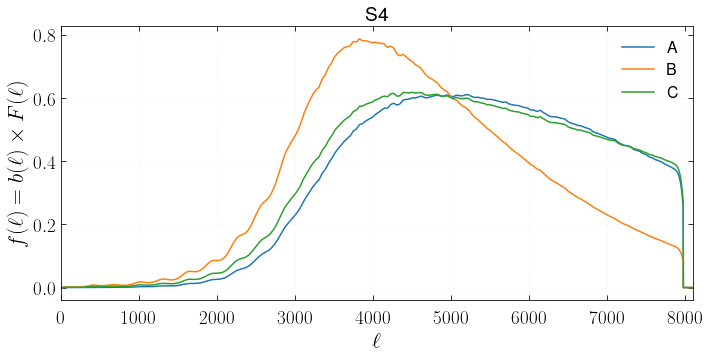

In [51]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label='A')
x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_B_170422.txt',unpack=True)
ax.plot(x,y,label='B')
x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_C_170422.txt',unpack=True)
ax.plot(x,y,label='C')



plt.legend(frameon=False)
ax.set_ylabel(r'$f(\ell)= b(\ell)\times F(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
plt.xlim(0,8100)
plt.title('S4')

## Summary filter figure

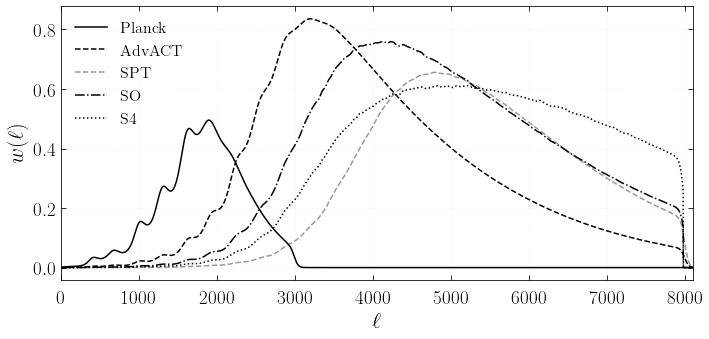

In [19]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')



x,y = np.loadtxt(path_to_kSZ2X_2022+'planck_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label=r'$\mathrm{Planck}$',c='k')

x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label=r'$\mathrm{AdvACT}$',ls='--',c='k')

x,y = np.loadtxt(path_to_kSZ2X_2022+'spt_2p3uK_1p5arcmin_fl_A_070722.txt',unpack=True)
ax.plot(x,y,label=r'$\mathrm{SPT}$',ls='--',c='k',alpha=0.4)


x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label=r'$\mathrm{SO}$',ls='-.',c='k')


x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label=r'$\mathrm{S4}$',ls=':',c='k')


# x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_B_170422.txt',unpack=True)
# ax.plot(x,y,label='B')
# x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_C_170422.txt',unpack=True)
# ax.plot(x,y,label='C')



plt.legend(frameon=False)
ax.set_ylabel(r'$w(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
plt.xlim(0,8100)
# plt.title('S4')
plt.savefig(path_to_kSZ2X_2022+"filtersA_figure.pdf")

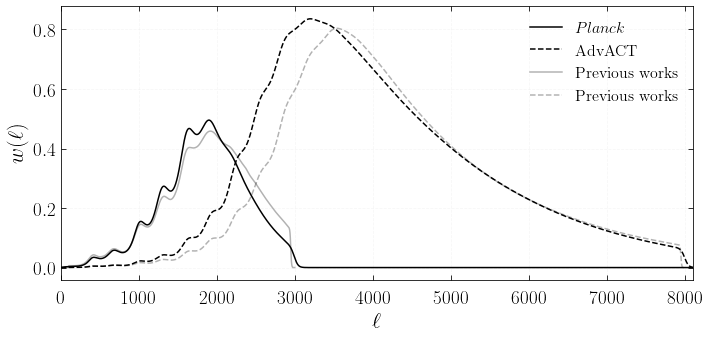

In [83]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')



x,y = np.loadtxt(path_to_kSZ2X_2022+'planck_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label=r'$Planck$',c='k')

x,y = np.loadtxt(path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label=r'$\mathrm{AdvACT}$',ls='--',c='k')


# x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_170422.txt',unpack=True)
# ax.plot(x,y,label=r'$\mathrm{SO}$',ls='-.',c='k')


# x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_A_170422.txt',unpack=True)
# ax.plot(x,y,label=r'$\mathrm{S4}$',ls=':',c='k')


# x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_B_170422.txt',unpack=True)
# ax.plot(x,y,label='B')
# x,y = np.loadtxt(path_to_kSZ2X_2022+'s4_fl_C_170422.txt',unpack=True)
# ax.plot(x,y,label='C')

l_planck, F_planck = np.loadtxt(path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',unpack=True)
plt.plot(l_planck,F_planck,label=r'$\mathrm{Previous\,\,works}$',ls='-',c='k',alpha=0.3)

l_planck, F_planck = np.loadtxt(path_to_kSZ2X_2022+'external_data/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
plt.plot(l_planck,F_planck,label=r'$\mathrm{Previous\,\,works}$',ls='--',c='k',alpha=0.3)

plt.legend(frameon=False)
ax.set_ylabel(r'$w(\ell)$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
plt.xlim(0,8100)
# plt.title('S4')
plt.savefig(path_to_kSZ2X_2022+"filters_comp_figure.pdf")

# SNR tot calculations

## Planck x WISE

### Same settings as Ferraro+16

In [11]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.7, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 82.5817 seconds


#### save data

In [12]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

# np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_linvel_fsky0p7_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
#            np.c_[l,cl_tot,covll])
# np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_linvel_fsky0p7_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_180522.txt',
#            np.c_[l,cl_tot,covll])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_nonlinvel_fsky0p7_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_180522.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [67]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_linvel_fsky0p7_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

2.3885952014753267
4.777190402950653


#### comparison plot with Ferraro16

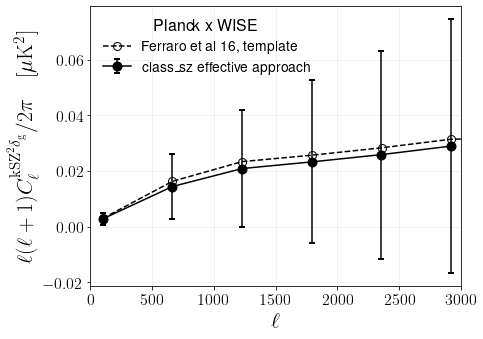

In [14]:
F = np.loadtxt(path_to_kSZ2X_2022+'external_data/ksz2g_wise_ferraroetal16templates.txt')
ls = F[0,:]
cls_planck = F[1,:]
cls_advact = F[2,:]
cls_s4 = F[3,:]




l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_linvel_fsky0p7_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi


l,cl_tot_new,covll_new = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_nonlinvel_fsky0p7_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_180522.txt',unpack=True)
fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi




label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5),sharey=True)

ax=ax1



ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            marker='o',
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label='class\_sz effective approach',
            c='k')

# ax.errorbar(l,fac_l*cl_tot_new,yerr=fac_l*np.sqrt(covll_new),
#             marker='o',
#             markersize=8,
#             markeredgewidth=2,
#             capsize=3,
#             label='class\_sz effective approach new',
#             c='r')

ax.plot(ls,
        cls_planck,
        label='Ferraro et al 16, template',
        ls='--',
        c='k',
        markerfacecolor='None',
        markersize=8,
        marker='o')

ax.legend(title='Planck x WISE',
          loc=2,
          frameon=False,
          fontsize=14)
ax.set_xlim(0.,3000)

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^{\mathrm{kSZ}^2\delta_\mathrm{g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)
fig.tight_layout()
# plt.savefig(path_to_kSZ2X_2022+'comparison_F16_Planck_WISE.pdf')



### Same settings as Ferraro+16 but fsky=0.6

In [69]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 79.8023 seconds


#### save data

In [70]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_linvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [71]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_linvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

2.211409447746125
4.42281889549225


### Same settings as Ferraro+16 but fsky=0.6 and nonlin veldisp

In [72]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 79.5088 seconds


#### save data

In [73]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [74]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_f16filter_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

3.092640901562946
6.185281803125892


### fsky=0.6, nonlin veldisp, filter C

In [75]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_C_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 79.1110 seconds


#### save data

In [76]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterC_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [77]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterC_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

3.109908195686076
6.219816391372152


### fsky=0.6, nonlin veldisp, filter A

In [78]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 79.5482 seconds


#### save data

In [79]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterA_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [80]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterA_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

3.1863836188474037
6.3727672376948075


### fsky=0.6, nonlin veldisp, filter A bis

In [7]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_Abis_040522.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 85.7881 seconds


#### save data

In [8]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterAbis_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [9]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterAbis_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

2.8444004529527116
5.688800905905423


### fsky=0.6, nonlin veldisp, filter B

In [81]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_B_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 82.4768 seconds


#### save data

In [82]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterB_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [83]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_wise_filterB_nonlinvel_fsky0p6_bg1p13_sn1p25e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.8672684367365875
3.734536873473175


## Planck x unWISE blue

In [201]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 1.56,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 70.9727 seconds


### save data

In [202]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p56_sn8p94e-8_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [203]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p56_sn8p94e-8_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

2.1052236306760017
4.210447261352003


## Planck x unWISE green

In [84]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 2.23,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 66.3915 seconds


### save data

In [85]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p23_sn1p65e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [88]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p23_sn1p65e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

0.9632218697770051
1.9264437395540102


## AdvACT x WISE

### Same settings as Ferraro+16

In [90]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 142.0981 seconds


#### save data

In [91]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_linvel_fsky0p5_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [132]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_linvel_fsky0p5_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

111.83367200679265
223.6673440135853


#### comparison plot with Ferraro16

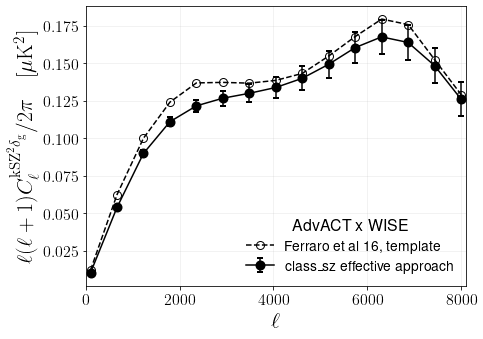

In [178]:
F = np.loadtxt(path_to_kSZ2X_2022+'external_data/ksz2g_wise_ferraroetal16templates.txt')
ls = F[0,:]
cls_planck = F[1,:]
cls_advact = F[2,:]
cls_s4 = F[3,:]




l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_linvel_fsky0p5_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi



label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5),sharey=True)

ax=ax1



ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            marker='o',
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label='class\_sz effective approach',
            c='k')
ax.plot(ls,
        cls_advact,
        label='Ferraro et al 16, template',
        ls='--',
        c='k',
        markerfacecolor='None',
        markersize=8,
        marker='o')

ax.legend(title='AdvACT x WISE',
          loc=4,
          frameon=False,
          fontsize=14)
ax.set_xlim(0.,8100)

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^{\mathrm{kSZ}^2\delta_\mathrm{g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'comparison_F_16_advact_WISE.pdf')



### Same settings as Ferraro+16 but fsky=0.3

In [96]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 142.5294 seconds


#### save data

In [97]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_linvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [133]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_linvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

86.6259898455061
173.2519796910122


### Same settings as Ferraro+16 but fsky=0.3 and nonlin veldisp

In [99]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 143.3126 seconds


#### save data

In [100]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [135]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_f16filter_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

119.0960677417261
238.1921354834522


### fsky=0.3, nonlin veldisp, 10uK noise level, filter C (10uK, 1p5arcmin)

In [102]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_10uK_1p5arcmin_fl_C_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 142.9698 seconds


#### save data

In [103]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p5am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [136]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p5am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

120.75400039750195
241.5080007950039


### fsky=0.3, nonlin veldisp, 10uK noise level, filter C (10uK, 1p4arcmin)

In [108]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_10uK_1p4arcmin_fl_C_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_10uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 143.7350 seconds


#### save data

In [109]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [137]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl10uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

122.06581296082565
244.1316259216513


### fsky=0.3, nonlin veldisp, 20uK noise level, filter C (10uK, 1p4arcmin)

In [111]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_10uK_1p4arcmin_fl_C_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 144.0618 seconds


#### save data

In [112]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [138]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC10uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

41.61950232069389
83.23900464138778


### fsky=0.3, nonlin veldisp, 20uK noise level, filter C (20uK, 1p4arcmin)

In [114]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_C_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 144.5238 seconds


#### save data

In [115]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [139]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterC20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

42.20146794163761
84.40293588327522


### fsky=0.3, nonlin veldisp, 20uK noise level, filter B (20uK, 1p4arcmin)

In [117]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_B_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 146.6789 seconds


#### save data

In [118]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterB20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [140]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterB20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

35.66847203446597
71.33694406893194


### fsky=0.3, nonlin veldisp, 20uK noise level, filter A (20uK, 1p4arcmin)

In [120]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':path_to_kSZ2X_2022+'external_data/wise_normalized.txt',

        
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.13,

#galaxy density:  50 million galaxies over half of the sky <br>
#means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 145.1651 seconds


#### save data

In [121]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterA20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

#### compute SNR

In [141]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_wise_filterA20uk1p4am_nonlinvel_fsky0p3_bg1p13_sn1p25e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

44.26519851355892
88.53039702711784


## AdvACT x unWISE blue

In [19]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 1.56,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 113.5617 seconds


### save data

In [20]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p56_sn8p93e-8_nl20uK_b1p5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [21]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p56_sn8p93e-8_nl20uK_b1p5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

34.606842813163105
69.21368562632621


## AdvACT x unWISE green

In [211]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 2.23,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 96.1974 seconds


### save data

In [212]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_uwise_green_filterA_nonlinvel_fsky0p3_bg2p23_sn1p65e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [213]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_advact_x_uwise_green_filterA_nonlinvel_fsky0p3_bg2p23_sn1p65e-7_nl20uK_b1p4arcmin_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

16.048825149066715
32.09765029813343


## SO x unWISE blue

In [214]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 1.56,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 106.6284 seconds


### save data

In [215]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p56_sn8p93e-8_nlilc_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [216]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p56_sn8p93e-8_nlilc_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

150.81325070145743
301.62650140291487


## SO x unWISE green

In [217]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 2.23,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 93.2619 seconds


### save data

In [218]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_so_x_uwise_green_filterA_nonlinvel_fsky0p4_bg2p23_sn1p65e-7_nlilc_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [219]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_so_x_uwise_green_filterA_nonlinvel_fsky0p4_bg2p23_sn1p65e-7_nlilc_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

68.42632887074167
136.85265774148334


## S4 x unWISE blue

In [220]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 1.56,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 105.6371 seconds


### save data

In [221]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p56_sn8p93e-8_nlilc_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [222]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p56_sn8p93e-8_nlilc_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

282.80909894687136
565.6181978937427


## S4 x unWISE green

In [223]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        

'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 2.23,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 102.1702 seconds


### save data

In [224]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_s4_x_uwise_green_filterA_nonlinvel_fsky0p4_bg2p23_sn1p65e-7_nlilc_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

### compute SNR

In [225]:
l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_s4_x_uwise_green_filterA_nonlinvel_fsky0p4_bg2p23_sn1p65e-7_nlilc_hf_l_cl_covll_170422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

133.1283884051271
266.2567768102542


# SNR on bg and Aksz

## AdvACT x unWISE green (effective approach)

In [226]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_lens_hf,gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 92.8058 seconds


### save data

In [227]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_green_filterA_nonlinvel_fsky0p3_bg2p23_sn1p65e-7_nl20uK_b1p4am_hf_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [228]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_green_filterA_nonlinvel_fsky0p3_bg2p23_sn1p65e-7_nl20uK_b1p4am_hf_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

16.048825149066715
32.09765029813343


### plot to check data

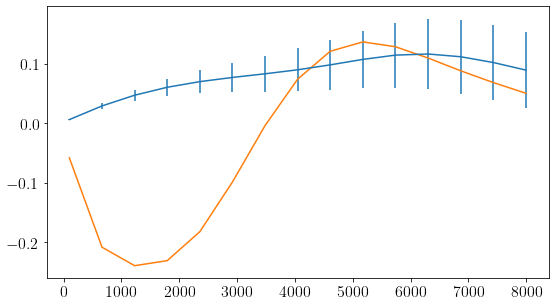

In [229]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [230]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [231]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [232]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.10262642 0.01672675]


In [233]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 19.48815824335854
the snr on bg 59.784476741288266


### Fisher matrix forecast with prior on bg

In [234]:
prior_list = [
              np.inf, # A_ksz
              0.01578, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [235]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.0837487  0.01147826]
2snr, ie, the snr on ffree 23.88096703825981
the snr on bg 87.12125136350078


## AdvACT x unWISE blue (effective approach)

In [236]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_lens_hf,gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.56, # green: 2.23 | blue: 1.56
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 102.4644 seconds


### save data

In [237]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p56_sn8p93e-8_nl20uK_b1p4am_hf_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [238]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p56_sn8p93e-8_nl20uK_b1p4am_hf_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

36.851068362800454
73.70213672560091


### plot to check data

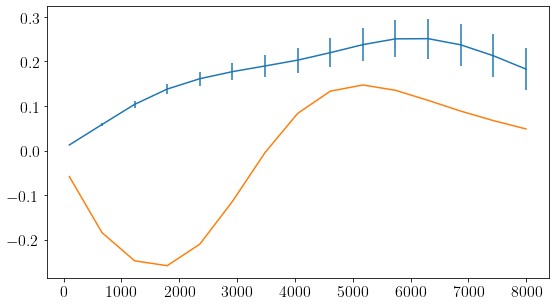

In [239]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [240]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [241]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [242]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.03176392 0.01477208]


In [243]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 62.96453011141331
the snr on bg 67.69528937926786


### Fisher matrix forecast with prior on bg

In [244]:
prior_list = [
              np.inf, # A_ksz
              0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [245]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.02994938 0.01133863]
2snr, ie, the snr on ffree 66.77934060574334
the snr on bg 88.19406308466341


## Planck x unWISE green (NFW)

In [2]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 26.3217 seconds


### checking effective bias

In [3]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999987642741822
1.9981084085603753


### save data

In [256]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [374]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.604227829177931
3.208455658355862


### plot to check data

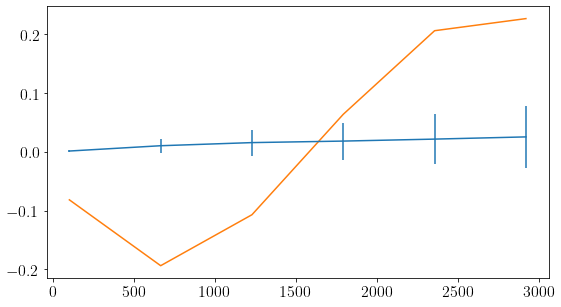

In [258]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [259]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [260]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [261]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.73959881 0.02490373]


In [262]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 2.704168760576333
the snr on bg 40.1546200892124


### Fisher matrix forecast with prior on bg

In [263]:
prior_list = [
              np.inf, # A_ksz
              0.01578, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [264]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.6587547 0.0133294]
2snr, ie, the snr on ffree 3.0360314511972986
the snr on bg 75.02214536003102


## Planck x unWISE blue (NFW)

In [4]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 26.6698 seconds


### checking effective bias

In [5]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [267]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [375]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

2.884706480371073
5.769412960742146


### plot to check data

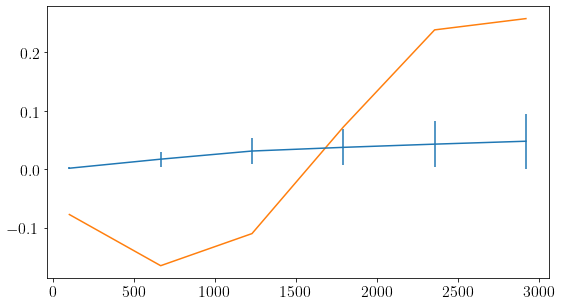

In [269]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [270]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [271]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [272]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.36262559 0.02675365]


In [273]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 5.515330576078184
the snr on bg 37.378076079810214


### Fisher matrix forecast with prior on bg

In [274]:
prior_list = [
              np.inf, # A_ksz
             0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [275]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.35159065 0.01475597]
2snr, ie, the snr on ffree 5.688433476028194
the snr on bg 67.76917537248666


## Planck x unWISE green (NFW)

In [250]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 28.1022 seconds


### checking effective bias

In [251]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999987642741822
1.9981084085603753


### save data

In [256]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [376]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl47uK_b5am_hmNFW_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.604227829177931
3.208455658355862


### plot to check data

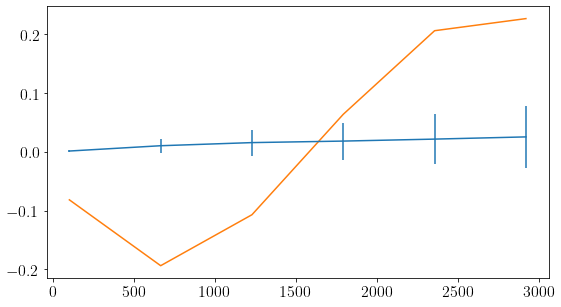

In [258]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [259]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [260]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [261]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.73959881 0.02490373]


In [262]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 2.704168760576333
the snr on bg 40.1546200892124


### Fisher matrix forecast with prior on bg

In [263]:
prior_list = [
              np.inf, # A_ksz
              0.01578, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [264]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.6587547 0.0133294]
2snr, ie, the snr on ffree 3.0360314511972986
the snr on bg 75.02214536003102


## Planck x unWISE blue (AGN)

In [276]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 26.2394 seconds


### checking effective bias

In [277]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [278]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [373]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.7401087266984292
3.4802174533968584


### plot to check data

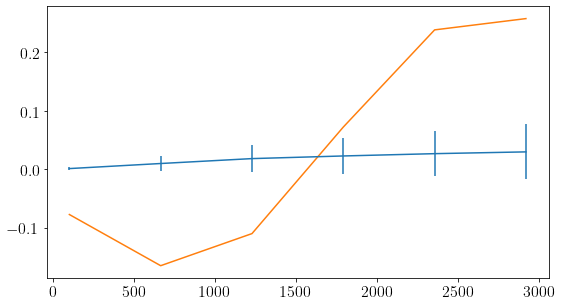

In [280]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

In [98]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',


        
'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 1.4566,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 66.1731 seconds


### save data

In [99]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_nofdndz_sn1p65e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',
           np.c_[l,cl_tot,covll])

1.0010216762827475
2.002043352565495
0.9632218697770051
1.9264437395540102
0.9195644985586096
1.839128997117219


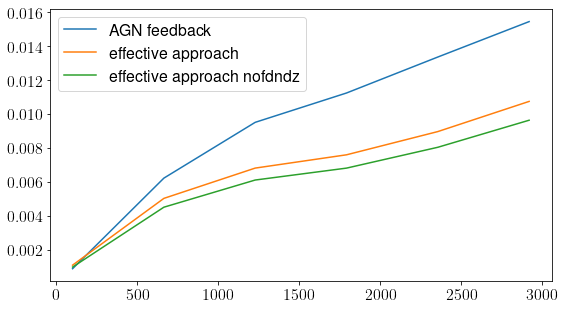

In [103]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl20uK_b1p4am_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)
fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
# ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_tot,label='AGN feedback')


l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p23_sn1p65e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
# ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)
ax.plot(l,fac_l*cl_tot,label='effective approach')

l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_nofdndz_sn1p65e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
# ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

ax.plot(l,fac_l*cl_tot,label='effective approach nofdndz')

plt.legend()
# ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [281]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [282]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [283]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.60967307 0.02690777]


In [284]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 3.2804466825232175
the snr on bg 37.163983374770254


### Fisher matrix forecast with prior on bg

In [285]:
prior_list = [
              np.inf, # A_ksz
             0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [287]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.5854584  0.01478168]
2snr, ie, the snr on ffree 3.4161265802583967
the snr on bg 67.65132829086929


## Planck x unWISE green (AGN)

In [90]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

# 'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 30.3868 seconds


### checking effective bias

In [91]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999987642741822
1.9981084085603753


### save data

In [92]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl20uK_b1p4am_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [93]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p00_sn1p65e-7_nl20uK_b1p4am_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.0010216762827475
2.002043352565495


### plot to check data

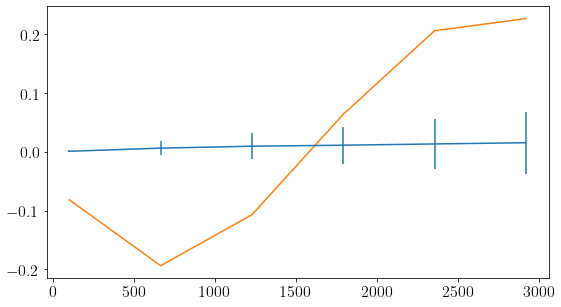

In [94]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [293]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [294]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [295]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[1.22639304 0.02560923]


In [296]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 1.6307985585943254
the snr on bg 39.04842586379427


### Fisher matrix forecast with prior on bg

In [297]:
prior_list = [
              np.inf, # A_ksz
              0.01578, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [298]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[1.06641028 0.01343437]
2snr, ie, the snr on ffree 1.8754507870461488
the snr on bg 74.4359344829692


## AdvACT x unWISE blue (AGN)

In [22]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

# 'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 36.6050 seconds


### checking effective bias

In [23]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [24]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p5am_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [25]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p5am_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

17.83152328606848
35.66304657213696


### plot to check data

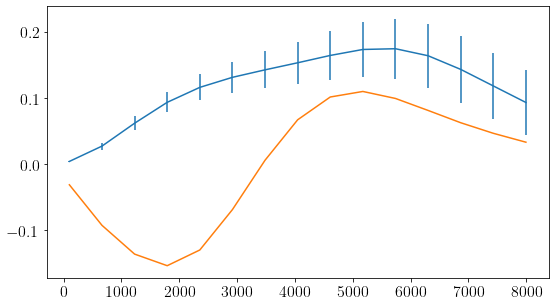

In [26]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [310]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [311]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [312]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.05393554 0.02516852]


In [313]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 37.081301752263116
the snr on bg 39.73216934313657


### Fisher matrix forecast with prior on bg

In [316]:
prior_list = [
              np.inf, # A_ksz
              0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [317]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.05368692 0.01447273]
2snr, ie, the snr on ffree 37.2530187484233
the snr on bg 69.0954834989267


## AdvACT x unWISE blue (NFW)

In [318]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p4arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p4arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

# 'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 38.6260 seconds


### checking effective bias

In [319]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [320]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p4am_hmNFW_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [321]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p4am_hmNFW_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

45.47059948954509
90.94119897909017


### plot to check data

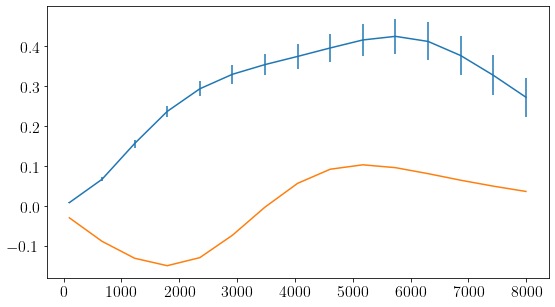

In [322]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [323]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [324]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [325]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.02533058 0.02489564]


In [326]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 78.95593926617614
the snr on bg 40.167671268492064


### Fisher matrix forecast with prior on bg

In [327]:
prior_list = [
              np.inf, # A_ksz
              0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [328]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.02316596 0.01442027]
2snr, ie, the snr on ffree 86.33357983654561
the snr on bg 69.34682670730085


## S4 x unWISE blue (AGN)

In [350]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',
        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# 'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16',
'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 40.9678 seconds


### checking effective bias

In [351]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [353]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [354]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

102.91370514767485
205.8274102953497


### plot to check data

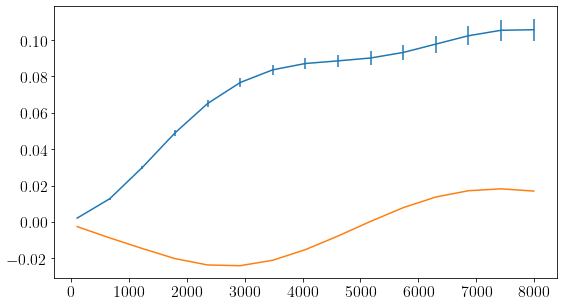

In [355]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [356]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [357]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [358]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.02116068 0.02714416]


In [360]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 94.51492689211192
the snr on bg 36.84033965793624


### Fisher matrix forecast with prior on bg

In [361]:
prior_list = [
              np.inf, # A_ksz
              0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [362]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.01413351 0.01482051]
2snr, ie, the snr on ffree 141.50767109966844
the snr on bg 67.47407787699571


## SO x unWISE blue (AGN)

In [329]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',
        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

# 'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16',
'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 37.6008 seconds


### checking effective bias

In [330]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [331]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [363]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'snr_bg_aksz_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

61.872941328370324
123.74588265674065


### plot to check data

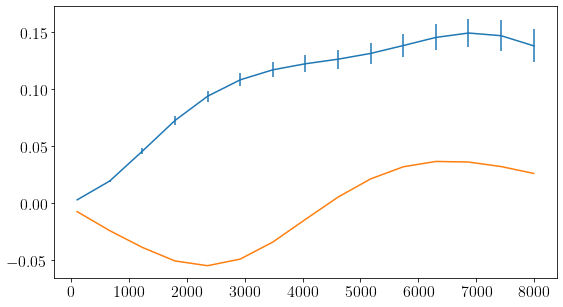

In [364]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*cl_lensing)

### Fisher matrix forecasts

In [365]:
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)



In [366]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-5
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_tot,cl_lensing]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_tot + param_fiducial_values[1]*cl_lensing

for i in range(len(param_list)):
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot + delta_p_over_p*param_fiducial_values[i]*cl_lensing 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_tot - delta_p_over_p*param_fiducial_values[i]*cl_lensing 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_l*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_l*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)


In [367]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)

[0.01996138 0.02365312]


In [368]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

2snr, ie, the snr on ffree 100.1934962940638
the snr on bg 42.27772571179954


### Fisher matrix forecast with prior on bg

In [369]:
prior_list = [
              np.inf, # A_ksz
              0.01769, # bg green: 0.0352/2.23 = 0.01578 | bg blue: 0.0276/1.56 = 0.01769
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)


In [370]:
M_parameters = len(param_list)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    #print(snr)
    if i==0:
        print('2snr, ie, the snr on ffree',2.*snr)
    if i==1:
        print('the snr on bg',snr)

[0.01761943 0.01416631]
2snr, ie, the snr on ffree 113.5110511686231
the snr on bg 70.58998973367915


# Constraints on gas density profile parameters

In [378]:
M.get_f_b()

0.15745030410017352

## Planck x unWISE blue AGN

In [379]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas', # f_b_gas:## this is interpreted as fb*ffree
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [np.inf,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas, value from M.get_f_b()
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [381]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 25.9939 seconds


### checking effective bias

In [382]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [383]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [410]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_planck_x_uwise_blue_filterA_nonlinvel_fsky0p6_bg1p46_sn8p93e-8_nl47uK_b5am_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
print(snrl)
print(2.*snrl)

1.7401087266984292
3.4802174533968584


### make plot

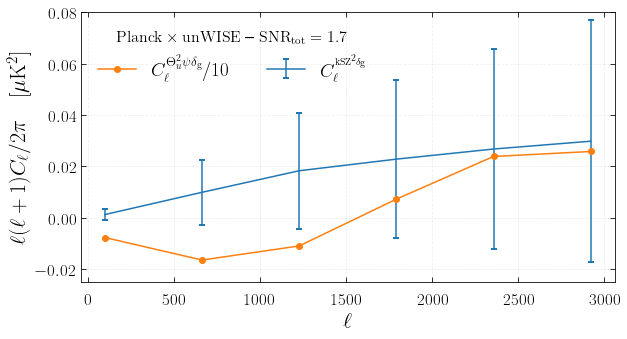

In [388]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/10.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}/10$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{Planck\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=1.7$')
ax.set_ylim(-0.025,0.08)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_planck_unwise.pdf')

### compute derivatives

In [389]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (T_cmb*1e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 51.8792 seconds
computed in 65.4087 seconds
computed in 56.4906 seconds
computed in 73.4137 seconds
computed in 59.4303 seconds
computed in 63.2007 seconds
computed in 68.3337 seconds
computed in 76.4125 seconds


Text(0.5, 1.0, 'derivatives Planck x unWISE blue - AGN')

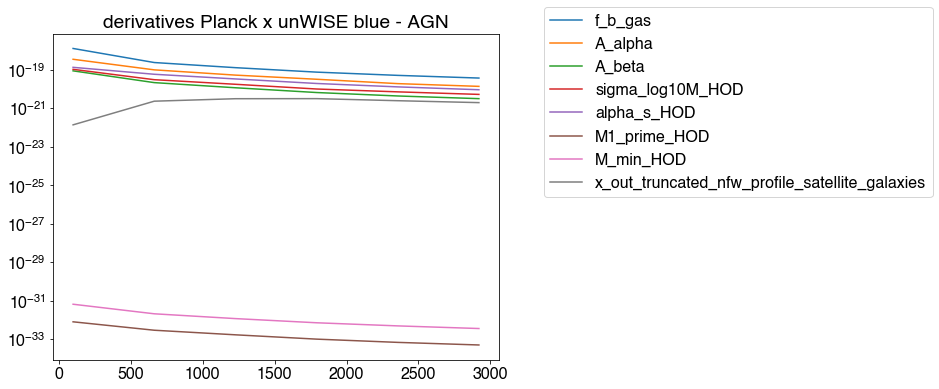

In [393]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives Planck x unWISE blue - AGN')

### save fisher matrix

In [398]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_planck_x_unwise_blue_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_planck_x_unwise_blue_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[ 4.88564776e+02  1.89612475e+02 -4.18808587e+01 -6.31218242e+01
   1.15457156e+02 -5.89226043e-12  4.22358061e-11 -1.43196519e+01]
 [ 1.89612475e+02  7.45826682e+01 -1.63880812e+01 -2.47844148e+01
   4.57302609e+01 -2.32563266e-12  1.66211158e-11 -5.66114786e+00]
 [-4.18808587e+01 -1.63880812e+01  3.61031997e+00  5.45632043e+00
  -1.00340483e+01  5.10898967e-13 -3.65486650e-12  1.24195373e+00]
 [-6.31218242e+01 -2.47844148e+01  5.45632043e+00  2.42970007e+01
  -1.52915136e+01  7.78761675e-13 -5.56415555e-12  1.95715808e+00]
 [ 1.15457156e+02  4.57302609e+01 -1.00340483e+01 -1.52915136e+01
   1.28341828e+02 -1.44004364e-12  1.02697171e-11 -3.62085935e+00]
 [-5.89226043e-12 -2.32563266e-12  5.10898967e-13  7.78761675e-13
  -1.44004364e-12  1.13267223e-25 -5.22888020e-25  1.85895160e-13]
 [ 4.22358061e-11  1.66211158e-11 -3.65486650e-12 -5.56415555e-12
   1.02697171e-11 -5.22888020e-25  4.73461657e-24 -1.32372738e-12]
 [-1.43196519e+01 -5.66114786e+00  1.24195373e+00  1.9571580

### get forecasts

In [403]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_planck_x_unwise_blue_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.18972269657486462 

A_alpha  =  0.2836396639624919 

A_beta  =  0.17507044237141242 

sigma_log10M_HOD  =  2.7631084928639207 

alpha_s_HOD  =  13.007985419884722 

M1_prime_HOD  =  1.012489468870628 

M_min_HOD  =  0.632583276896173 

x_out_truncated_nfw_profile_satellite_galaxies  =  4.379804239018531 



In [404]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_planck_x_unwise_blue_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.001799573156603 

A_alpha  =  0.38463298129563717 

A_beta  =  0.3699823463067355 

sigma_log10M_HOD  =  2.764018039915931 

alpha_s_HOD  =  13.017377564323931 

M1_prime_HOD  =  1.0149898061611622 

M_min_HOD  =  0.6339437469250002 

x_out_truncated_nfw_profile_satellite_galaxies  =  4.379830849173352 



## AdvACT x unWISE blue AGN

In [27]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas', # f_b_gas:## this is interpreted as fb*ffree
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [np.inf,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas, value from M.get_f_b()
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [28]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',




'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 36.4550 seconds


### checking effective bias

In [29]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [30]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p5am_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [31]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_uwise_blue_filterA_nonlinvel_fsky0p3_bg1p46_sn8p93e-8_nl20uK_b1p5am_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

17.83152328606848
35.66304657213696


### make plot

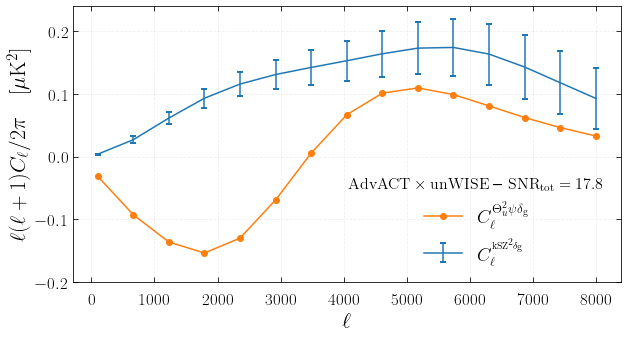

In [33]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=4,
          title=r'$\mathrm{AdvACT\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=17.8$')
ax.set_ylim(-0.2,0.24)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_advact_unwise.pdf')

### compute derivatives

In [34]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (T_cmb*1e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 76.6710 seconds
computed in 95.7179 seconds
computed in 95.8060 seconds
computed in 96.8119 seconds
computed in 89.3783 seconds
computed in 90.5474 seconds
computed in 108.8699 seconds
computed in 97.4108 seconds


Text(0.5, 1.0, 'derivatives AdvACT x unWISE blue - AGN')

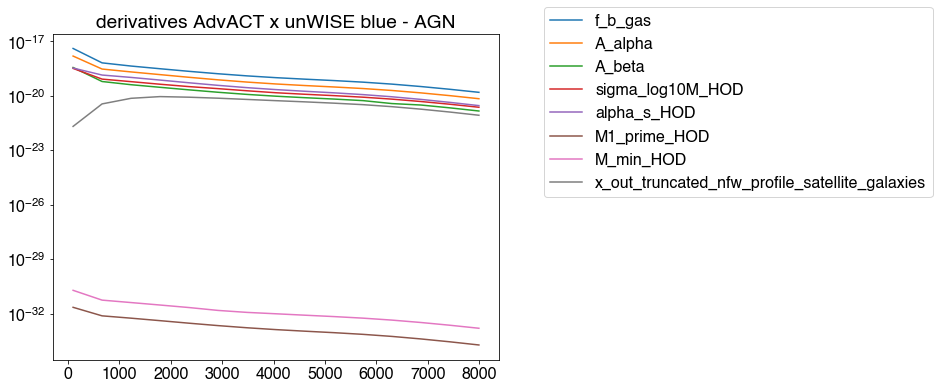

In [35]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives AdvACT x unWISE blue - AGN')

### save fisher matrix

In [36]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_advact_x_unwise_blue_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_advact_x_unwise_blue_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[ 5.13042309e+04  2.32824589e+04 -4.83294689e+03 -7.15869105e+03
   1.09200182e+04 -6.30304711e-10  4.67313134e-09 -1.87836145e+03]
 [ 2.32824589e+04  1.05923342e+04 -2.19460715e+03 -3.26379499e+03
   4.99828778e+03 -2.88031734e-10  2.13221851e-09 -8.56268335e+02]
 [-4.83294689e+03 -2.19460715e+03  4.55563391e+02  6.75542513e+02
  -1.03133029e+03  5.95150633e-11 -4.41017584e-10  1.77786850e+02]
 [-7.15869105e+03 -3.26379499e+03  6.75542513e+02  1.03097663e+03
  -1.55262584e+03  8.96372449e-11 -6.63142628e-10  2.75771260e+02]
 [ 1.09200182e+04  4.99828778e+03 -1.03133029e+03 -1.55262584e+03
   2.49757931e+03 -1.37765752e-10  1.01595796e-09 -4.12979389e+02]
 [-6.30304711e-10 -2.88031734e-10  5.95150633e-11  8.96372449e-11
  -1.37765752e-10  7.97689364e-24 -5.86250464e-23  2.42345486e-11]
 [ 4.67313134e-09  2.13221851e-09 -4.41017584e-10 -6.63142628e-10
   1.01595796e-09 -5.86250464e-23  4.35032263e-22 -1.80007279e-10]
 [-1.87836145e+03 -8.56268335e+02  1.77786850e+02  2.7577126

### get forecasts

In [37]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_advact_x_unwise_blue_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.7092960749682973 

A_alpha  =  2.216853271941506 

A_beta  =  1.7189818416328355 

sigma_log10M_HOD  =  2.9007315590812635 

alpha_s_HOD  =  13.117225635545065 

M1_prime_HOD  =  1.1198199210860085 

M_min_HOD  =  0.9492627488396357 

x_out_truncated_nfw_profile_satellite_galaxies  =  4.9396725843579175 



In [38]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_advact_x_unwise_blue_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.02512348661928 

A_alpha  =  2.538620041200531 

A_beta  =  2.865639851267336 

sigma_log10M_HOD  =  2.901806036691717 

alpha_s_HOD  =  13.48004260056132 

M1_prime_HOD  =  1.2233988769717425 

M_min_HOD  =  0.956927717623824 

x_out_truncated_nfw_profile_satellite_galaxies  =  4.99398804822956 



## SO x unWISE blue AGN

In [430]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas', # f_b_gas:## this is interpreted as fb*ffree
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [np.inf,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas, value from M.get_f_b()
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [431]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 38.0700 seconds


### checking effective bias

In [432]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [433]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [434]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

61.872941328370324
123.74588265674065


### make plot

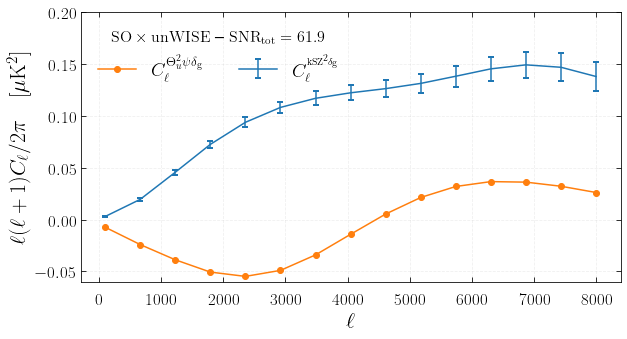

In [441]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{SO\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=61.9$')
ax.set_ylim(-0.06,0.2)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_unwise.pdf')

### compute derivatives

In [442]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (T_cmb*1e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 73.1147 seconds
computed in 102.8216 seconds
computed in 92.0136 seconds
computed in 93.6910 seconds
computed in 100.1525 seconds
computed in 100.9231 seconds
computed in 101.5782 seconds
computed in 104.7828 seconds


Text(0.5, 1.0, 'derivatives SO x unWISE blue - AGN')

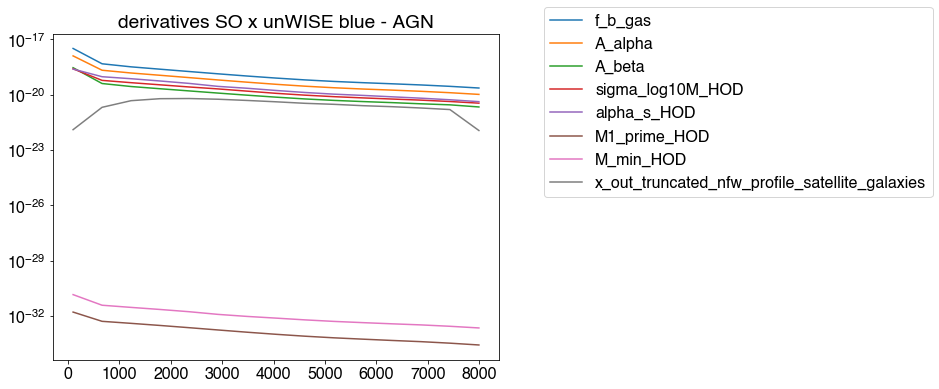

In [443]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives SO x unWISE blue - AGN')

### save fisher matrix

In [444]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_so_x_unwise_blue_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_so_x_unwise_blue_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[ 6.17700445e+05  2.81463183e+05 -5.60028873e+04 -8.70901836e+04
   1.25262972e+05 -7.53371665e-09  5.67193493e-08 -2.16332540e+04]
 [ 2.81463183e+05  1.28447698e+05 -2.55125048e+04 -3.98650182e+04
   5.74795146e+04 -3.45442172e-09  2.59762658e-08 -9.95075941e+03]
 [-5.60028873e+04 -2.55125048e+04  5.08496979e+03  7.90682718e+03
  -1.13379946e+04  6.83150129e-10 -5.14915651e-09  1.99208497e+03]
 [-8.70901836e+04 -3.98650182e+04  7.90682718e+03  1.25056109e+04
  -1.80220659e+04  1.08432930e-09 -8.14601732e-09  3.21129493e+03]
 [ 1.25262972e+05  5.74795146e+04 -1.13379946e+04 -1.80220659e+04
   2.63596224e+04 -1.57215049e-09  1.17735120e-08 -4.55716907e+03]
 [-7.53371665e-09 -3.45442172e-09  6.83150129e-10  1.08432930e-09
  -1.57215049e-09  9.44348031e-23 -7.07786014e-22  2.78267004e-10]
 [ 5.67193493e-08  2.59762658e-08 -5.14915651e-09 -8.14601732e-09
   1.17735120e-08 -7.07786014e-22  5.32094903e-21 -2.09599450e-09]
 [-2.16332540e+04 -9.95075941e+03  1.99208497e+03  3.2112949

### get forecasts

In [445]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_so_x_unwise_blue_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.7729198059107899 

A_alpha  =  2.066911695480858 

A_beta  =  3.7025317570754717 

sigma_log10M_HOD  =  3.0588975943558845 

alpha_s_HOD  =  13.5946941460734 

M1_prime_HOD  =  1.2044870167196078 

M_min_HOD  =  1.533515471380249 

x_out_truncated_nfw_profile_satellite_galaxies  =  7.661922304757906 



In [446]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_so_x_unwise_blue_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.029825772483346 

A_alpha  =  4.975762360408746 

A_beta  =  5.508849920248493 

sigma_log10M_HOD  =  3.2044814826557193 

alpha_s_HOD  =  13.595440010111137 

M1_prime_HOD  =  1.3186084186111335 

M_min_HOD  =  1.6030993697223435 

x_out_truncated_nfw_profile_satellite_galaxies  =  8.038372940590808 



## S4 x unWISE blue AGN

In [447]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas', # f_b_gas:## this is interpreted as fb*ffree
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [np.inf,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,#0.001596, #  f_b_gas ## this is interpreted as fb*ffree with 10% prior on ffree
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]

prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas, value from M.get_f_b()
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [448]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 43.6946 seconds


### checking effective bias

In [449]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.456603062087112


### save data

In [450]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [451]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_uwise_blue_filterA_nonlinvel_fsky0p4_bg1p46_sn8p93e-8_nlilc_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

102.91370514767485
205.8274102953497


### make plot

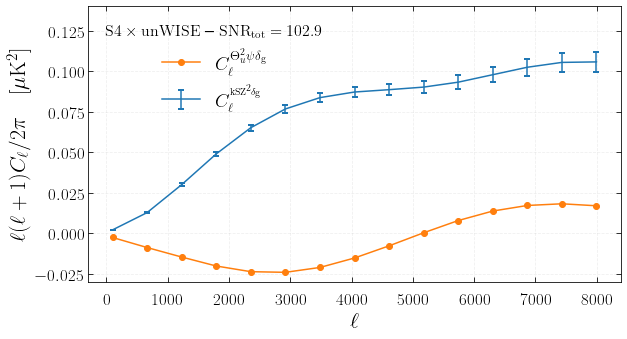

In [455]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{S4\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=102.9$')
ax.set_ylim(-0.03,0.14)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_s4_unwise.pdf')

### compute derivatives

In [456]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (T_cmb*1e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 82.2603 seconds
computed in 110.3515 seconds
computed in 99.1903 seconds
computed in 105.6090 seconds
computed in 107.6433 seconds
computed in 111.8651 seconds
computed in 114.9358 seconds
computed in 114.8640 seconds


Text(0.5, 1.0, 'derivatives S4 x unWISE blue - AGN')

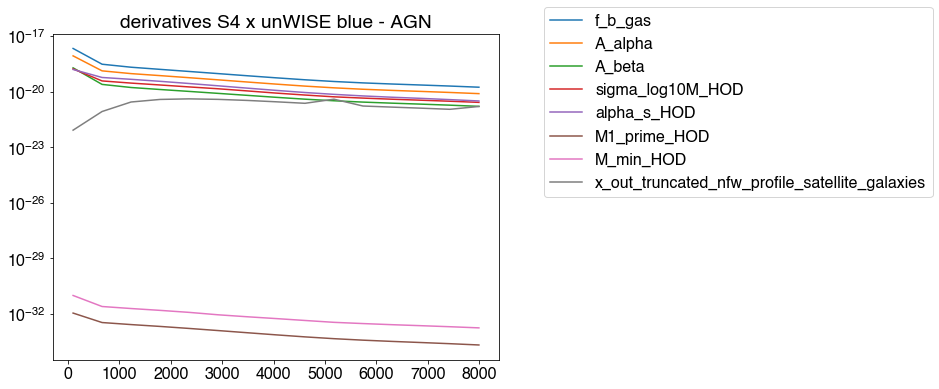

In [457]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives S4 x unWISE blue - AGN')

### save fisher matrix

In [458]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[ 1.70892130e+06  7.70613670e+05 -1.48117000e+05 -2.41912137e+05
   3.41878589e+05 -2.08346410e-08  1.57653990e-07 -6.81258547e+04]
 [ 7.70613670e+05  3.47913824e+05 -6.67714562e+04 -1.09565758e+05
   1.55124031e+05 -9.44908901e-09  7.14393881e-08 -3.10446264e+04]
 [-1.48117000e+05 -6.67714562e+04  1.28682546e+04  2.09764987e+04
  -2.95162482e+04  1.80307891e-09 -1.36678525e-08  6.03148489e+03]
 [-2.41912137e+05 -1.09565758e+05  2.09764987e+04  3.48578479e+04
  -4.94344305e+04  3.01202349e-09 -2.27480889e-08  1.01656344e+04]
 [ 3.41878589e+05  1.55124031e+05 -2.95162482e+04 -4.94344305e+04
   7.08931366e+04 -4.29435058e-09  3.23085578e-08 -1.40510265e+04]
 [-2.08346410e-08 -9.44908901e-09  1.80307891e-09  3.01202349e-09
  -4.29435058e-09  2.61154374e-22 -1.96799088e-21  8.72444578e-10]
 [ 1.57653990e-07  7.14393881e-08 -1.36678525e-08 -2.27480889e-08
   3.23085578e-08 -1.96799088e-21  1.48668029e-20 -6.65417472e-09]
 [-6.81258547e+04 -3.10446264e+04  6.03148489e+03  1.0165634

### get forecasts

In [459]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  1.116914970015317 

A_alpha  =  2.381535586649948 

A_beta  =  7.315259625459255 

sigma_log10M_HOD  =  3.2295177245962163 

alpha_s_HOD  =  13.418521852541465 

M1_prime_HOD  =  1.4625070289639486 

M_min_HOD  =  2.125905085212468 

x_out_truncated_nfw_profile_satellite_galaxies  =  18.48281779905463 



In [460]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.062181624789252 

A_alpha  =  7.17795057606084 

A_beta  =  7.829717104668164 

sigma_log10M_HOD  =  3.472678154183415 

alpha_s_HOD  =  13.419353823719636 

M1_prime_HOD  =  1.69075545938486 

M_min_HOD  =  2.1259540161189157 

x_out_truncated_nfw_profile_satellite_galaxies  =  19.395949196324146 



##  AdvACT x DES galaxy lensing

In [196]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [197]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.12, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 45.8679 seconds


### save data

In [198]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [199]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

2.2428659810694933
4.485731962138987


### make plot

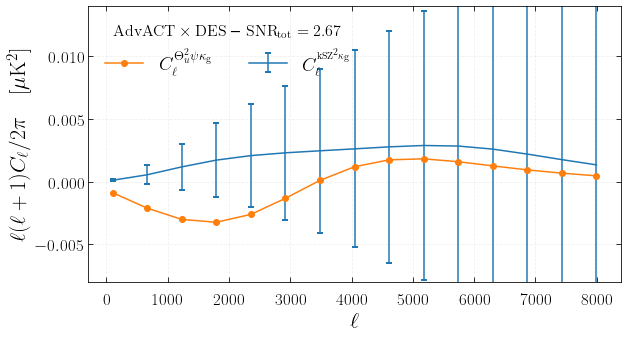

In [200]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{AdvACT\times DES}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=2.67$')
ax.set_ylim(-0.008,0.014)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_advact_des.pdf')

### compute derivatives

In [201]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 91.3474 seconds
computed in 104.2437 seconds
computed in 105.3638 seconds


Text(0.5, 1.0, 'derivatives advact x DES lensing - AGN')

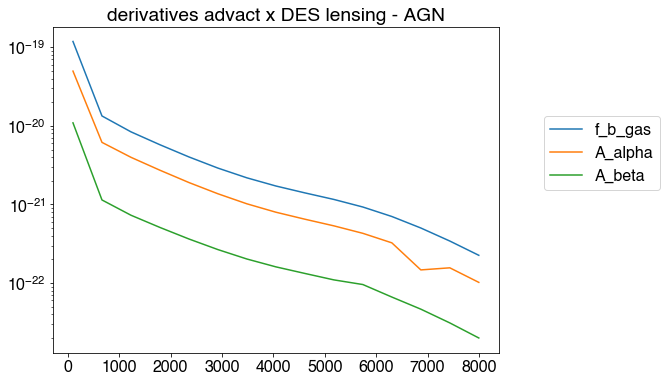

In [202]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives advact x DES lensing - AGN')

### save fisher matrix

In [203]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_des_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_des_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[811.66383583 357.56959067 -73.76301862]
 [357.56959067 158.0986028  -32.46746107]
 [-73.76301862 -32.46746107   6.7100679 ]]
Inverse Fisher F^-1
[[  2.76136179  -1.8165447   21.56577084]
 [ -1.8165447    2.19407008  -9.35280185]
 [ 21.56577084  -9.35280185 191.96446967]]
sigmas
[ 1.66173457  1.48123937 13.85512431]
Fisher F
[[4845.45111866  357.56959067  -73.76301862]
 [ 357.56959067  158.0986028   -32.46746107]
 [ -73.76301862  -32.46746107    6.7100679 ]]
Inverse Fisher F^-1
[[ 2.47883728e-04 -1.63068771e-04  1.93593020e-03]
 [-1.63068771e-04  9.99174709e-01  4.83283299e+00]
 [ 1.93593020e-03  4.83283299e+00  2.35545481e+01]]
sigmas
[0.01574432 0.99958727 4.8533028 ]


### get forecasts

In [204]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_des_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.09475057375799073 

A_alpha  =  0.5940970891965877 

A_beta  =  0.27643201995606687 



In [205]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_des_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.000448873487002 

A_alpha  =  0.880363353078083 

A_beta  =  0.7891533160099584 



##  AdvACT x Rubin galaxy lensing

In [59]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [60]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 41.6330 seconds


### save data

In [61]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [62]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

5.983718641587022
11.967437283174045


### make plot

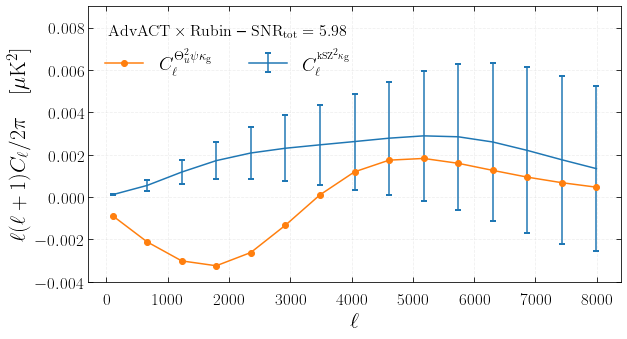

In [63]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{AdvACT\times Rubin}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=5.98$')
ax.set_ylim(-0.004,0.009)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_advact_rubin.pdf')

### compute derivatives

In [64]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 88.0412 seconds
computed in 106.2151 seconds
computed in 104.4285 seconds


Text(0.5, 1.0, 'derivatives advact x Rubin lensing - AGN')

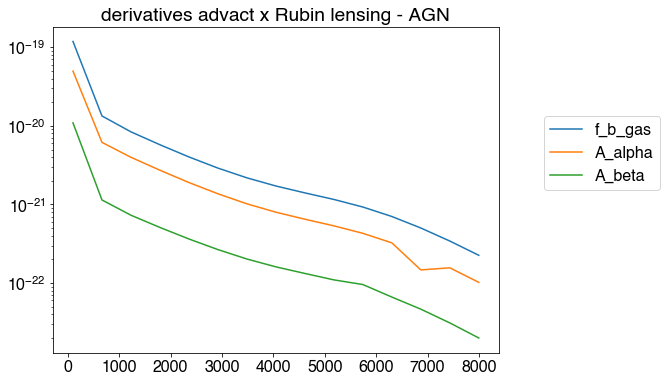

In [65]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives advact x Rubin lensing - AGN')

### save fisher matrix

In [66]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[5777.15366508 2611.97728284 -522.34530828]
 [2611.97728284 1185.24148672 -235.98918473]
 [-522.34530828 -235.98918473   47.29319062]]
Inverse Fisher F^-1
[[ 0.25172813 -0.18094435  1.87739706]
 [-0.18094435  0.26036433 -0.69930288]
 [ 1.87739706 -0.69930288 17.26721372]]
sigmas
[0.50172515 0.51025908 4.1553837 ]
Fisher F
[[9810.94094792 2611.97728284 -522.34530828]
 [2611.97728284 1185.24148672 -235.98918473]
 [-522.34530828 -235.98918473   47.29319062]]
Inverse Fisher F^-1
[[ 2.47662081e-04 -1.78021638e-04  1.84707235e-03]
 [-1.78021638e-04  1.30427938e-01  6.48858612e-01]
 [ 1.84707235e-03  6.48858612e-01  3.27929713e+00]]
sigmas
[0.01573728 0.36114808 1.81088297]


### get forecasts

In [67]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.313817841907479 

A_alpha  =  1.7246140851319807 

A_beta  =  0.9216958705525864 



In [68]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.004922870162442 

A_alpha  =  2.436673598289098 

A_beta  =  2.1149903454428007 



##  SPT-3G x Rubin galaxy lensing

In [11]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [12]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'spt_2p3uK_1p5arcmin_fl_A_070722.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_spt_2p3uK_1p5arcmin_uK2_070722.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.036, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 57.0073 seconds


### save data

In [13]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_spt_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_070722.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [14]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_spt_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_070722.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

25.978032161753205
51.95606432350641


### make plot

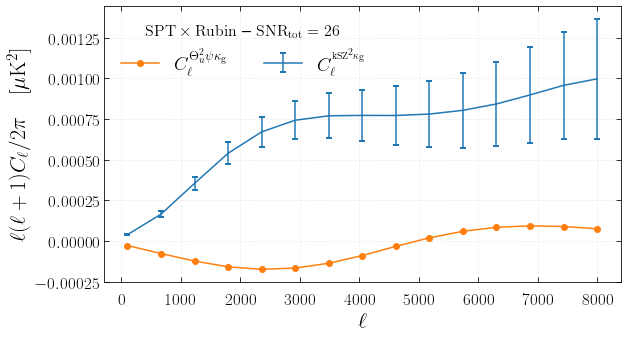

In [18]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{SPT\times Rubin}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=26$')
# ax.set_ylim(-0.004,0.009)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_spt_rubin.pdf')

### compute derivatives

In [64]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 88.0412 seconds
computed in 106.2151 seconds
computed in 104.4285 seconds


Text(0.5, 1.0, 'derivatives advact x Rubin lensing - AGN')

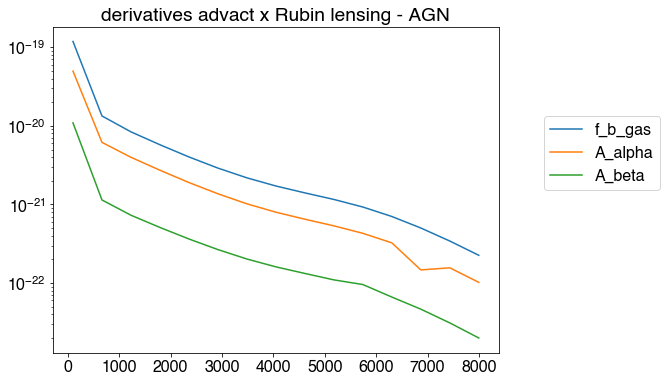

In [65]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives advact x Rubin lensing - AGN')

### save fisher matrix

In [66]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[5777.15366508 2611.97728284 -522.34530828]
 [2611.97728284 1185.24148672 -235.98918473]
 [-522.34530828 -235.98918473   47.29319062]]
Inverse Fisher F^-1
[[ 0.25172813 -0.18094435  1.87739706]
 [-0.18094435  0.26036433 -0.69930288]
 [ 1.87739706 -0.69930288 17.26721372]]
sigmas
[0.50172515 0.51025908 4.1553837 ]
Fisher F
[[9810.94094792 2611.97728284 -522.34530828]
 [2611.97728284 1185.24148672 -235.98918473]
 [-522.34530828 -235.98918473   47.29319062]]
Inverse Fisher F^-1
[[ 2.47662081e-04 -1.78021638e-04  1.84707235e-03]
 [-1.78021638e-04  1.30427938e-01  6.48858612e-01]
 [ 1.84707235e-03  6.48858612e-01  3.27929713e+00]]
sigmas
[0.01573728 0.36114808 1.81088297]


### get forecasts

In [67]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.313817841907479 

A_alpha  =  1.7246140851319807 

A_beta  =  0.9216958705525864 



In [68]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.004922870162442 

A_alpha  =  2.436673598289098 

A_beta  =  2.1149903454428007 



##  SO x DES galaxy lensing

In [206]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [207]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.12, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 52.9515 seconds


### save data

In [208]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [209]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

6.143209177624276
12.286418355248552


### make plot

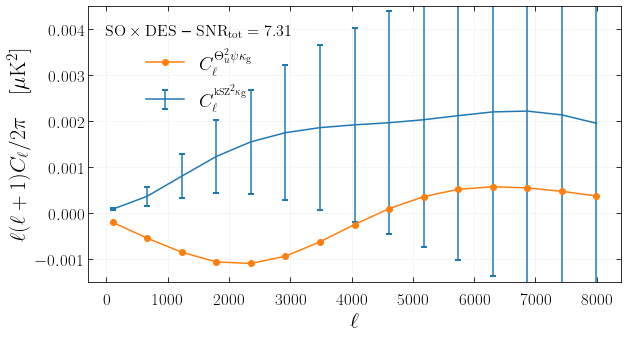

In [210]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{SO\times DES}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=7.31$')
ax.set_ylim(-0.0015,0.0045)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_des.pdf')

### compute derivatives

In [211]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 114.4953 seconds
computed in 119.9581 seconds
computed in 121.1482 seconds


Text(0.5, 1.0, 'derivatives SO x DES lensing - AGN')

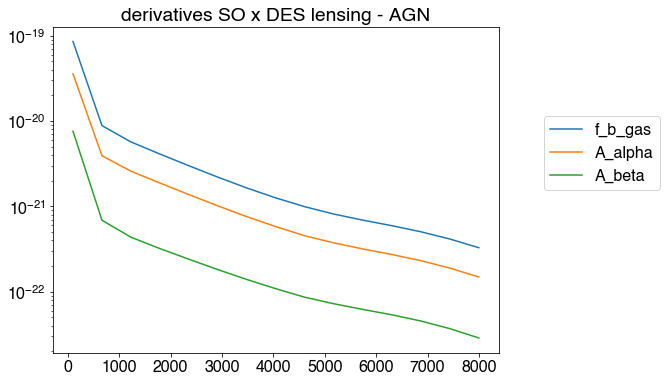

In [212]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives SO x DES lensing - AGN')

### save fisher matrix

In [213]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_des_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_des_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[6089.20523168 2642.3041316  -520.08690732]
 [2642.3041316  1148.8061309  -225.2905526 ]
 [-520.08690732 -225.2905526    44.56080555]]
Inverse Fisher F^-1
[[ 0.45707129 -0.60035027  2.29940976]
 [-0.60035027  0.89077182 -2.5033623 ]
 [ 2.29940976 -2.5033623  14.20326739]]
sigmas
[0.67607048 0.94380709 3.76872225]
Fisher F
[[10122.99251451  2642.3041316   -520.08690732]
 [ 2642.3041316   1148.8061309   -225.2905526 ]
 [ -520.08690732  -225.2905526     44.56080555]]
Inverse Fisher F^-1
[[ 2.47771596e-04 -3.25441014e-04  1.24647606e-03]
 [-3.25441014e-04  1.02656105e-01  5.15210457e-01]
 [ 1.24647606e-03  5.15210457e-01  2.64179076e+00]]
sigmas
[0.01574076 0.32039991 1.62535866]


### get forecasts

In [214]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_des_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.2328903696243181 

A_alpha  =  0.9323939278281453 

A_beta  =  1.016259556282846 



In [215]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_des_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.002711528593819 

A_alpha  =  2.7465675297302923 

A_beta  =  2.356402992612583 



## SO x Rubin galaxy lensing

In [512]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [513]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',



'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 51.9233 seconds


### save data

In [514]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [515]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_so_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

18.807085618865894
37.61417123773179


### make plot

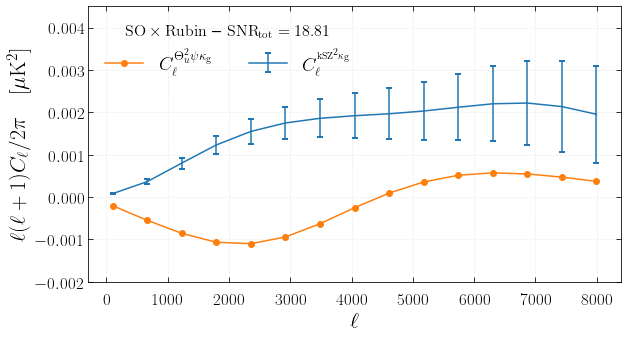

In [519]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{SO\times Rubin}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=18.81$')
ax.set_ylim(-0.002,0.0045)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_rubin.pdf')

### compute derivatives

In [520]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 116.0217 seconds
computed in 126.4386 seconds
computed in 130.5587 seconds


Text(0.5, 1.0, 'derivatives SO x Rubin lensing - AGN')

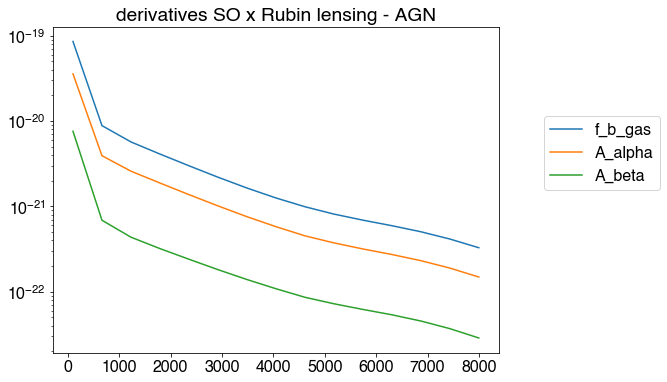

In [521]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives SO x Rubin lensing - AGN')

### save fisher matrix

In [522]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[57070.54095494 25331.66781618 -4775.60807389]
 [25331.66781618 11263.10723288 -2116.83217827]
 [-4775.60807389 -2116.83217827   401.08876603]]
Inverse Fisher F^-1
[[ 0.03216041 -0.04497907  0.14553485]
 [-0.04497907  0.07388756 -0.1455908 ]
 [ 0.14553485 -0.1455908   0.96693338]]
sigmas
[0.17933325 0.27182267 0.98332771]
Fisher F
[[61104.32823777 25331.66781618 -4775.60807389]
 [25331.66781618 11263.10723288 -2116.83217827]
 [-4775.60807389 -2116.83217827   401.08876603]]
Inverse Fisher F^-1
[[ 2.46009637e-04 -3.44065357e-04  1.11326227e-03]
 [-3.44065357e-04  1.14617218e-02  5.63950483e-02]
 [ 1.11326227e-03  5.63950483e-02  3.13385385e-01]]
sigmas
[0.01568469 0.10705943 0.55980835]


### get forecasts

In [523]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.8779760819603285 

A_alpha  =  3.237404755486878 

A_beta  =  3.8949375310330225 



In [524]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.038468110249413 

A_alpha  =  8.219733550231538 

A_beta  =  6.841627184476182 



##  S4 x DES galaxy lensing

In [217]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [218]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.12, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 57.9863 seconds


### save data

In [219]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [220]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_des_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

9.718043634362692
19.436087268725384


### make plot

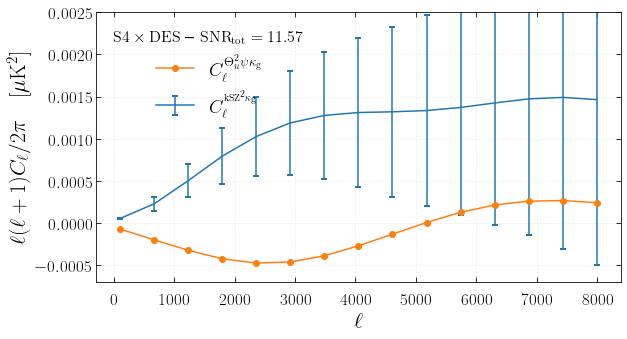

In [221]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{S4\times DES}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=11.57$')
ax.set_ylim(-0.0007,0.0025)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_s4_des.pdf')

### compute derivatives

In [222]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 125.5522 seconds
computed in 133.0488 seconds
computed in 145.2012 seconds


Text(0.5, 1.0, 'derivatives S4 x DES lensing - AGN')

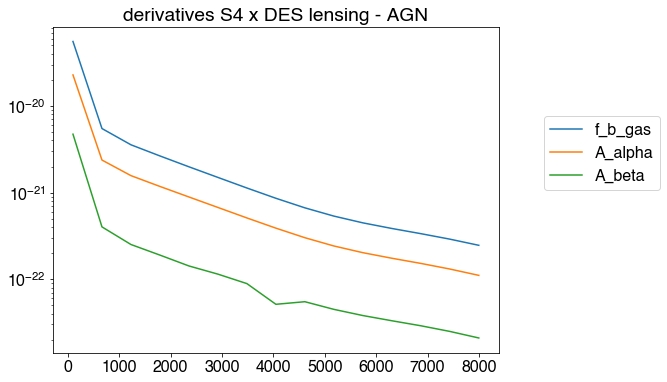

In [223]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives S4 x DES lensing - AGN')

### save fisher matrix

In [224]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_des_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_des_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[15237.98534248  6480.67186344 -1225.54204633]
 [ 6480.67186344  2760.85627519  -519.96873446]
 [-1225.54204633  -519.96873446    99.22962504]]
Inverse Fisher F^-1
[[ 0.15544739 -0.25239917  0.59727763]
 [-0.25239917  0.43745026 -0.82500903]
 [ 0.59727763 -0.82500903  3.06370146]]
sigmas
[0.39426817 0.66140023 1.75034324]
Fisher F
[[19271.77262531  6480.67186344 -1225.54204633]
 [ 6480.67186344  2760.85627519  -519.96873446]
 [-1225.54204633  -519.96873446    99.22962504]]
Inverse Fisher F^-1
[[ 2.47511254e-04 -4.01882818e-04  9.51015874e-04]
 [-4.01882818e-04  2.82834927e-02  1.43243589e-01]
 [ 9.51015874e-04  1.43243589e-01  7.72427564e-01]]
sigmas
[0.01573249 0.16817697 0.87887858]


### get forecasts

In [225]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_des_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.39934825106656013 

A_alpha  =  1.3305105803760695 

A_beta  =  2.1881422506511345 



In [226]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_des_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.007970774619091 

A_alpha  =  5.232583323680389 

A_beta  =  4.357826067949768 



## S4 x Rubin galaxy lensing

In [539]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [540]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',



'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 61.5786 seconds


### save data

In [541]:
cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [542]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_x_rubin_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

29.717496998355077
59.434993996710155


### make plot

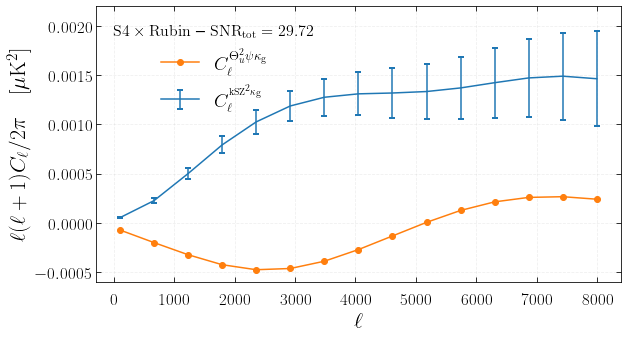

In [551]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{S4\times Rubin}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=29.72$')
ax.set_ylim(-0.00060,0.0022)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_s4_rubin.pdf')

### compute derivatives

In [552]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 121.1648 seconds
computed in 136.6884 seconds
computed in 149.4050 seconds


Text(0.5, 1.0, 'derivatives S4 x Rubin lensing - AGN')

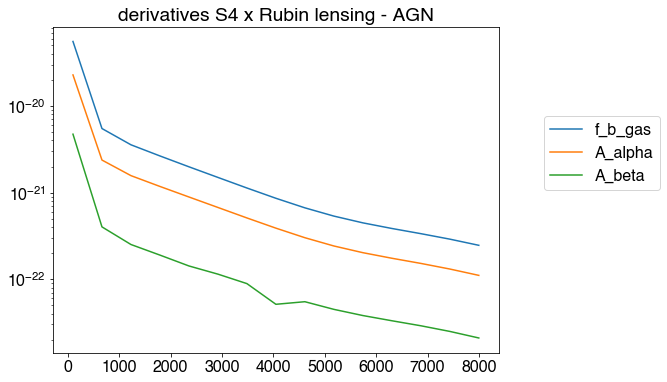

In [553]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives S4 x Rubin lensing - AGN')

### save fisher matrix

In [554]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[142493.68546653  61903.45579593 -11091.15641668]
 [ 61903.45579593  26934.16529318  -4808.70184911]
 [-11091.15641668  -4808.70184911    870.52839076]]
Inverse Fisher F^-1
[[ 0.01093414 -0.0187561   0.03570221]
 [-0.0187561   0.03486594 -0.04637063]
 [ 0.03570221 -0.04637063  0.19987428]]
sigmas
[0.10456646 0.18672425 0.44707301]
Fisher F
[[146527.47274936  61903.45579593 -11091.15641668]
 [ 61903.45579593  26934.16529318  -4808.70184911]
 [-11091.15641668  -4808.70184911    870.52839076]]
Inverse Fisher F^-1
[[ 0.00024241 -0.00041582  0.00079152]
 [-0.00041582  0.00340557  0.01351412]
 [ 0.00079152  0.01351412  0.08588375]]
sigmas
[0.01556952 0.05835729 0.2930593 ]


### get forecasts

In [555]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  1.505743898104351 

A_alpha  =  4.712831943748745 

A_beta  =  8.566833404801367 



In [556]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.112727855859571 

A_alpha  =  15.079522457699998 

A_beta  =  13.069027449084833 



## SO CMB lensing

In [557]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [558]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',




'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/so_lensing_noise.dat',


      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 29.0526 seconds


### save data

In [559]:
cl_kSZ2X = M.cl_kSZ_kSZ_kcmb().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_so_cmb_lensing_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [560]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_so_cmb_lensing_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

16.389657430318326
32.77931486063665


### make plot

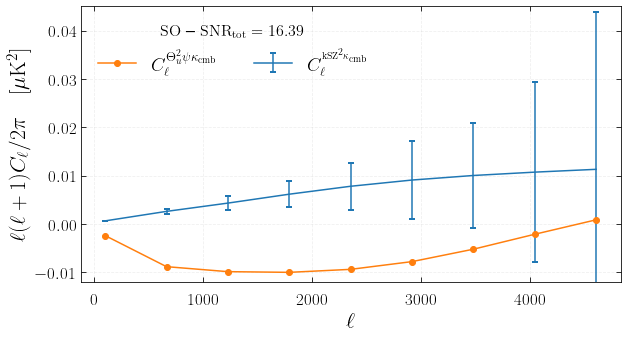

In [564]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{cmb}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{SO}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=16.39$')
ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_cmb_lensing.pdf')

### compute derivatives

In [565]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kcmb()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 61.7889 seconds
computed in 71.0912 seconds
computed in 74.6838 seconds


Text(0.5, 1.0, 'derivatives SO CMB lensing - AGN')

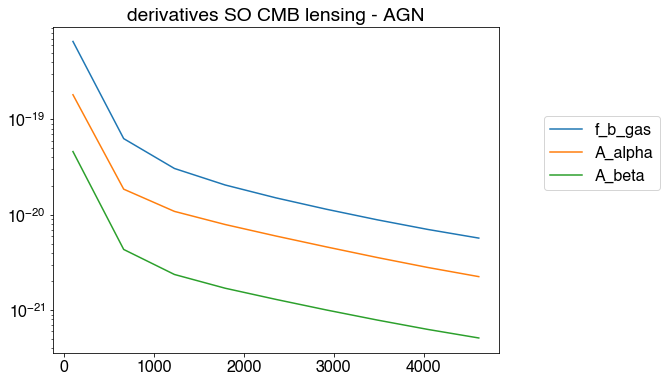

In [566]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives SO CMB lensing - AGN')

### save fisher matrix

In [567]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_so_cmb_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_so_cmb_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[43341.20525085 12386.56036289 -3074.78331356]
 [12386.56036289  3570.15812305  -882.19781809]
 [-3074.78331356  -882.19781809   218.58817216]]
Inverse Fisher F^-1
[[ 0.02823048  0.0666926   0.66626975]
 [ 0.0666926   0.26059885  1.98988366]
 [ 0.66626975  1.98988366 17.40764887]]
sigmas
[0.1680193  0.51048883 4.17224746]
Fisher F
[[47374.99253368 12386.56036289 -3074.78331356]
 [12386.56036289  3570.15812305  -882.19781809]
 [-3074.78331356  -882.19781809   218.58817216]]
Inverse Fisher F^-1
[[2.45747947e-04 5.80562851e-04 5.79991568e-03]
 [5.80562851e-04 1.04413639e-01 4.29568484e-01]
 [5.79991568e-03 4.29568484e-01 1.81985081e+00]]
sigmas
[0.01567635 0.32313099 1.34901846]


### get forecasts

In [568]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_so_cmb_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  0.9370965634241539 

A_alpha  =  1.7238379130440231 

A_beta  =  0.9179704790554826 



In [569]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_so_cmb_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.043811525968685 

A_alpha  =  2.723353737063971 

A_beta  =  2.839101245873251 



## S4 CMB lensing

In [570]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [571]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',




'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/s4_lensing_noise.dat',


      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 30.4183 seconds


### save data

In [572]:
cl_kSZ2X = M.cl_kSZ_kSZ_kcmb().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_cmb_lensing_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [573]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_cmb_lensing_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

34.516268898726885
69.03253779745377


### make plot

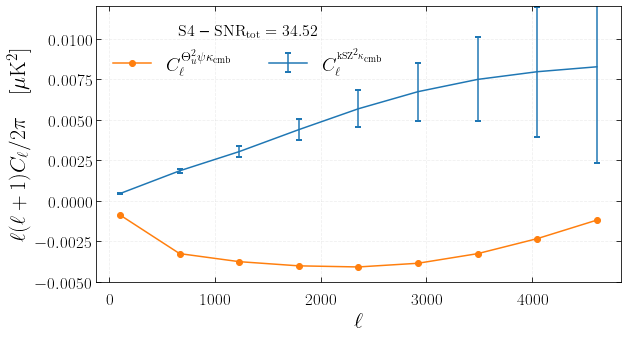

In [576]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{cmb}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{S4}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=34.52$')
ax.set_ylim(-0.005,0.012)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_s4_cmb_lensing.pdf')

### compute derivatives

In [577]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kcmb()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 61.2332 seconds
computed in 74.0021 seconds
computed in 74.4653 seconds


Text(0.5, 1.0, 'derivatives S4 CMB lensing - AGN')

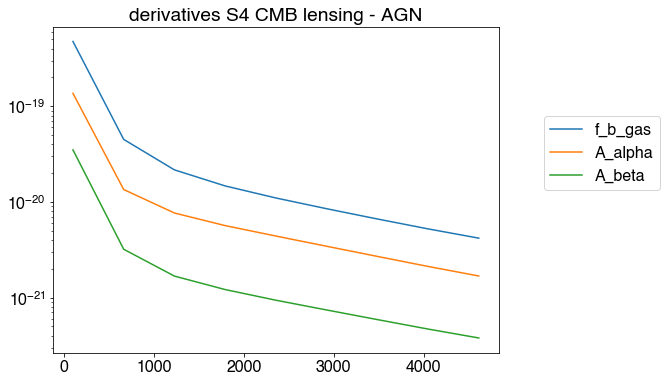

In [578]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives S4 CMB lensing - AGN')

### save fisher matrix

In [579]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[192265.88649275  58244.03343421 -14287.64538629]
 [ 58244.03343421  17848.21436304  -4348.2034797 ]
 [-14287.64538629  -4348.2034797    1064.21655131]]
Inverse Fisher F^-1
[[0.0043008  0.00694707 0.08612496]
 [0.00694707 0.02338522 0.1888159 ]
 [0.08612496 0.1888159  1.92867962]]
sigmas
[0.06558049 0.15292228 1.3887691 ]
Fisher F
[[196299.67377558  58244.03343421 -14287.64538629]
 [ 58244.03343421  17848.21436304  -4348.2034797 ]
 [-14287.64538629  -4348.2034797    1064.21655131]]
Inverse Fisher F^-1
[[2.34395028e-04 3.78617620e-04 4.69383744e-03]
 [3.78617620e-04 1.27752176e-02 5.72804471e-02]
 [4.69383744e-03 5.72804471e-02 2.97994730e-01]]
sigmas
[0.01530996 0.11302751 0.54588894]


### get forecasts

In [580]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  2.400870990094658 

A_alpha  =  5.754557256936443 

A_beta  =  2.757837854927564 



In [581]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.284171406150248 

A_alpha  =  7.785715306742304 

A_beta  =  7.0160791842527335 



## S4 CMB lensing - check derivs - cut l<500

In [582]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [583]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',




'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 5000.0,
'ell_min' : 500.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/s4_lensing_noise.dat',


      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 29.2706 seconds


### save data

In [584]:
cl_kSZ2X = M.cl_kSZ_kSZ_kcmb().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_cmb_lensing_check_der_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [585]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_s4_cmb_lensing_check_der_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

23.290442669391176
46.58088533878235


### make plot

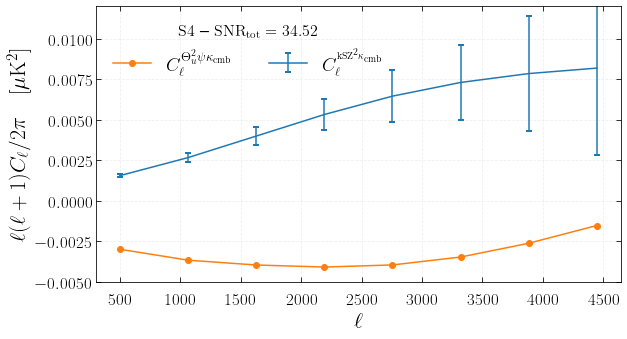

In [586]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{cmb}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{S4}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=34.52$')
ax.set_ylim(-0.005,0.012)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_s4_cmb_lensing_check_der.pdf')

### compute derivatives

In [587]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kcmb()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 59.2286 seconds
computed in 70.8305 seconds
computed in 72.4623 seconds


Text(0.5, 1.0, 'derivatives S4 CMB lensing - AGN check derivatives')

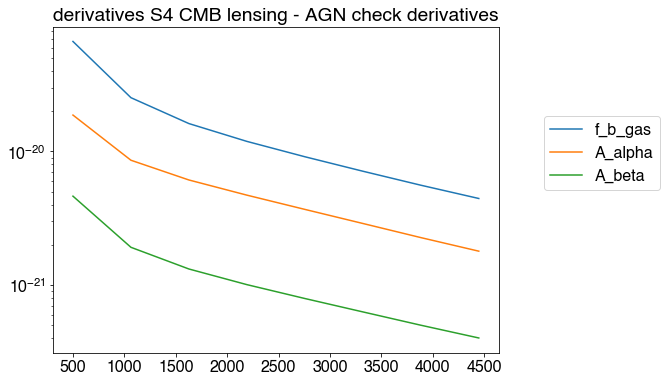

In [588]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.yscale('log')
plt.xscale('linear')
plt.title('derivatives S4 CMB lensing - AGN check derivatives')

### save fisher matrix

In [589]:
#theory parameters
M_parameters = len(param_list)

fac_cov = 1.
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_check_der_agn_180422.npy',inverse_fisher_F)

fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat_fb[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print('sigmas')
print(fisher_sigmas) 
np.save(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_check_der_agn_ffree10pc_180422.npy',inverse_fisher_F)

Fisher F
[[87519.47339062 27697.19591003 -6463.63965478]
 [27697.19591003  8944.68112669 -2069.25717338]
 [-6463.63965478 -2069.25717338   480.56872314]]
Inverse Fisher F^-1
[[ 0.01535769  0.05930912  0.46193688]
 [ 0.05930912  0.25780446  1.90777395]
 [ 0.46193688  1.90777395 14.42971238]]
sigmas
[0.12392616 0.50774448 3.79864612]
Fisher F
[[91553.26067345 27697.19591003 -6463.63965478]
 [27697.19591003  8944.68112669 -2069.25717338]
 [-6463.63965478 -2069.25717338   480.56872314]]
Inverse Fisher F^-1
[[2.43967821e-04 9.42167236e-04 7.33819374e-03]
 [9.42167236e-04 3.24000295e-02 1.52181820e-01]
 [7.33819374e-03 1.52181820e-01 7.56051623e-01]]
sigmas
[0.01561947 0.18000008 0.86951229]


### get forecasts

In [590]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_check_der_agn_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')



f_b_gas  =  1.270517055495115 

A_alpha  =  1.7331552159794068 

A_beta  =  1.0082539607145635 



In [591]:

fisher = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_check_der_agn_ffree10pc_180422.npy')

inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)

for (p,r) in zip(param_list,(fisher_sigmas/param_fiducial_values)**-1):
    print(p,' = ',r,'\n')




f_b_gas  =  10.080387571333896 

A_alpha  =  4.88888666015398 

A_beta  =  4.404768100141311 



## AdvACT CMB lensing, zmax=6

In [269]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [274]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',



'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 164.,
'ell_max' : 1000.0,
'ell_min' : 10.0,
'f_sky':0.3, 
        
'z_max':6.,


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/advact_lensing_noise.dat',


      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 30.2184 seconds


### save data

In [275]:
cl_kSZ2X = M.cl_kSZ_kSZ_kcmb().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_cmb_lensing_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422_zmax6.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [280]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_cmb_lensing_filterA_nonlinvel_hmAGN_l_cl_lensing_covll_180422_zmax6.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

1.928970955991461
3.857941911982922


### make plot

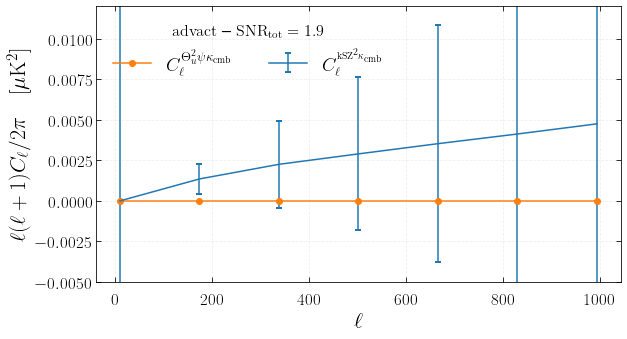

In [281]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{cmb}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{advact}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=1.9$')
ax.set_ylim(-0.005,0.012)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_advact_cmb_lensing_zmx6.pdf')

## AdvACT CMB lensing -nfw

In [284]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]


prior_list = [np.inf, # f_b_gas
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

prior_list_fb = [0.015745030410017352,
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list_fb = np.asarray(prior_list_fb)
prior_mat_fb = np.diag(prior_list_fb)
prior_mat_fb

param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [285]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
})


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',



'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 164.,
'ell_max' : 1000.0,
'ell_min' : 10.0,
'f_sky':0.3, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile
'gas profile mode' : 'custom',
        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/advact_lensing_noise.dat',


      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 34.0667 seconds


### save data

In [286]:
cl_kSZ2X = M.cl_kSZ_kSZ_kcmb().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_cmb_lensing_filterA_nonlinvel_hmnfw_l_cl_lensing_covll_180422.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

### compute SNR tot

In [287]:
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'gas_fisher_data_advact_cmb_lensing_filterA_nonlinvel_hmnfw_l_cl_lensing_covll_180422.txt',unpack=True)
snrl = cl_tot**2/covll
snrl = np.sqrt(np.sum(snrl[l<l_max_advact_s4_so]))
print(snrl)
print(2.*snrl)

2.9679698428196826
5.935939685639365


### make plot

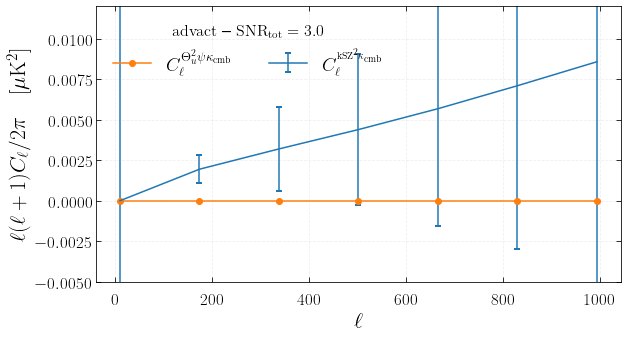

In [288]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi

ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}$')
ax.plot(l,
        fac_l*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{cmb}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{advact}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=3.0$')
ax.set_ylim(-0.005,0.012)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_advact_cmb_lensing_nfw.pdf')

# Contour Plots

## advact,so,s4 x unwise blue

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


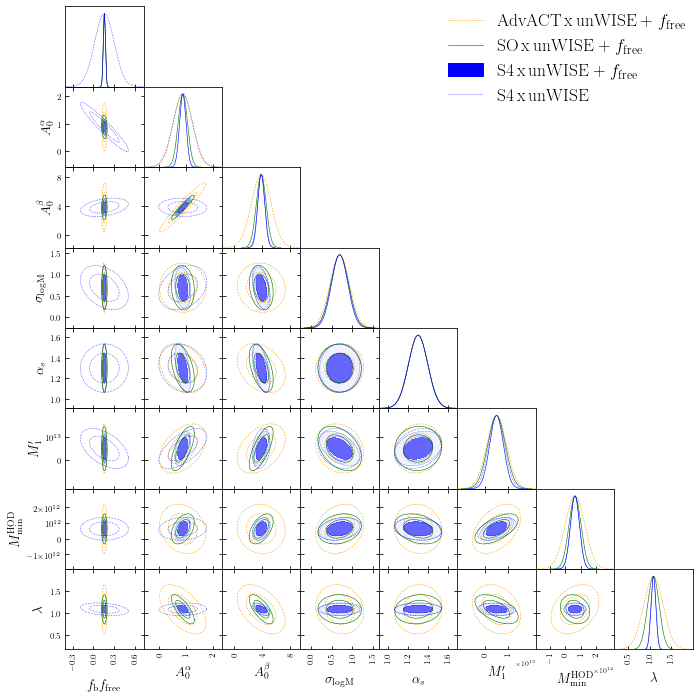

In [179]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]


# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_advact = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_advact_x_unwise_blue_agn_ffree10pc_180422.npy')
inverse_fisher_F_so = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_so_x_unwise_blue_agn_ffree10pc_180422.npy')
inverse_fisher_F_s4 = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_ffree10pc_180422.npy')
inverse_fisher_F_s4_no_prior = np.load(path_to_kSZ2X_2022+'kSZ2g_inverse_fisher_s4_x_unwise_blue_agn_180422.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_\mathrm{b} f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, inverse_fisher_F_advact, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_so, 
                     labels = labels, 
                     names = names)


matrix3 = GaussianND(mean, 
                     inverse_fisher_F_s4, 
                     labels = labels, 
                     names = names)

matrix4 = GaussianND(mean, 
                     inverse_fisher_F_s4_no_prior, 
                     labels = labels, 
                     names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 18
g.settings.axes_fontsize = 13
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2,
                 matrix3,
                 matrix4], 
                names,
            filled = [False,False,True,False],
            legend_labels = ['$\mathrm{AdvACT\,x\, unWISE}$ $+$ $f_\mathrm{free}$' , 
                             '$\mathrm{SO\,x\, unWISE}$ $+$ $f_\mathrm{free}$', 
                             '$\mathrm{S4\,x\, unWISE}$ $+$ $f_\mathrm{free}$',
                             '$\mathrm{S4\,x\, unWISE}$'], 
            contour_ls =  ['--', '-','-',':'],
            legend_loc='upper right', 
            contour_colors = ['orange','green','blue','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'advact_so_s4_unwise_blue_fb_prior.pdf')

## AdvACT x DES vs AdvACT x Rubin

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


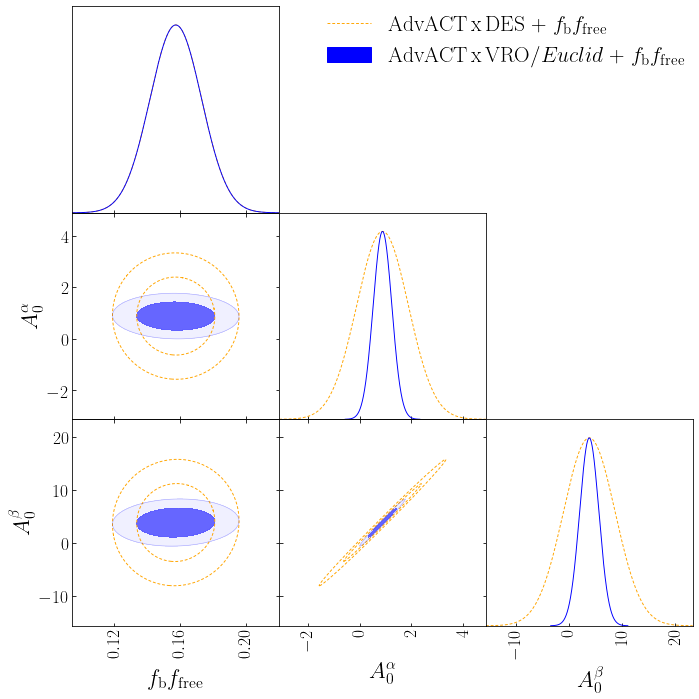

In [325]:

param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]





# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_advact_lsst = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_advact_des = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_des_lensing_agn_ffree10pc_180422.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_\mathrm{b} f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, inverse_fisher_F_advact_des, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_advact_lsst, 
                     labels = labels, 
                     names = names)



# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2], 
                names,
            filled = [False,True],
            legend_labels = ['$\mathrm{AdvACT\,x\,DES}$ $+$ $f_\mathrm{b}f_\mathrm{free}$' , 
                             '$\mathrm{AdvACT\,x\,VRO}/Euclid$ $+$ $f_\mathrm{b}f_\mathrm{free}$'], 
            contour_ls =  ['--','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'advact_des_lsst_fb_prior.pdf')

## AdvACT, SO, S4 x Rubin

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


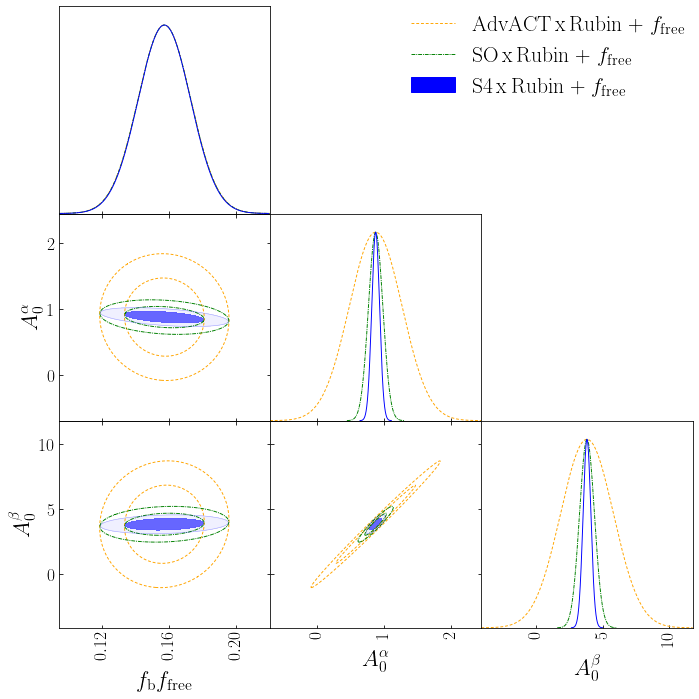

In [184]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]






# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_advact_lsst = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_advact_x_rubin_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_so_lsst = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_s4_lsst = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_ffree10pc_180422.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_\mathrm{b} f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, inverse_fisher_F_advact_lsst, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst, 
                     labels = labels, 
                     names = names)

matrix3 = GaussianND(mean, 
                     inverse_fisher_F_s4_lsst, 
                     labels = labels, 
                     names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2,
                 matrix3], 
                names,
            filled = [False,False,True],
            legend_labels = ['$\mathrm{AdvACT\,x\,Rubin}$ $+$ $f_\mathrm{free}$' , 
                             '$\mathrm{SO\,x\,Rubin}$ $+$ $f_\mathrm{free}$',
                             '$\mathrm{S4\,x\,Rubin}$ $+$ $f_\mathrm{free}$'], 
            contour_ls =  ['--','-.','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','green','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'advact_so_s4_lsst_fb_prior.pdf')

## SO x Rubin with and without ffree prior

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


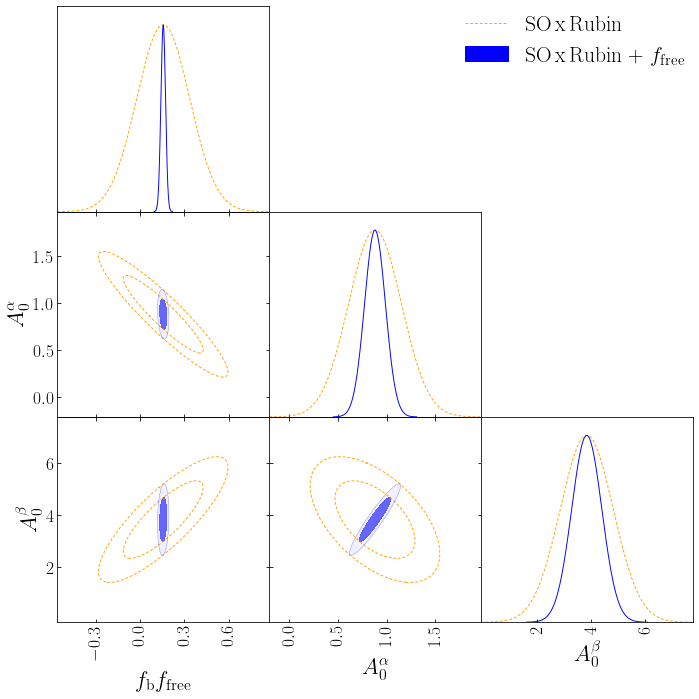

In [186]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]








# plot ellipses
plt.rcParams['text.usetex'] = True
# inverse_fisher_F_advact_lsst = np.load('test_fisher_advact_lsst_fb_without_prior.npy')
inverse_fisher_F_so_lsst_with_prior = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_so_lsst_without_prior = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_so_x_rubin_lensing_agn_180422.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_\mathrm{b} f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst_without_prior, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst_with_prior, 
                     labels = labels, 
                     names = names)

# matrix3 = GaussianND(mean, 
#                      inverse_fisher_F_s4_lsst, 
#                      labels = labels, 
#                      names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2], 
                names,
            filled = [False,True],
            legend_labels = [r'$\mathrm{SO\,x\,Rubin}$' , 
                             '$\mathrm{SO\,x\,Rubin}$ $+$ $f_\mathrm{free}$',
                             ], 
            contour_ls =  ['--','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'advact_so_lsst_fb_prior_vs_no_prior.pdf')

## S4 x Rubin with and without ffree prior

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


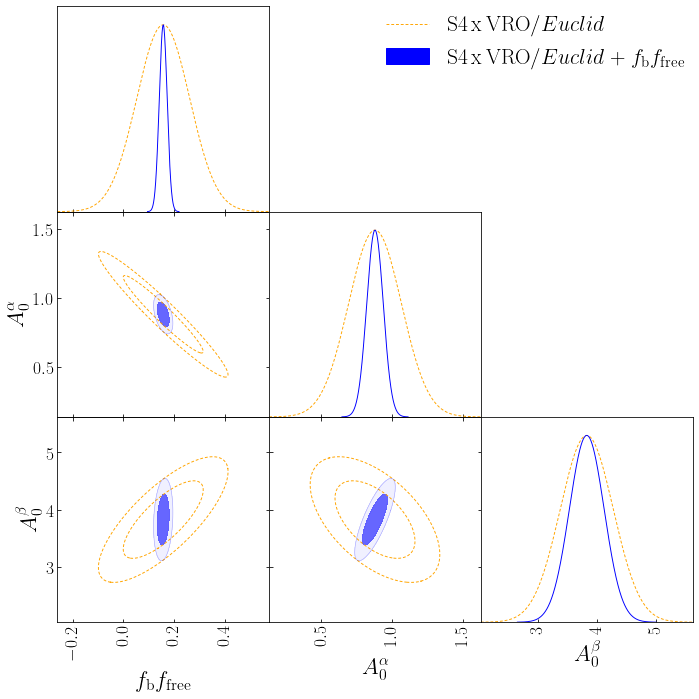

In [326]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]








# plot ellipses
plt.rcParams['text.usetex'] = True
# inverse_fisher_F_advact_lsst = np.load('test_fisher_advact_lsst_fb_without_prior.npy')
inverse_fisher_F_so_lsst_with_prior = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_so_lsst_without_prior = np.load(path_to_kSZ2X_2022+'kSZ2kg_inverse_fisher_s4_x_rubin_lensing_agn_180422.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_\mathrm{b} f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst_without_prior, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst_with_prior, 
                     labels = labels, 
                     names = names)

# matrix3 = GaussianND(mean, 
#                      inverse_fisher_F_s4_lsst, 
#                      labels = labels, 
#                      names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2], 
                names,
            filled = [False,True],
            legend_labels = [r'$\mathrm{S4\,x\,VRO}/Euclid$' , 
                             '$\mathrm{S4\,x\,VRO}/Euclid$ $+$ $f_\mathrm{b}f_\mathrm{free}$',
                             ], 
            contour_ls =  ['--','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'advact_s4_lsst_fb_prior_vs_no_prior.pdf')

## SO, S4 CMB lensing

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


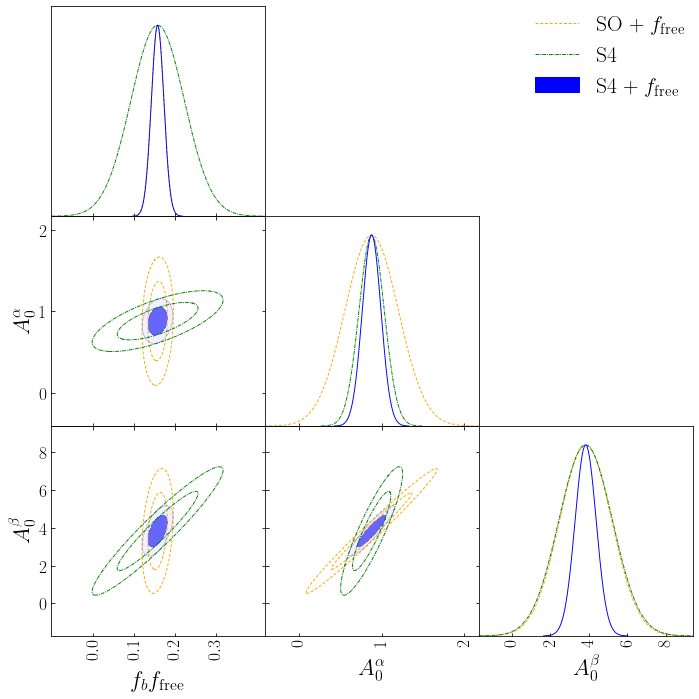

In [188]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15745030410017352, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]






# plot ellipses
plt.rcParams['text.usetex'] = True
# inverse_fisher_F_advact_lsst = np.load('test_fisher_advact_lsst_fb_without_prior.npy')
inverse_fisher_F_s4 = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_ffree10pc_180422.npy')
inverse_fisher_F_s4_no_prior = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_s4_cmb_lensing_agn_180422.npy')
inverse_fisher_F_so = np.load(path_to_kSZ2X_2022+'kSZ2kcmb_inverse_fisher_so_cmb_lensing_agn_ffree10pc_180422.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b f_\mathrm{free}', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, 
                     inverse_fisher_F_so, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_s4_no_prior, 
                     labels = labels, 
                     names = names)

matrix3 = GaussianND(mean, 
                     inverse_fisher_F_s4, 
                     labels = labels, 
                     names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2,
                 matrix3], 
                names,
            filled = [False,False,True],
            legend_labels = [r'$\mathrm{SO}$ $+$ $f_\mathrm{free}$' , 
                             r'$\mathrm{S4}$',
                             r'$\mathrm{S4}$ $+$ $f_\mathrm{free}$'
                             ], 
            contour_ls =  ['--','-.','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','green','blue'])

# Save triplot
g.export(path_to_kSZ2X_2022+'so_s4_lensing.pdf')

# Varying alpha and beta

## SO lensing

### varying alpha

#### compute the plot and save data

In [2]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {        
'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h)',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/so_lensing_noise.dat',


      })

True

In [4]:
p_name = 'A_alpha'
p_values = [0.68,0.78,0.88,0.98]

for p in p_values:
    ti = time.perf_counter()
    M.set({p_name:p})
    M.compute()
    tf = time.perf_counter()
    cl_kSZ2X = M.cl_kSZ_kSZ_kcmb().copy()
    cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
    cl_1h = np.asarray(cl_kSZ2X['1h'])
    cl_2h = np.asarray(cl_kSZ2X['2h'])
    cl_3h = np.asarray(cl_kSZ2X['3h'])
    l = np.asarray(cl_kSZ2X['ell'])
    fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
    strp = str(p)
    np.savetxt(path_to_kSZ2X_2022+'so_lensing_varying_Aalpha_l_dl1h_dl2h_dl3h_dltot_uK2_Aalpha_'+strp.replace(".","p")+'.txt',
              np.c_[l,fac_l*cl_1h,fac_l*cl_2h,fac_l*cl_3h,fac_l*cl_tot])
    print(f"computed in {tf - ti:0.4f} seconds")
    

computed in 44.0194 seconds
computed in 43.6944 seconds
computed in 47.1790 seconds
computed in 48.1866 seconds


#### make the plot

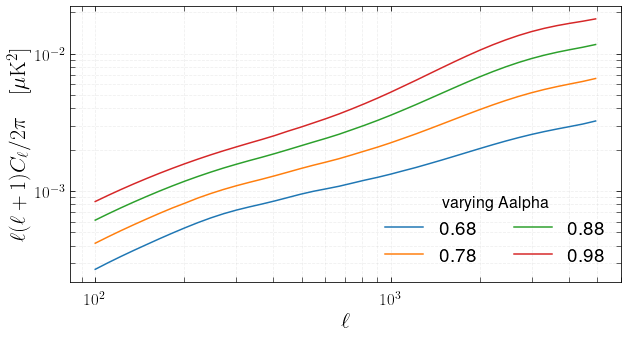

In [197]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_alpha'
p_values = [0.68,0.78,0.88,0.98]

for p in p_values:
    strp = str(p)
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_lensing_varying_Aalpha_l_dl1h_dl2h_dl3h_dltot_uK2_Aalpha_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p))
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=4,
          title=r'varying Aalpha')
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
plt.yscale('log')
plt.xscale('log')
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_cmb_lensing_varying_Aalpha.pdf')

## SO Rubin lensing

### varying alpha

#### compute the plot and save data

In [199]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h)',




'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',

        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,


      })

True

In [200]:
p_name = 'A_alpha'
p_values = [0.68,0.78,0.88,0.98]

for p in p_values:
    ti = time.perf_counter()
    M.set({p_name:p})
    M.compute()
    tf = time.perf_counter()
    cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()
    cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
    cl_1h = np.asarray(cl_kSZ2X['1h'])
    cl_2h = np.asarray(cl_kSZ2X['2h'])
    cl_3h = np.asarray(cl_kSZ2X['3h'])
    l = np.asarray(cl_kSZ2X['ell'])
    fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
    strp = str(p)
    np.savetxt(path_to_kSZ2X_2022+'so_x_rubin_lensing_varying_Aalpha_l_dl1h_dl2h_dl3h_dltot_uK2_Aalpha_'+strp.replace(".","p")+'.txt',
              np.c_[l,fac_l*cl_1h,fac_l*cl_2h,fac_l*cl_3h,fac_l*cl_tot])
    print(f"computed in {tf - ti:0.4f} seconds")
    

computed in 77.2401 seconds
computed in 76.4939 seconds
computed in 85.1734 seconds
computed in 77.8464 seconds


#### make the plot

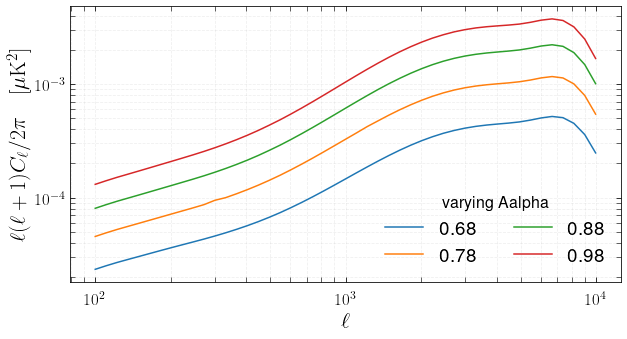

In [201]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_alpha'
p_values = [0.68,0.78,0.88,0.98]

for p in p_values:
    strp = str(p)
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_x_rubin_lensing_varying_Aalpha_l_dl1h_dl2h_dl3h_dltot_uK2_Aalpha_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p))
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=4,
          title=r'varying Aalpha')
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
plt.yscale('log')
plt.xscale('log')
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_x_rubin_lensing_varying_Aalpha.pdf')

## SO x unWISE blue

### varying alpha

#### compute the plot and save data

In [193]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set(
    {        

'output':'gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',


      })

True

In [194]:
p_name = 'A_alpha'
p_values = [0.68,0.78,0.88,0.98]

for p in p_values:
    ti = time.perf_counter()
    M.set({p_name:p})
    M.compute()
    tf = time.perf_counter()
    cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()
    cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
    cl_1h = np.asarray(cl_kSZ2X['1h'])
    cl_2h = np.asarray(cl_kSZ2X['2h'])
    cl_3h = np.asarray(cl_kSZ2X['3h'])
    l = np.asarray(cl_kSZ2X['ell'])
    fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
    strp = str(p)
    np.savetxt(path_to_kSZ2X_2022+'so_x_uwb_varying_Aalpha_l_dl1h_dl2h_dl3h_dltot_uK2_Aalpha_'+strp.replace(".","p")+'.txt',
              np.c_[l,fac_l*cl_1h,fac_l*cl_2h,fac_l*cl_3h,fac_l*cl_tot])
    print(f"computed in {tf - ti:0.4f} seconds")
    

computed in 68.0608 seconds
computed in 57.0585 seconds
computed in 65.4770 seconds
computed in 58.1015 seconds


#### make the plot

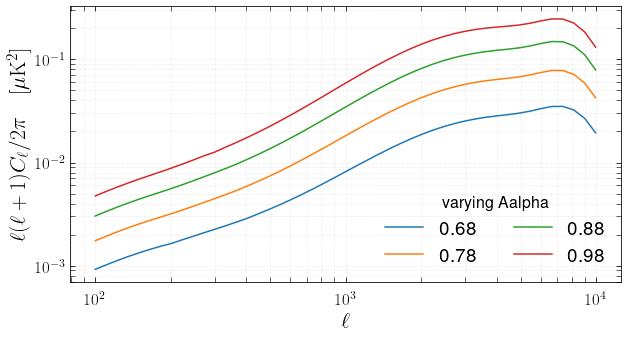

In [196]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_alpha'
p_values = [0.68,0.78,0.88,0.98]

for p in p_values:
    strp = str(p)
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_x_uwb_varying_Aalpha_l_dl1h_dl2h_dl3h_dltot_uK2_Aalpha_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p))
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=4,
          title=r'varying Aalpha')
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
plt.yscale('log')
plt.xscale('log')
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_x_uwb_varying_Aalpha.pdf')

#### ratio plot

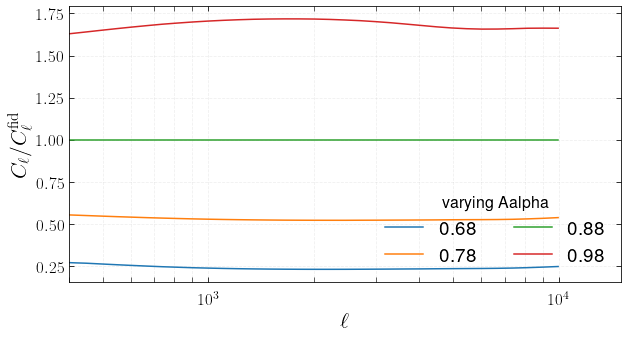

In [11]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

# fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_alpha'
p_values = [0.68,0.78,0.88,0.98]

l,dl_1h_fid,dl_2h_fid,dl_3h_fid,dl_tot_fid = np.loadtxt(path_to_kSZ2X_2022+'so_x_uwb_varying_Aalpha_l_dl1h_dl2h_dl3h_dltot_uK2_Aalpha_'+'0p88'+'.txt',unpack=True)




for p in p_values:
    strp = str(p)
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_x_uwb_varying_Aalpha_l_dl1h_dl2h_dl3h_dltot_uK2_Aalpha_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot/dl_tot_fid,label=str(p))
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$C_\ell/C_\ell^\mathrm{fid}$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=4,
          title=r'varying Aalpha')
# ax.set_ylim(-0.012,0.045)
ax.set_xlim(400,1.5e4)
# plt.yscale('log')
plt.xscale('log')
fig.tight_layout()
# plt.savefig(path_to_kSZ2X_2022+'cls_so_x_uwb_varying_Aalpha.pdf')

## SO lensing

### varying beta

#### compute the plot and save data

In [13]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {        
'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h)',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/so_lensing_noise.dat',


      })

True

In [14]:
p_name = 'A_beta'
p_values = [3.43,3.63,3.83,4.03]

for p in p_values:
    ti = time.perf_counter()
    M.set({p_name:p})
    M.compute()
    tf = time.perf_counter()
    cl_kSZ2X = M.cl_kSZ_kSZ_kcmb().copy()
    cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
    cl_1h = np.asarray(cl_kSZ2X['1h'])
    cl_2h = np.asarray(cl_kSZ2X['2h'])
    cl_3h = np.asarray(cl_kSZ2X['3h'])
    l = np.asarray(cl_kSZ2X['ell'])
    fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
    strp = str(p)
    np.savetxt(path_to_kSZ2X_2022+'so_lensing_varying_Abeta_l_dl1h_dl2h_dl3h_dltot_uK2_Abeta_'+strp.replace(".","p")+'.txt',
              np.c_[l,fac_l*cl_1h,fac_l*cl_2h,fac_l*cl_3h,fac_l*cl_tot])
    print(f"computed in {tf - ti:0.4f} seconds")
    

computed in 43.6334 seconds
computed in 39.9892 seconds
computed in 43.8882 seconds
computed in 44.5749 seconds


#### make the plot

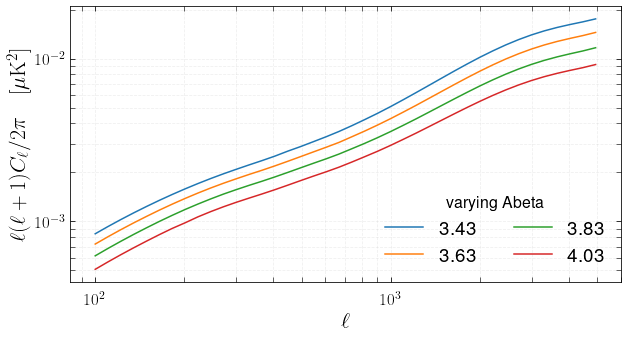

In [202]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_beta'
p_values = [3.43,3.63,3.83,4.03]

for p in p_values:
    strp = str(p)
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_lensing_varying_Abeta_l_dl1h_dl2h_dl3h_dltot_uK2_Abeta_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p))
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=4,
          title=r'varying Abeta')
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
plt.yscale('log')
plt.xscale('log')
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_cmb_lensing_varying_Abeta.pdf')

## SO Rubin lensing

### varying beta

#### compute the plot and save data

In [203]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h)',




'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',

        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,


      })

True

In [204]:
p_name = 'A_beta'
p_values = [3.43,3.63,3.83,4.03]

for p in p_values:
    ti = time.perf_counter()
    M.set({p_name:p})
    M.compute()
    tf = time.perf_counter()
    cl_kSZ2X = M.cl_kSZ_kSZ_kg().copy()
    cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
    cl_1h = np.asarray(cl_kSZ2X['1h'])
    cl_2h = np.asarray(cl_kSZ2X['2h'])
    cl_3h = np.asarray(cl_kSZ2X['3h'])
    l = np.asarray(cl_kSZ2X['ell'])
    fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
    strp = str(p)
    np.savetxt(path_to_kSZ2X_2022+'so_x_rubin_lensing_varying_Abeta_l_dl1h_dl2h_dl3h_dltot_uK2_Abeta_'+strp.replace(".","p")+'.txt',
              np.c_[l,fac_l*cl_1h,fac_l*cl_2h,fac_l*cl_3h,fac_l*cl_tot])
    print(f"computed in {tf - ti:0.4f} seconds")
    

computed in 64.9377 seconds
computed in 66.4984 seconds
computed in 78.6935 seconds
computed in 82.9738 seconds


#### make the plot

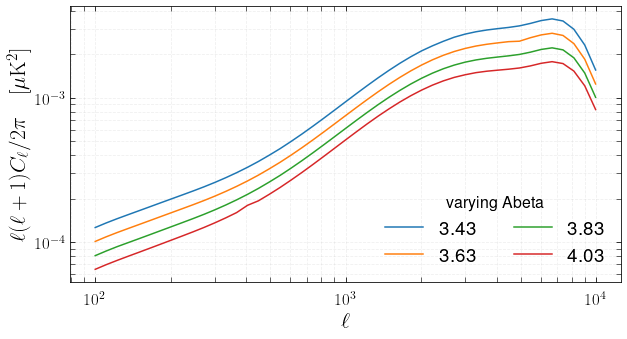

In [206]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_beta'
p_values = [3.43,3.63,3.83,4.03]

for p in p_values:
    strp = str(p)
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_x_rubin_lensing_varying_Abeta_l_dl1h_dl2h_dl3h_dltot_uK2_Abeta_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p))
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=4,
          title=r'varying Abeta')
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
plt.yscale('log')
plt.xscale('log')
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_x_rubin_lensing_varying_beta.pdf')

## SO x unWISE blue

### varying beta

#### compute the plot and save data

In [207]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set(
    {        

'output':'gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',


      })

True

In [208]:
p_name = 'A_beta'
p_values = [3.43,3.63,3.83,4.03]



for p in p_values:
    ti = time.perf_counter()
    M.set({p_name:p})
    M.compute()
    tf = time.perf_counter()
    cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()
    cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
    cl_1h = np.asarray(cl_kSZ2X['1h'])
    cl_2h = np.asarray(cl_kSZ2X['2h'])
    cl_3h = np.asarray(cl_kSZ2X['3h'])
    l = np.asarray(cl_kSZ2X['ell'])
    fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
    strp = str(p)
    np.savetxt(path_to_kSZ2X_2022+'so_x_uwb_varying_Abeta_l_dl1h_dl2h_dl3h_dltot_uK2_Abeta_'+strp.replace(".","p")+'.txt',
              np.c_[l,fac_l*cl_1h,fac_l*cl_2h,fac_l*cl_3h,fac_l*cl_tot])
    print(f"computed in {tf - ti:0.4f} seconds")
    

computed in 56.6657 seconds
computed in 48.6298 seconds
computed in 63.6834 seconds
computed in 61.6564 seconds


#### make the plot

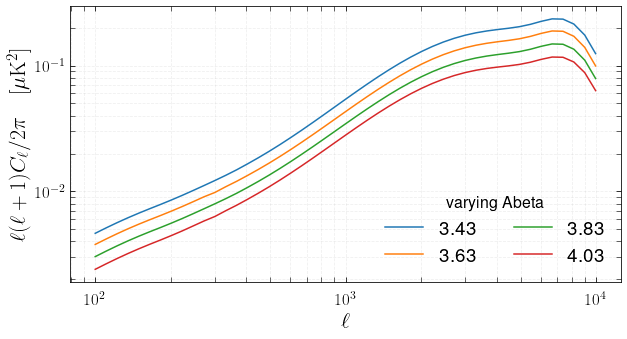

In [209]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_beta'
p_values = [3.43,3.63,3.83,4.03]

for p in p_values:
    strp = str(p)
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_x_uwb_varying_Abeta_l_dl1h_dl2h_dl3h_dltot_uK2_Abeta_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p))
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=4,
          title=r'varying Abeta')
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
plt.yscale('log')
plt.xscale('log')
fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_so_x_uwb_varying_Abeta.pdf')

#### ratio plot

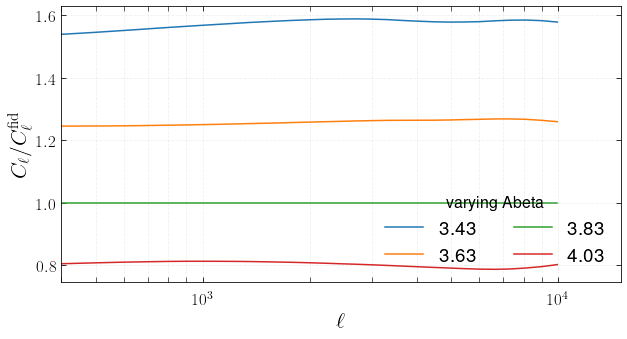

In [7]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
plt.rcParams['text.usetex'] = True
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')


p_name = 'A_beta'
p_values = [3.43,3.63,3.83,4.03]


l,dl_1h_fid,dl_2h_fid,dl_3h_fid,dl_tot_fid = np.loadtxt(path_to_kSZ2X_2022+'so_x_uwb_varying_Abeta_l_dl1h_dl2h_dl3h_dltot_uK2_Abeta_'+'3p83'+'.txt',unpack=True)




for p in p_values:
    strp = str(p)
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_x_uwb_varying_Abeta_l_dl1h_dl2h_dl3h_dltot_uK2_Abeta_'+strp.replace(".","p")+'.txt',unpack=True)

    ax.plot(l,dl_tot/dl_tot_fid,label=str(p))

ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$C_\ell/C_\ell^\mathrm{fid}$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=4,
          title=r'varying Abeta')
# ax.set_ylim(-0.012,0.045)
ax.set_xlim(400,1.5e4)
# plt.yscale('log')
plt.xscale('log')
fig.tight_layout()
# plt.savefig(path_to_kSZ2X_2022+'cls_so_x_uwb_varying_Abeta.pdf')

# Density Profile - truncation

In [ ]:
# test with just the truncation...not working now, tbd asap
M = Class()
#M.set(ksz_params)
#M.set(common_params)
M.set(cosmo_params)


M.set({# class_sz parameters:
       'output':'tabulate_rhob_xout_at_m_and_z',
       'concentration parameter':'B13',
       'gas profile':'B16',
       'gas profile mode' : 'agn',
        })
M.compute()

# chose a mass and redshift for a given halo of interest
# amodeo et al: m = 3e13 Msun at z=0.55 (see Figure 7 of https://arxiv.org/pdf/2009.05558.pdf)
z = 0.55

m200c = 3.3e13*M.h()
xout_calc_agn = M.get_m_to_xout_at_z_and_m(z,m200c)
xout_calc_agn

In [69]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set({# class_sz parameters:
       'output':'m200m_to_m200c,m200c_to_m200m,m200c_to_m500c',
       'concentration parameter':'B13',
       'tabulate_rhob_xout_at_m_and_z': 1,
       'gas profile':'B16',
       'gas profile mode' : 'agn',
        })
M.compute()


def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c

In [70]:
M.h()

0.6766

In [71]:
# chose a mass and redshift for a given halo of interest
# amodeo et al: m = 3e13 Msun at z=0.55 (see Figure 7 of https://arxiv.org/pdf/2009.05558.pdf)
z = 0.55
# m200m = 3e14
# convert to 200c for b16 profile
m200c = 3.3e13*M.h()#M.get_m200m_to_m200c_at_z_and_M(z,m200m)
m200m = M.get_m200c_to_m200m_at_z_and_M(z,m200c)

xout_calc_agn = M.get_m_to_xout_at_z_and_m(z,m200c)
xout_calc_agn

1.7522448977772909

In [119]:
# chose a mass and redshift for a given halo of interest
# amodeo et al: m = 3e13 Msun/h at z=0.55
z = 0.25
# m200m = 3e14
# convert to 200c for b16 profile
m200c = 4.3e13*M.h()#M.get_m200m_to_m200c_at_z_and_M(z,m200m)
m200m = M.get_m200c_to_m200m_at_z_and_M(z,m200c)

xout_calc_agn = M.get_m_to_xout_at_z_and_m(z,m200c)
xout_calc_agn

1.6407686917614546

In [21]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set({# class_sz parameters:
       'output':'m200m_to_m200c,m200c_to_m200m,m200c_to_m500c',
       'concentration parameter':'B13',
       'tabulate_rhob_xout_at_m_and_z': 1,
       'gas profile':'B16',
       'gas profile mode' : 'shock',
        })
M.compute()


def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c

In [22]:
M.h()

0.6766

In [23]:
# chose a mass and redshift for a given halo of interest
# amodeo et al: m = 3e13 Msun/h at z=0.55
z = 0.55
# m200m = 3e14
# convert to 200c for b16 profile
m200c = 3.3e13*M.h()#M.get_m200m_to_m200c_at_z_and_M(z,m200m)
m200m = M.get_m200c_to_m200m_at_z_and_M(z,m200c)

xout_calc_adiabatic = M.get_m_to_xout_at_z_and_m(z,m200c)
xout_calc_adiabatic

1.1921114775344956

In [13]:

    

M.set({
# class_sz parameters:
'output':'m200m_to_m200c,m200c_to_m200m,m200c_to_m500c',

'tabulate_rhob_xout_at_m_and_z': 1,
'gas profile':'B16',
'gas profile mode' : 'custom',
    
# Amodeo et al profile setup:
"A_rho0": 10**2.8,
"A_alpha": 1.,
"A_beta": 2.6,

"alpha_m_rho0": 0.,
"alpha_m_alpha": 0.,
"alpha_m_beta": 0.,

"alpha_z_rho0": 0.,
"alpha_z_alpha": 0.,
"alpha_z_bet": 0.,
"gamma_B16": -0.2,
"xc_B16": 0.6,
        })
M.compute()

In [14]:
# chose a mass and redshift for a given halo of interest
# amodeo et al: m = 3e13 Msun/h at z=0.55
z = 0.55
# m200m = 3e14
# convert to 200c for b16 profile
m200c = 3.3e13*M.h()#M.get_m200m_to_m200c_at_z_and_M(z,m200m)
m200m = M.get_m200c_to_m200m_at_z_and_M(z,m200c)

xout_calc_amodeo = M.get_m_to_xout_at_z_and_m(z,m200c)
xout_calc_amodeo

1.5794467629231161

In [8]:
lambda_min = 0.1
lambda_max = 200
n_lambda = 500
lambda_array = np.geomspace(lambda_min,lambda_max,n_lambda)

# store the radial profiles of the gas
rho_gas_nfw = np.vectorize(M.get_gas_profile_at_x_M_z_nfw_200c)
rho_gas_b16 = np.vectorize(M.get_gas_profile_at_x_M_z_b16_200c)

# normalized radial array for b16:
x_200c = lambda_array

# dimensonfull radial array:
r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)
r = x_200c*r200c
theta_arcmin = M.get_rad_to_arcmin(r/M.get_dA(z))

# normalized radial array for nfw:
r200m = M.get_r_delta_of_m_delta_at_z(200*M.Om_m(z),m200m,z)
c200m = M.get_c200m_at_m_and_z_D08(m200m,z)
c200c = M.get_c200c_at_m_and_z_D08(m200c,z)
rs_200m = r200m/c200m
xs_200m =  r/rs_200m
rs_200c = r200c/c200c
xs_200c=  r/rs_200c
# mass of b16 within \lambda*r_200c : M_b16(\lambda)
def M_b16(lambda_out,
          A_rho0=4.e3,
          A_alpha = 0.88,
          A_beta = 3.83,
          alpha_m_rho0 = 0.29,
          alpha_m_alpha = -0.03,
          alpha_m_beta = 0.04,
          alpha_z_rho0 = -0.66,
          alpha_z_alpha = 0.19,
          alpha_z_beta = -0.025,
          gamma = -0.2,
          xc = 0.5):
    #lambda_out = rout/r200c
    x_array = np.linspace(1e-8,lambda_out,1000)
    y = rho_gas_b16(x_array,m200c,z,
                    A_rho0=A_rho0,
                    A_alpha=A_alpha,
                    A_beta=A_beta,
                    alpha_m_rho0 = alpha_m_rho0,
                    alpha_m_alpha = alpha_m_alpha,
                    alpha_m_beta = alpha_m_beta,
                    alpha_z_rho0 = alpha_z_rho0,
                    alpha_z_alpha = alpha_z_alpha,
                    alpha_z_beta = alpha_z_beta,
                    gamma=gamma,
                    xc = xc)*x_array**2#/M.get_f_b()
    mass = 4.*np.pi*r200c**3*np.trapz(y,x=x_array)
    return mass
M_b16 = np.vectorize(M_b16) 

# def f_nfw(c):
#     return (np.log(1.+c)-c/(1.+c))**-1.

# def rho_nfw(x,z):
#     rhoc = M.get_rho_crit_at_z(z)
#     rhos = 1./3.*200.*rhoc*c200c*3.*f_nfw(200.)
#     return rhos*1./x*1./(1.+x)**2.

# mass of nfw within \lambda*r_200c : M_nfw(\lambda)
def M_nfw(lambda_out):
    #lambda_out = rout/r200c
    rout = lambda_out*r200c
    lambda_out_200c = rout/rs_200c
    x_array = np.linspace(1e-8,lambda_out_200c,1000)
    y = rho_gas_nfw(x_array,m200c,z)*x_array**2
#     y = 
    mass = 4.*np.pi*rs_200c**3*np.trapz(y,x=x_array)#/M.get_f_b()
    return mass
M_nfw = np.vectorize(M_nfw) 
    

def A_rho0_norm(A_rho0=1.,
                A_alpha = 0.88,
                A_beta = 3.83,
                alpha_m_rho0 = 0.29,
                alpha_m_alpha = -0.03,
                alpha_m_beta = 0.04,
                alpha_z_rho0 = -0.66,
                alpha_z_alpha = 0.19,
                alpha_z_beta = -0.025,
                gamma = -0.2,
                xc = 0.5):
    return M_nfw(1.)/M_b16(1.,A_rho0=1.,
                              A_alpha=A_alpha,
                              A_beta=A_beta,
                              alpha_m_rho0 = alpha_m_rho0,
                              alpha_m_alpha = alpha_m_alpha,
                              alpha_m_beta = alpha_m_beta,
                              alpha_z_rho0 = alpha_z_rho0,
                              alpha_z_alpha = alpha_z_alpha,
                              alpha_z_beta = alpha_z_beta,
                              gamma=gamma,
                              xc = xc)

In [9]:
# check recovered mass and some other stuff:
"%.5e"%(M_nfw(1.)/M.get_f_b())
print('%.3e'%(np.asarray(m200c)/M_nfw(1.)))
print('%.3e'%m200c)
print('%.3e'%r200c)
print('%.3e'%r200m)

6.351e+00
2.233e+13
3.732e-01
4.597e-01


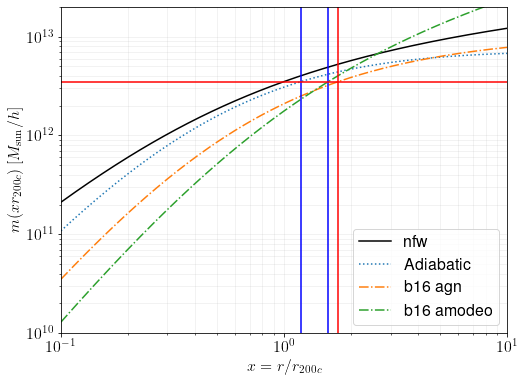

In [27]:



# normalization of b16 such that b16 and nfw have same mass within 1*r200c:
plt.plot(lambda_array,M_nfw(lambda_array),label='nfw',c='k')
rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.







# nfw like
A_rho0=10.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c
# plt.plot(lambda_array,M_b16(lambda_array,
#                             A_rho0=A_rho0_norm(A_rho0=A_rho0,
#                                                A_alpha=A_alpha,
#                                                A_beta=A_beta,
#                                                alpha_m_rho0 = alpha_m_rho0,
#                                                alpha_m_alpha = alpha_m_alpha,
#                                                alpha_m_beta = alpha_m_beta,
#                                                alpha_z_rho0 = alpha_z_rho0,
#                                                alpha_z_alpha = alpha_z_alpha,
#                                                alpha_z_beta = alpha_z_beta,
#                                                gamma = gamma,
#                                                xc = xc
#                                                ),
#                             A_alpha=A_alpha,
#                             A_beta=A_beta,
#                             alpha_m_rho0 = alpha_m_rho0,
#                             alpha_m_alpha = alpha_m_alpha,
#                             alpha_m_beta = alpha_m_beta,
#                             alpha_z_rho0 = alpha_z_rho0,
#                             alpha_z_alpha = alpha_z_alpha,
#                             alpha_z_beta = alpha_z_beta,
#                             gamma=gamma,
#                             xc = xc
#                            ),
#          label='b16 nfw-like',ls='--')



# Battaglia et al adiabatic
A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

plt.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0,
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc),
         
         label = r'Adiabatic',ls=':')





# Battaglia et al AGN profile 
A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5
plt.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0,
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='b16 agn',ls='-.')

# Amodeo et al profile 
A_rho0 = 10**2.8
A_alpha = 1.
A_beta = 2.6

alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.

alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -0.2
xc = 0.6


plt.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0,
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='b16 amodeo',ls='-.')

plt.axvline(xout_calc_agn,c='r')
plt.axvline(xout_calc_amodeo,c='b')
plt.axvline(xout_calc_adiabatic,c='b')
plt.axhline(M_nfw(1.),c='r')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$m(x r_{200c})$   $[M_\mathrm{sun}/h]$')
plt.xlabel(r'$x=r/r_{200c}$')
plt.legend()
plt.xlim(1e-1,10)
plt.ylim(1e10,2e13)
plt.grid(which='both',alpha=0.2)

# Density Profile - radial

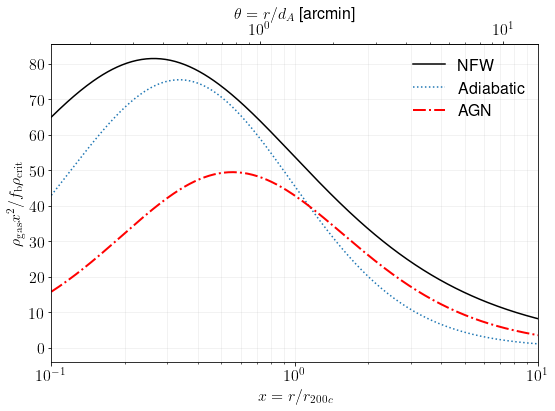

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


rho_norm_nfw = rho_gas_nfw(xs_200c,m200c,z)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_nfw*x_200c**2,label = 'NFW',c='k')


rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.
A_rho0 = 1.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c

# # gammas = [-0.1,-0.2,-0.3]
# gammas = [-1.]

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
# ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 NFW-like',ls='--')


A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0 = A_rho0,
#                            A_rho0=A_rho0_norm(
#                                             A_rho0=A_rho0,
#                                             A_alpha=A_alpha,
#                                             A_beta=A_beta,
#                                             alpha_m_rho0 = alpha_m_rho0,
#                                             alpha_m_alpha = alpha_m_alpha,
#                                             alpha_m_beta = alpha_m_beta,
#                                             alpha_z_rho0 = alpha_z_rho0,
#                                             alpha_z_alpha = alpha_z_alpha,
#                                             alpha_z_beta = alpha_z_beta,
#                                             gamma=gamma,
#                                             xc = xc
#                                              ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'Adiabatic',ls=':')




A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                            A_rho0 = A_rho0,
#                            A_rho0=A_rho0_norm(
#                                             A_rho0=A_rho0,
#                                             A_alpha=A_alpha,
#                                             A_beta=A_beta,
#                                             alpha_m_rho0 = alpha_m_rho0,
#                                             alpha_m_alpha = alpha_m_alpha,
#                                             alpha_m_beta = alpha_m_beta,
#                                             alpha_z_rho0 = alpha_z_rho0,
#                                             alpha_z_alpha = alpha_z_alpha,
#                                             alpha_z_beta = alpha_z_beta,
#                                             gamma=gamma,
#                                             xc = xc
#                                              ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'AGN',ls='-.',c='r',lw=2.)




ax1.set_xscale('log')
ax1.legend(frameon=False)
ax1.set_xlabel(r'$x=r/r_{200c}$')
ax1.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$')

plt.grid(which='both',alpha=0.2)
secax = ax1.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ [arcmin]')
# ax1.set_ylim(1e1,1e2)
ax1.set_xlim(1e-1,1e1)

fig.tight_layout()
# plt.savefig(path_to_kSZ2X_2022+'prof_comp.pdf')



## density profile plot with Amodeo et al profile

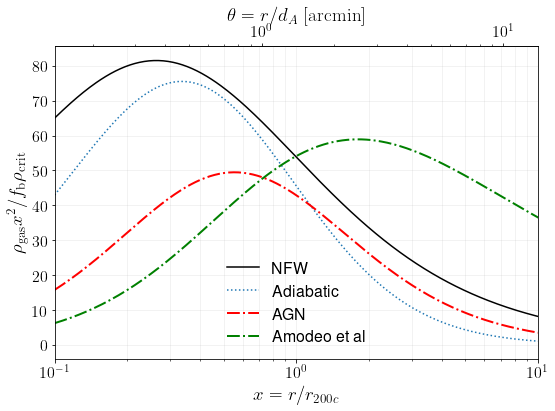

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


rho_norm_nfw = rho_gas_nfw(xs_200c,m200c,z)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_nfw*x_200c**2,label = 'NFW',c='k')


rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.
A_rho0 = 1.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c

# # gammas = [-0.1,-0.2,-0.3]
# gammas = [-1.]

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
# ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 NFW-like',ls='--')


A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0 = A_rho0,
#                            A_rho0=A_rho0_norm(
#                                             A_rho0=A_rho0,
#                                             A_alpha=A_alpha,
#                                             A_beta=A_beta,
#                                             alpha_m_rho0 = alpha_m_rho0,
#                                             alpha_m_alpha = alpha_m_alpha,
#                                             alpha_m_beta = alpha_m_beta,
#                                             alpha_z_rho0 = alpha_z_rho0,
#                                             alpha_z_alpha = alpha_z_alpha,
#                                             alpha_z_beta = alpha_z_beta,
#                                             gamma=gamma,
#                                             xc = xc
#                                              ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'Adiabatic',ls=':')




A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                            A_rho0 = A_rho0,
#                            A_rho0=A_rho0_norm(
#                                             A_rho0=A_rho0,
#                                             A_alpha=A_alpha,
#                                             A_beta=A_beta,
#                                             alpha_m_rho0 = alpha_m_rho0,
#                                             alpha_m_alpha = alpha_m_alpha,
#                                             alpha_m_beta = alpha_m_beta,
#                                             alpha_z_rho0 = alpha_z_rho0,
#                                             alpha_z_alpha = alpha_z_alpha,
#                                             alpha_z_beta = alpha_z_beta,
#                                             gamma=gamma,
#                                             xc = xc
#                                              ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'AGN',ls='-.',c='r',lw=2.)




A_rho0 = 10**2.8
A_alpha = 1.
A_beta = 2.6

alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.

alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -0.2
xc = 0.6

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                            A_rho0 = A_rho0,
#                            A_rho0=A_rho0_norm(
#                                             A_rho0=A_rho0,
#                                             A_alpha=A_alpha,
#                                             A_beta=A_beta,
#                                             alpha_m_rho0 = alpha_m_rho0,
#                                             alpha_m_alpha = alpha_m_alpha,
#                                             alpha_m_beta = alpha_m_beta,
#                                             alpha_z_rho0 = alpha_z_rho0,
#                                             alpha_z_alpha = alpha_z_alpha,
#                                             alpha_z_beta = alpha_z_beta,
#                                             gamma=gamma,
#                                             xc = xc
#                                              ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'Amodeo et al',ls='-.',c='green',lw=2.)





ax1.set_xscale('log')
ax1.legend(frameon=False)
ax1.set_xlabel(r'$x=r/r_{200c}$',fontsize = 19)
ax1.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$',fontsize = 19)

plt.grid(which='both',alpha=0.2)
secax = ax1.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ $\mathrm{[arcmin]}$',fontsize = 19)
# ax1.set_ylim(1e1,1e2)
ax1.set_xlim(1e-1,1e1)

fig.tight_layout()
# plt.savefig(path_to_kSZ2X_2022+'prof_comp.pdf')




## Truncation + Radial plot

In [9]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set({# class_sz parameters:
       'output':'m200m_to_m200c,m200c_to_m200m,m200c_to_m500c',
       'concentration parameter':'B13',
       'tabulate_rhob_xout_at_m_and_z': 1,
       'gas profile':'B16',
       'gas profile mode' : 'agn',
        })
M.compute()


## some quantities used after:
lambda_min = 0.1
lambda_max = 200
n_lambda = 500
lambda_array = np.geomspace(lambda_min,lambda_max,n_lambda)
# chose a mass and redshift for a given halo of interest
# amodeo et al: m = 3e13 Msun/h at z=0.55
z = 0.55
# m200m = 3e14
# convert to 200c for b16 profile
m200c = 3.3e13*M.h()#M.get_m200m_to_m200c_at_z_and_M(z,m200m)
# dimensonfull radial array:
r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)

# normalized radial array for b16:
x_200c = lambda_array
r = x_200c*r200c
theta_arcmin = M.get_rad_to_arcmin(r/M.get_dA(z))

# normalized radial array for nfw:
# r200m = M.get_r_delta_of_m_delta_at_z(200*M.Om_m(z),m200m,z)
# c200m = M.get_c200m_at_m_and_z_D08(m200m,z)
c200c = M.get_c200c_at_m_and_z_B13(m200c,z)
# rs_200m = r200m/c200m
# xs_200m =  r/rs_200m
rs_200c = r200c/c200c
xs_200c=  r/rs_200c



xout_calc_agn = M.get_m_to_xout_at_z_and_m(z,m200c)
print(xout_calc_agn)


M.set({# class_sz parameters:
       'gas profile':'B16',
       'gas profile mode' : 'shock',
        })
M.compute()

xout_calc_adiabatic = M.get_m_to_xout_at_z_and_m(z,m200c)
print(xout_calc_adiabatic)


M.set({
'gas profile':'B16',
'gas profile mode' : 'custom',
    
# Amodeo et al profile setup:
"A_rho0": 10**2.8,
"A_alpha": 1.,
"A_beta": 2.6,

"alpha_m_rho0": 0.,
"alpha_m_alpha": 0.,
"alpha_m_beta": 0.,

"alpha_z_rho0": 0.,
"alpha_z_alpha": 0.,
"alpha_z_bet": 0.,
"gamma_B16": -0.2,
"xc_B16": 0.6,
        })
M.compute()

xout_calc_amodeo = M.get_m_to_xout_at_z_and_m(z,m200c)
print(xout_calc_amodeo)

1.7522448977772909
1.1921114775344956
1.5794467629231161


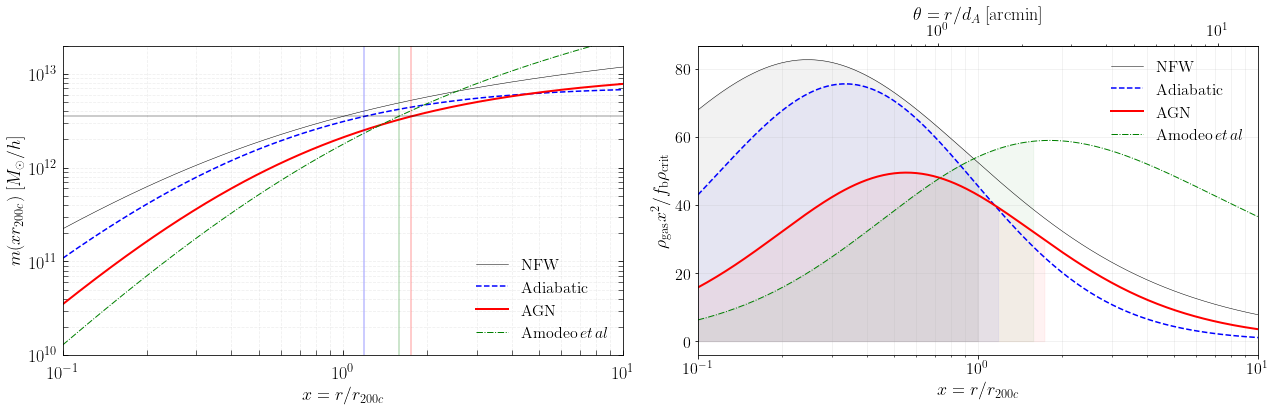

In [27]:
def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c


# dimensonfull radial array:
# r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)


# store the radial profiles of the gas
rho_gas_nfw = np.vectorize(M.get_gas_profile_at_x_M_z_nfw_200c)
rho_gas_b16 = np.vectorize(M.get_gas_profile_at_x_M_z_b16_200c)




label_size = 18
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# mass of b16 within \lambda*r_200c : M_b16(\lambda)
def M_b16(lambda_out,
          A_rho0=4.e3,
          A_alpha = 0.88,
          A_beta = 3.83,
          alpha_m_rho0 = 0.29,
          alpha_m_alpha = -0.03,
          alpha_m_beta = 0.04,
          alpha_z_rho0 = -0.66,
          alpha_z_alpha = 0.19,
          alpha_z_beta = -0.025,
          gamma = -0.2,
          xc = 0.5):
    #lambda_out = rout/r200c
    x_array = np.linspace(1e-8,lambda_out,1000)
    y = rho_gas_b16(x_array,m200c,z,
                    A_rho0=A_rho0,
                    A_alpha=A_alpha,
                    A_beta=A_beta,
                    alpha_m_rho0 = alpha_m_rho0,
                    alpha_m_alpha = alpha_m_alpha,
                    alpha_m_beta = alpha_m_beta,
                    alpha_z_rho0 = alpha_z_rho0,
                    alpha_z_alpha = alpha_z_alpha,
                    alpha_z_beta = alpha_z_beta,
                    gamma=gamma,
                    xc = xc)*x_array**2#/M.get_f_b()
    mass = 4.*np.pi*r200c**3*np.trapz(y,x=x_array)
    return mass
M_b16 = np.vectorize(M_b16) 



# mass of nfw within \lambda*r_200c : M_nfw(\lambda)
def M_nfw(lambda_out):
    #lambda_out = rout/r200c
    rout = lambda_out*r200c
    lambda_out_200c = rout/rs_200c
    x_array = np.linspace(1e-8,lambda_out_200c,1000)
    y = rho_gas_nfw(x_array,m200c,z)*x_array**2
#     y = 
    mass = 4.*np.pi*rs_200c**3*np.trapz(y,x=x_array)#/M.get_f_b()
    return mass
M_nfw = np.vectorize(M_nfw) 



# normalization of b16 such that b16 and nfw have same mass within 1*r200c:
ax.plot(lambda_array,M_nfw(lambda_array),label=r'$\mathrm{NFW}$',c='k',lw=0.5)




# Battaglia et al adiabatic
A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

ax.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0,
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc),
         
         label = r'$\mathrm{Adiabatic}$',ls='--',c='blue')





# Battaglia et al AGN profile 
A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5
ax.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0,
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label=r'$\mathrm{AGN}$',ls='-',lw=2,c='r')

# Amodeo et al profile 
A_rho0 = 10**2.8
A_alpha = 1.
A_beta = 2.6

alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.

alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -0.2
xc = 0.6


ax.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0,
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label=r'$\mathrm{Amodeo}\,et\,al$',ls='-.',c='green',lw=1)

ax.axvline(xout_calc_agn,c='r',lw=0.4)
ax.axvline(xout_calc_amodeo,c='green',lw=0.4)
ax.axvline(xout_calc_adiabatic,c='b',lw=0.4)
ax.axhline(M_nfw(1.),c='k',lw=0.4)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$m(x r_{200c})$   $[M_\odot/h]$',fontsize=label_size)
ax.set_xlabel(r'$x=r/r_{200c}$',fontsize=label_size)
ax.legend(frameon=False)
ax.set_xlim(1e-1,10)
ax.set_ylim(1e10,2e13)



ax = ax2






rho_norm_nfw = rho_gas_nfw(xs_200c,m200c,z)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_nfw*x_200c**2,label = r'$\mathrm{NFW}$',c='k',lw=0.5)
t = x_200c
ft = rho_norm_nfw*x_200c**2
plt.fill_between(
        x= t, 
        y1= ft, 
        where= (-1 < t)&(t < 1.),
        color= "k",
        alpha= 0.05)


A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0 = A_rho0,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'$\mathrm{Adiabatic}$',ls='--',c='blue')


t = x_200c
ft = rho_norm_b16*x_200c**2
plt.fill_between(
        x= t, 
        y1= ft, 
        where= (-1 < t)&(t < xout_calc_adiabatic),
        color= "blue",
        alpha= 0.05)

A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                            A_rho0 = A_rho0,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'$\mathrm{AGN}$',ls='-',c='r',lw=2.)

t = x_200c
ft = rho_norm_b16*x_200c**2
plt.fill_between(
        x= t, 
        y1= ft, 
        where= (-1 < t)&(t < xout_calc_agn),
        color= "red",
        alpha= 0.05)


A_rho0 = 10**2.8
A_alpha = 1.
A_beta = 2.6

alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.

alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -0.2
xc = 0.6

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                            A_rho0 = A_rho0,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'$\mathrm{Amodeo}\,et\,al$',ls='-.',c='green',lw=1.)



t = x_200c
ft = rho_norm_b16*x_200c**2
plt.fill_between(
        x= t, 
        y1= ft, 
        where= (-1 < t)&(t < xout_calc_amodeo),
        color= "green",
        alpha= 0.05)



ax.set_xscale('log')
ax.legend(frameon=False)
ax.set_xlabel(r'$x=r/r_{200c}$',fontsize = label_size)
ax.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$',fontsize = label_size)

plt.grid(which='both',alpha=0.2)
secax = ax.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ $\mathrm{[arcmin]}$',fontsize = label_size)
ax.set_xlim(1e-1,1e1)

fig.tight_layout()

plt.savefig(path_to_kSZ2X_2022+'prof_comp_truncation.pdf')






## Truncation + Radial plot no amodeo

In [82]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set({# class_sz parameters:
       'output':'m200m_to_m200c,m200c_to_m200m,m200c_to_m500c',
       'concentration parameter':'B13',
       'tabulate_rhob_xout_at_m_and_z': 1,
       'gas profile':'B16',
       'gas profile mode' : 'agn',
        })
M.compute()


## some quantities used after:
lambda_min = 0.1
lambda_max = 200
n_lambda = 500
lambda_array = np.geomspace(lambda_min,lambda_max,n_lambda)
# chose a mass and redshift for a given halo of interest
# amodeo et al: m = 3e13 Msun/h at z=0.55
z = 0.55
# m200m = 3e14
# convert to 200c for b16 profile
m200c = 3.3e13*M.h()#M.get_m200m_to_m200c_at_z_and_M(z,m200m)
# dimensonfull radial array:
r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)

# normalized radial array for b16:
x_200c = lambda_array
r = x_200c*r200c
theta_arcmin = M.get_rad_to_arcmin(r/M.get_dA(z))

# normalized radial array for nfw:
# r200m = M.get_r_delta_of_m_delta_at_z(200*M.Om_m(z),m200m,z)
# c200m = M.get_c200m_at_m_and_z_D08(m200m,z)
c200c = M.get_c200c_at_m_and_z_B13(m200c,z)
# rs_200m = r200m/c200m
# xs_200m =  r/rs_200m
rs_200c = r200c/c200c
xs_200c=  r/rs_200c



xout_calc_agn = M.get_m_to_xout_at_z_and_m(z,m200c)
print(xout_calc_agn)


M.set({# class_sz parameters:
       'gas profile':'B16',
       'gas profile mode' : 'shock',
        })
M.compute()

xout_calc_adiabatic = M.get_m_to_xout_at_z_and_m(z,m200c)
print(xout_calc_adiabatic)


M.set({
'gas profile':'B16',
'gas profile mode' : 'custom',
    
# Amodeo et al profile setup:
"A_rho0": 10**2.8,
"A_alpha": 1.,
"A_beta": 2.6,

"alpha_m_rho0": 0.,
"alpha_m_alpha": 0.,
"alpha_m_beta": 0.,

"alpha_z_rho0": 0.,
"alpha_z_alpha": 0.,
"alpha_z_bet": 0.,
"gamma_B16": -0.2,
"xc_B16": 0.6,
        })
M.compute()

xout_calc_amodeo = M.get_m_to_xout_at_z_and_m(z,m200c)
print(xout_calc_amodeo)

1.7522448977772909
1.1921114775344956
1.5794467629231161


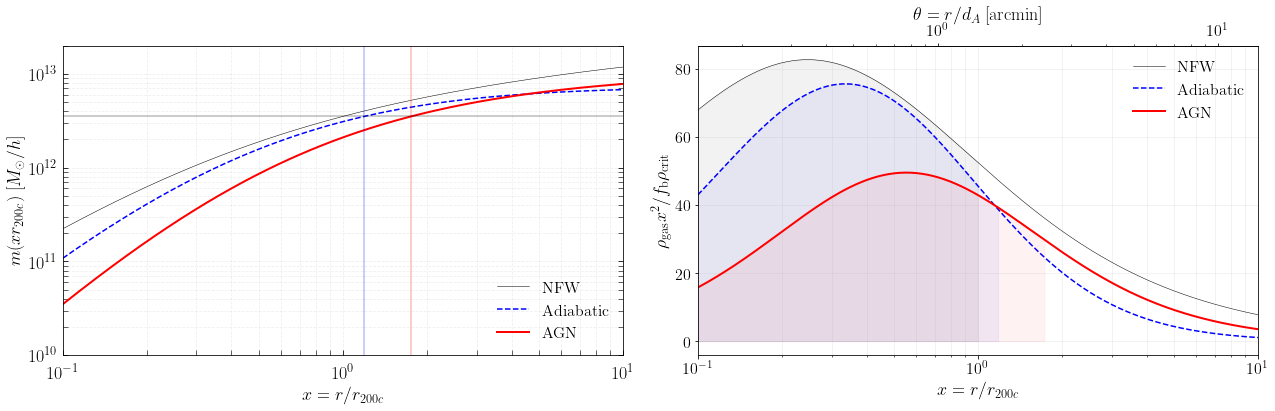

In [84]:
def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c


# dimensonfull radial array:
# r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)


# store the radial profiles of the gas
rho_gas_nfw = np.vectorize(M.get_gas_profile_at_x_M_z_nfw_200c)
rho_gas_b16 = np.vectorize(M.get_gas_profile_at_x_M_z_b16_200c)




label_size = 18
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# mass of b16 within \lambda*r_200c : M_b16(\lambda)
def M_b16(lambda_out,
          A_rho0=4.e3,
          A_alpha = 0.88,
          A_beta = 3.83,
          alpha_m_rho0 = 0.29,
          alpha_m_alpha = -0.03,
          alpha_m_beta = 0.04,
          alpha_z_rho0 = -0.66,
          alpha_z_alpha = 0.19,
          alpha_z_beta = -0.025,
          gamma = -0.2,
          xc = 0.5):
    #lambda_out = rout/r200c
    x_array = np.linspace(1e-8,lambda_out,1000)
    y = rho_gas_b16(x_array,m200c,z,
                    A_rho0=A_rho0,
                    A_alpha=A_alpha,
                    A_beta=A_beta,
                    alpha_m_rho0 = alpha_m_rho0,
                    alpha_m_alpha = alpha_m_alpha,
                    alpha_m_beta = alpha_m_beta,
                    alpha_z_rho0 = alpha_z_rho0,
                    alpha_z_alpha = alpha_z_alpha,
                    alpha_z_beta = alpha_z_beta,
                    gamma=gamma,
                    xc = xc)*x_array**2#/M.get_f_b()
    mass = 4.*np.pi*r200c**3*np.trapz(y,x=x_array)
    return mass
M_b16 = np.vectorize(M_b16) 



# mass of nfw within \lambda*r_200c : M_nfw(\lambda)
def M_nfw(lambda_out):
    #lambda_out = rout/r200c
    rout = lambda_out*r200c
    lambda_out_200c = rout/rs_200c
    x_array = np.linspace(1e-8,lambda_out_200c,1000)
    y = rho_gas_nfw(x_array,m200c,z)*x_array**2
#     y = 
    mass = 4.*np.pi*rs_200c**3*np.trapz(y,x=x_array)#/M.get_f_b()
    return mass
M_nfw = np.vectorize(M_nfw) 



# normalization of b16 such that b16 and nfw have same mass within 1*r200c:
ax.plot(lambda_array,M_nfw(lambda_array),label=r'$\mathrm{NFW}$',c='k',lw=0.5)




# Battaglia et al adiabatic
A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

ax.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0,
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc),
         
         label = r'$\mathrm{Adiabatic}$',ls='--',c='blue')





# Battaglia et al AGN profile 
A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5
ax.plot(lambda_array,M_b16(lambda_array,
                            A_rho0=A_rho0,
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label=r'$\mathrm{AGN}$',ls='-',lw=2,c='r')

# Amodeo et al profile 
A_rho0 = 10**2.8
A_alpha = 1.
A_beta = 2.6

alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.

alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -0.2
xc = 0.6


# ax.plot(lambda_array,M_b16(lambda_array,
#                             A_rho0=A_rho0,
#                             A_alpha=A_alpha,
#                             A_beta=A_beta,
#                             alpha_m_rho0 = alpha_m_rho0,
#                             alpha_m_alpha = alpha_m_alpha,
#                             alpha_m_beta = alpha_m_beta,
#                             alpha_z_rho0 = alpha_z_rho0,
#                             alpha_z_alpha = alpha_z_alpha,
#                             alpha_z_beta = alpha_z_beta,
#                             gamma=gamma,
#                             xc = xc
#                            ),
#          label=r'$\mathrm{Amodeo}\,et\,al$',ls='-.',c='green',lw=1)

ax.axvline(xout_calc_agn,c='r',lw=0.4)
# ax.axvline(xout_calc_amodeo,c='green',lw=0.4)
ax.axvline(xout_calc_adiabatic,c='b',lw=0.4)
ax.axhline(M_nfw(1.),c='k',lw=0.4)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$m(x r_{200c})$   $[M_\odot/h]$',fontsize=label_size)
ax.set_xlabel(r'$x=r/r_{200c}$',fontsize=label_size)
ax.legend(frameon=False)
ax.set_xlim(1e-1,10)
ax.set_ylim(1e10,2e13)



ax = ax2






rho_norm_nfw = rho_gas_nfw(xs_200c,m200c,z)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_nfw*x_200c**2,label = r'$\mathrm{NFW}$',c='k',lw=0.5)
t = x_200c
ft = rho_norm_nfw*x_200c**2
plt.fill_between(
        x= t, 
        y1= ft, 
        where= (-1 < t)&(t < 1.),
        color= "k",
        alpha= 0.05)


A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0 = A_rho0,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'$\mathrm{Adiabatic}$',ls='--',c='blue')


t = x_200c
ft = rho_norm_b16*x_200c**2
plt.fill_between(
        x= t, 
        y1= ft, 
        where= (-1 < t)&(t < xout_calc_adiabatic),
        color= "blue",
        alpha= 0.05)

A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                            A_rho0 = A_rho0,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'$\mathrm{AGN}$',ls='-',c='r',lw=2.)

t = x_200c
ft = rho_norm_b16*x_200c**2
plt.fill_between(
        x= t, 
        y1= ft, 
        where= (-1 < t)&(t < xout_calc_agn),
        color= "red",
        alpha= 0.05)


A_rho0 = 10**2.8
A_alpha = 1.
A_beta = 2.6

alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.

alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -0.2
xc = 0.6

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                            A_rho0 = A_rho0,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
# ax.plot(x_200c,rho_norm_b16*x_200c**2, label = r'$\mathrm{Amodeo}\,et\,al$',ls='-.',c='green',lw=1.)



# t = x_200c
# ft = rho_norm_b16*x_200c**2
# plt.fill_between(
#         x= t, 
#         y1= ft, 
#         where= (-1 < t)&(t < xout_calc_amodeo),
#         color= "green",
#         alpha= 0.05)



ax.set_xscale('log')
ax.legend(frameon=False)
ax.set_xlabel(r'$x=r/r_{200c}$',fontsize = label_size)
ax.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$',fontsize = label_size)

plt.grid(which='both',alpha=0.2)
secax = ax.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ $\mathrm{[arcmin]}$',fontsize = label_size)
ax.set_xlim(1e-1,1e1)

fig.tight_layout()

plt.savefig(path_to_kSZ2X_2022+'prof_comp_truncation_noamodeo.pdf')






## Comparing with Amodeo et al Paper

Note we are not including 2-halo term here. 

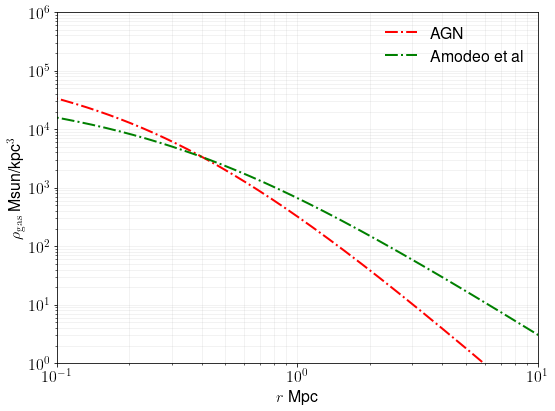

In [97]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


rho_norm_nfw = rho_gas_nfw(xs_200c,m200c,z)#/M.get_rho_crit_at_z(z)/M.get_f_b()
# ax1.plot(x_200c*r200c/M.h(),rho_norm_nfw*x_200c**0/M.h()*(1e3/M.h())**-3,label = 'NFW',c='k')


rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.
A_rho0 = 1.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c

# # gammas = [-0.1,-0.2,-0.3]
# gammas = [-1.]

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0=A_rho0_norm(
                                            A_rho0=A_rho0,
                                            A_alpha=A_alpha,
                                            A_beta=A_beta,
                                            alpha_m_rho0 = alpha_m_rho0,
                                            alpha_m_alpha = alpha_m_alpha,
                                            alpha_m_beta = alpha_m_beta,
                                            alpha_z_rho0 = alpha_z_rho0,
                                            alpha_z_alpha = alpha_z_alpha,
                                            alpha_z_beta = alpha_z_beta,
                                            gamma=gamma,
                                            xc = xc
                                             ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)#/M.get_rho_crit_at_z(z)/M.get_f_b()
# ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = r'B16 NFW-like',ls='--')


A_rho0 = 1.9e4
A_alpha = 0.70
A_beta = 4.43

alpha_m_rho0 = 0.09
alpha_m_alpha = -0.017
alpha_m_beta = 0.005

alpha_z_rho0 = -0.95
alpha_z_alpha = 0.27
alpha_z_beta = 0.037
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                           A_rho0 = A_rho0,
#                            A_rho0=A_rho0_norm(
#                                             A_rho0=A_rho0,
#                                             A_alpha=A_alpha,
#                                             A_beta=A_beta,
#                                             alpha_m_rho0 = alpha_m_rho0,
#                                             alpha_m_alpha = alpha_m_alpha,
#                                             alpha_m_beta = alpha_m_beta,
#                                             alpha_z_rho0 = alpha_z_rho0,
#                                             alpha_z_alpha = alpha_z_alpha,
#                                             alpha_z_beta = alpha_z_beta,
#                                             gamma=gamma,
#                                             xc = xc
#                                              ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)#/M.get_rho_crit_at_z(z)/M.get_f_b()
# ax1.plot(x_200c*r200c/M.h(),rho_norm_b16*x_200c**0/M.h()*(1e3/M.h())**-3, label = r'Adiabatic',ls=':')




A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                            A_rho0 = A_rho0,
#                            A_rho0=A_rho0_norm(
#                                             A_rho0=A_rho0,
#                                             A_alpha=A_alpha,
#                                             A_beta=A_beta,
#                                             alpha_m_rho0 = alpha_m_rho0,
#                                             alpha_m_alpha = alpha_m_alpha,
#                                             alpha_m_beta = alpha_m_beta,
#                                             alpha_z_rho0 = alpha_z_rho0,
#                                             alpha_z_alpha = alpha_z_alpha,
#                                             alpha_z_beta = alpha_z_beta,
#                                             gamma=gamma,
#                                             xc = xc
#                                              ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)#/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c*r200c/M.h(),rho_norm_b16*x_200c**0/M.h()*(1e3/M.h())**-3, label = r'AGN',ls='-.',c='r',lw=2.)




A_rho0 = 10**2.8
A_alpha = 1.
A_beta = 2.6

alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.

alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -0.2
xc = 0.6

rho_norm_b16 = rho_gas_b16(x_200c,
                           m200c,
                           z,
                            A_rho0 = A_rho0,
#                            A_rho0=A_rho0_norm(
#                                             A_rho0=A_rho0,
#                                             A_alpha=A_alpha,
#                                             A_beta=A_beta,
#                                             alpha_m_rho0 = alpha_m_rho0,
#                                             alpha_m_alpha = alpha_m_alpha,
#                                             alpha_m_beta = alpha_m_beta,
#                                             alpha_z_rho0 = alpha_z_rho0,
#                                             alpha_z_alpha = alpha_z_alpha,
#                                             alpha_z_beta = alpha_z_beta,
#                                             gamma=gamma,
#                                             xc = xc
#                                              ),
#                                 A_rho0=rhos_over_rhocz,
                            A_alpha = A_alpha,
                            A_beta = A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc)#/M.get_rho_crit_at_z(z)/M.get_f_b()
ax1.plot(x_200c*r200c/M.h(),rho_norm_b16*x_200c**0/M.h()*(1e3/M.h())**-3, label = r'Amodeo et al',ls='-.',c='green',lw=2.)





ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(frameon=False)
ax1.set_xlabel(r'$r$ Mpc')
ax1.set_ylabel(r'$\rho_\mathrm{gas}$ Msun/kpc$^3$')

plt.grid(which='both',alpha=0.2)
# secax = ax1.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ [arcmin]')
# ax1.set_ylim(1e1,1e2)
ax1.set_xlim(1e-1,1e1)
ax1.set_ylim(1e0,1e6)

fig.tight_layout()
# plt.savefig(path_to_kSZ2X_2022+'prof_comp.pdf')





In [85]:
r200c

0.3732267987731789

In [99]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set({# class_sz parameters:
       'output':'tSZ_1h,m200m_to_m200c,m200c_to_m200m,m200c_to_m500c',
       'concentration parameter':'D08',
       'use_xout_in_density_profile_from_enclosed_mass': 1,
    
'gas profile': 'B16',
'gas profile mode': 'custom',
    
"A_rho0": 10**2.8,
"A_alpha": 1.,
"A_beta": 2.6,

"alpha_m_rho0": 0.,
"alpha_m_alpha": 0.,
"alpha_m_beta": 0.,

"alpha_z_rho0": 0.,
"alpha_z_alpha": 0.,
"alpha_z_bet": 0.,
"gamma_B16": -0.2,
"xc_B16": 0.6,
        })
M.compute()


def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c

In [109]:
10**2.8

630.957344480193

In [100]:
lambda_min = 0.1
lambda_max = 200
n_lambda = 500
lambda_array = np.geomspace(lambda_min,lambda_max,n_lambda)

In [101]:
# chose a mass and redshift for a given halo of interest
# amodeo et al: m = 3e13 Msun/h at z=0.55
z = 0.55
# m200m = 3e14
# convert to 200c for b16 profile
m200c = 3e13#M.get_m200m_to_m200c_at_z_and_M(z,m200m)
m200m = M.get_m200c_to_m200m_at_z_and_M(z,m200c)

Text(0, 0.5, 'xout')

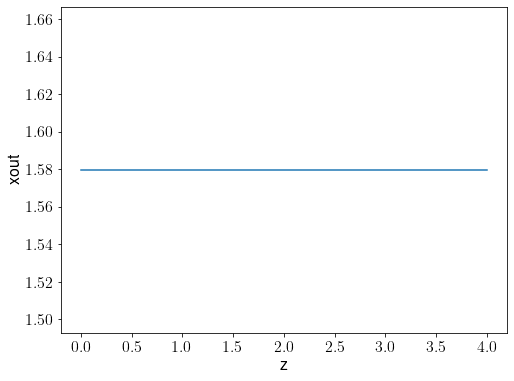

In [102]:
z_ar = np.linspace(0,4,100)
xout_calc = np.vectorize(M.get_m_to_xout_at_z_and_m)(z_ar,m200c)
plt.plot(z_ar,xout_calc)
plt.xlabel('z')
plt.ylabel('xout')

Text(0, 0.5, 'xout')

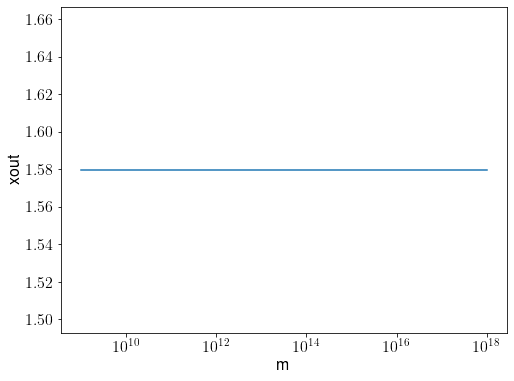

In [103]:
m_ar = np.geomspace(1e9,1e18,100)
xout_calc = np.vectorize(M.get_m_to_xout_at_z_and_m)(z,m_ar)
plt.plot(m_ar,xout_calc)
plt.xlabel('m')
plt.xscale('log')
plt.ylabel('xout')

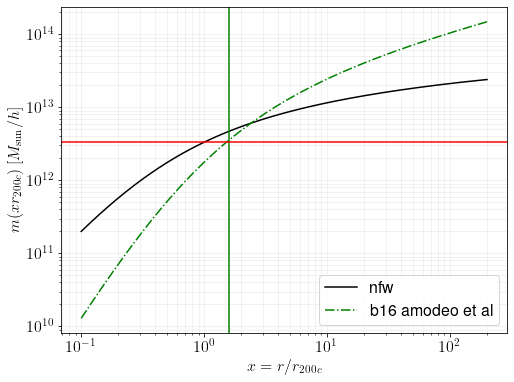

In [105]:
# normalization of b16 such that b16 and nfw have same mass within 1*r200c:
plt.plot(lambda_array,M_nfw(lambda_array),label='nfw',c='k')
rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.
xout_calc = np.vectorize(M.get_m_to_xout_at_z_and_m)(z,m200c)
# nfw like
A_rho0=10.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c
# plt.plot(lambda_array,M_b16(lambda_array,
#                             A_rho0=A_rho0_norm(A_rho0=A_rho0,
#                                                A_alpha=A_alpha,
#                                                A_beta=A_beta,
#                                                alpha_m_rho0 = alpha_m_rho0,
#                                                alpha_m_alpha = alpha_m_alpha,
#                                                alpha_m_beta = alpha_m_beta,
#                                                alpha_z_rho0 = alpha_z_rho0,
#                                                alpha_z_alpha = alpha_z_alpha,
#                                                alpha_z_beta = alpha_z_beta,
#                                                gamma = gamma,
#                                                xc = xc
#                                                ),
#                             A_alpha=A_alpha,
#                             A_beta=A_beta,
#                             alpha_m_rho0 = alpha_m_rho0,
#                             alpha_m_alpha = alpha_m_alpha,
#                             alpha_m_beta = alpha_m_beta,
#                             alpha_z_rho0 = alpha_z_rho0,
#                             alpha_z_alpha = alpha_z_alpha,
#                             alpha_z_beta = alpha_z_beta,
#                             gamma=gamma,
#                             xc = xc
#                            ),
#          label='b16 nfw-like',ls='--')

A_rho0 = 10**2.8
A_alpha = 1.
A_beta = 2.6

alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.

alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -0.2
xc = 0.6
plt.plot(lambda_array,M_b16(lambda_array,
#                             A_rho0=A_rho0_norm(A_rho0=A_rho0,
#                                                A_alpha=A_alpha,
#                                                A_beta=A_beta,
#                                                alpha_m_rho0 = alpha_m_rho0,
#                                                alpha_m_alpha = alpha_m_alpha,
#                                                alpha_m_beta = alpha_m_beta,
#                                                alpha_z_rho0 = alpha_z_rho0,
#                                                alpha_z_alpha = alpha_z_alpha,
#                                                alpha_z_beta = alpha_z_beta,
#                                                gamma = gamma,
#                                                xc = xc
#                                                ),
                            A_rho0=A_rho0,
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='b16 amodeo et al',ls='-.',c='green')

plt.axvline(xout_calc,c='green')
plt.axhline(M_nfw(1.),c='r')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$m(x r_{200c})$   $[M_\mathrm{sun}/h]$')
plt.xlabel(r'$x=r/r_{200c}$')
plt.legend()
plt.grid(which='both',alpha=0.2)

In [106]:
xout_calc

array(1.57944676)

## AGN profile for different values of alphas and betas

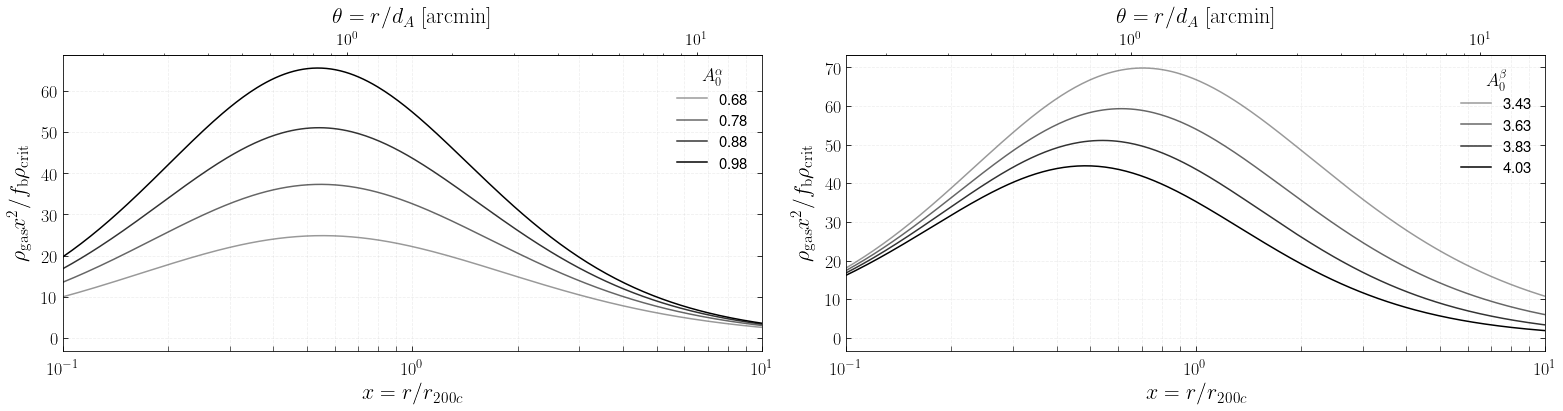

In [176]:



label_size = 18
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(22,6))


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

p_values = [0.68,0.78,0.88,0.98]
alpha=0.2
for A_alpha in p_values:
    rho_norm_b16 = rho_gas_b16(x_200c,
                               m200c,
                               z,
                                A_rho0 = A_rho0,
                                A_alpha = A_alpha,
                                A_beta = A_beta,
                                alpha_m_rho0 = alpha_m_rho0,
                                alpha_m_alpha = alpha_m_alpha,
                                alpha_m_beta = alpha_m_beta,
                                alpha_z_rho0 = alpha_z_rho0,
                                alpha_z_alpha = alpha_z_alpha,
                                alpha_z_beta = alpha_z_beta,
                                gamma=gamma,
                                xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
    alpha=alpha+0.2
    ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = str(A_alpha),ls='-',c='k',alpha=alpha)



ax1.set_xscale('log')
legend = ax1.legend(title=r'$A_0^\alpha$',fontsize=15,frameon=False)
plt.setp(legend.get_title(),fontsize=18)
ax1.set_xlabel(r'$x=r/r_{200c}$',size=title_size)
ax1.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$',size=title_size,labelpad=10)

secax = ax1.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ $\mathrm{[arcmin]}$',size=title_size,labelpad=10)
# ax1.set_ylim(1e1,1e2)
ax1.set_xlim(1e-1,1e1)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

p_values = [3.43,3.63,3.83,4.03]
alpha=0.2
for A_beta in p_values:
    rho_norm_b16 = rho_gas_b16(x_200c,
                               m200c,
                               z,
                                A_rho0 = A_rho0,
                                A_alpha = A_alpha,
                                A_beta = A_beta,
                                alpha_m_rho0 = alpha_m_rho0,
                                alpha_m_alpha = alpha_m_alpha,
                                alpha_m_beta = alpha_m_beta,
                                alpha_z_rho0 = alpha_z_rho0,
                                alpha_z_alpha = alpha_z_alpha,
                                alpha_z_beta = alpha_z_beta,
                                gamma=gamma,
                                xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
    alpha=alpha+0.2
    ax.plot(x_200c,rho_norm_b16*x_200c**2, label = str(A_beta),ls='-',c='k',alpha=alpha)



ax.set_xscale('log')
legend = ax2.legend(title=r'$A_0^\beta$',fontsize=15,frameon=False)
plt.setp(legend.get_title(),fontsize=18)
ax.set_xlabel(r'$x=r/r_{200c}$',size=title_size)
ax.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$',size=title_size,labelpad=10)

secax = ax.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ $\mathrm{[arcmin]}$',size=title_size,labelpad=10)
# ax1.set_ylim(1e1,1e2)
ax.set_xlim(1e-1,1e1)

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'density_profile_agn_alphas_betas.pdf')


## summary plot

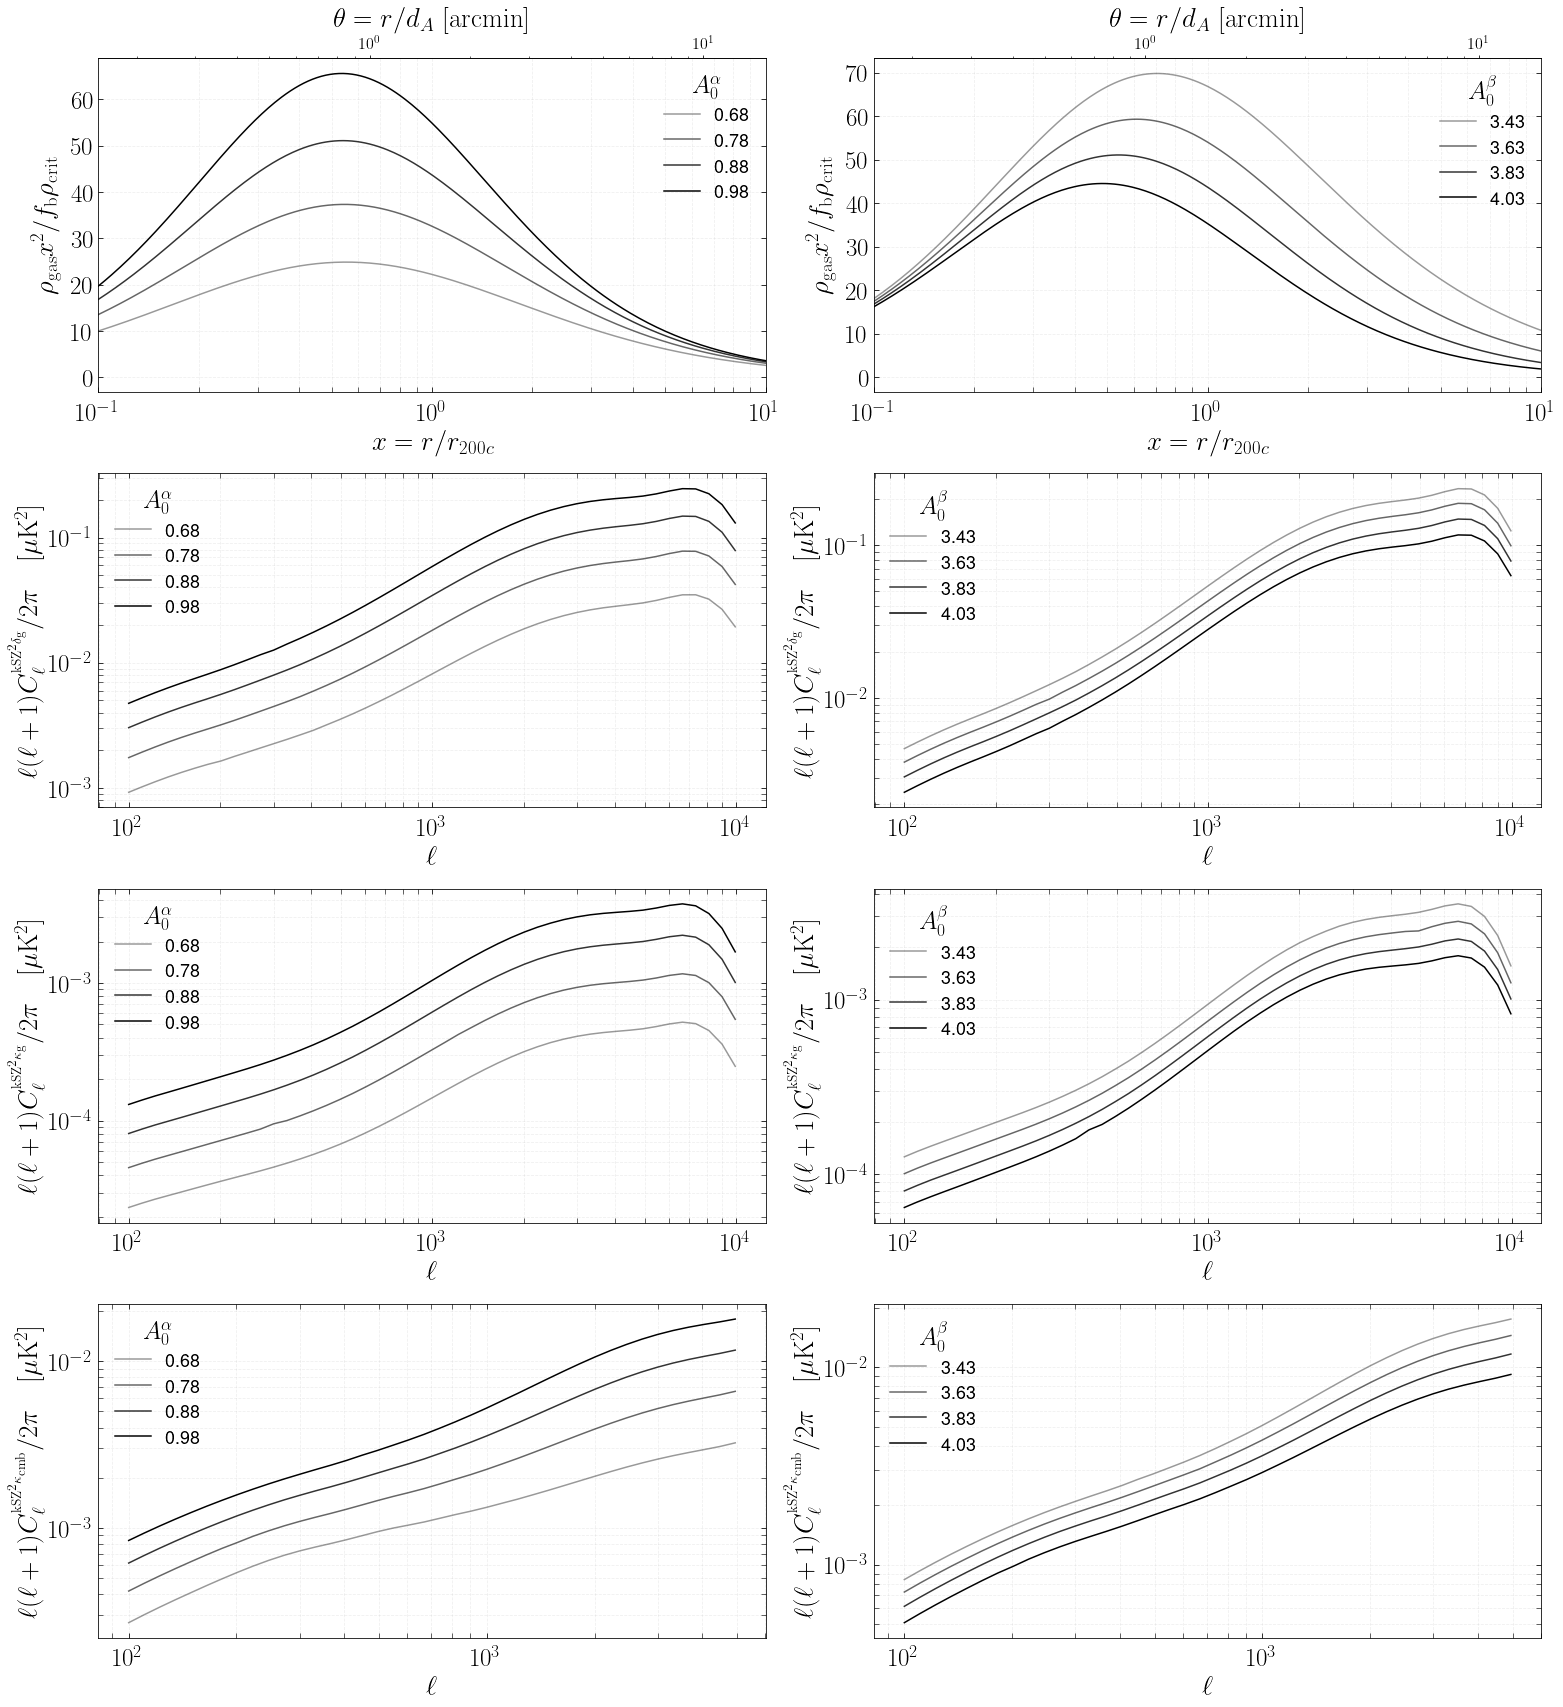

In [234]:



label_size = 25
title_size = 27
legend_size = 18
param_size = 25
handle_length = 1.5
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(22,24))


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

p_values = [0.68,0.78,0.88,0.98]
alpha=0.2
for A_alpha in p_values:
    rho_norm_b16 = rho_gas_b16(x_200c,
                               m200c,
                               z,
                                A_rho0 = A_rho0,
                                A_alpha = A_alpha,
                                A_beta = A_beta,
                                alpha_m_rho0 = alpha_m_rho0,
                                alpha_m_alpha = alpha_m_alpha,
                                alpha_m_beta = alpha_m_beta,
                                alpha_z_rho0 = alpha_z_rho0,
                                alpha_z_alpha = alpha_z_alpha,
                                alpha_z_beta = alpha_z_beta,
                                gamma=gamma,
                                xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
    alpha=alpha+0.2
    ax1.plot(x_200c,rho_norm_b16*x_200c**2, label = str(A_alpha),ls='-',c='k',alpha=alpha)



ax1.set_xscale('log')
legend = ax1.legend(title=r'$A_0^\alpha$',fontsize=legend_size,frameon=False)
plt.setp(legend.get_title(),fontsize=param_size)

ax1.set_xlabel(r'$x=r/r_{200c}$',size=title_size)
ax1.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$',size=title_size,labelpad=10)

secax = ax1.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ $\mathrm{[arcmin]}$',size=title_size,labelpad=10)
# ax1.set_ylim(1e1,1e2)
ax1.set_xlim(1e-1,1e1)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5

p_values = [3.43,3.63,3.83,4.03]
alpha=0.2
for A_beta in p_values:
    rho_norm_b16 = rho_gas_b16(x_200c,
                               m200c,
                               z,
                                A_rho0 = A_rho0,
                                A_alpha = A_alpha,
                                A_beta = A_beta,
                                alpha_m_rho0 = alpha_m_rho0,
                                alpha_m_alpha = alpha_m_alpha,
                                alpha_m_beta = alpha_m_beta,
                                alpha_z_rho0 = alpha_z_rho0,
                                alpha_z_alpha = alpha_z_alpha,
                                alpha_z_beta = alpha_z_beta,
                                gamma=gamma,
                                xc = xc)/M.get_rho_crit_at_z(z)/M.get_f_b()
    alpha=alpha+0.2
    ax.plot(x_200c,rho_norm_b16*x_200c**2, label = str(A_beta),ls='-',c='k',alpha=alpha)



ax.set_xscale('log')
legend = ax2.legend(title=r'$A_0^\beta$',fontsize=legend_size,frameon=False)
plt.setp(legend.get_title(),fontsize=param_size)
ax.set_xlabel(r'$x=r/r_{200c}$',size=title_size)
ax.set_ylabel(r'$\rho_\mathrm{gas}x^2/f_\mathrm{b}\rho_\mathrm{crit}$',size=title_size,labelpad=10)

secax = ax.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'$\theta = r/d_A$ $\mathrm{[arcmin]}$',size=title_size,labelpad=10)
# ax1.set_ylim(1e1,1e2)
ax.set_xlim(1e-1,1e1)


## TTG

ax=ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_alpha'
p_values = [0.68,0.78,0.88,0.98]
alpha=0.2
for p in p_values:
    strp = str(p)
    alpha=alpha+0.2
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_x_uwb_varying_Aalpha_l_dl1h_dl2h_dl3h_dltot_uK2_Aalpha_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p),c='k',alpha=alpha)
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
legend = ax.legend(title=r'$A_0^\alpha$',fontsize=legend_size,frameon=False)
plt.setp(legend.get_title(),fontsize=param_size)


# ax.grid()
# ax.legend(fontsize=11,loc=2)
# ax.legend(title=r'$A_0^\beta$',fontsize=legend_size,frameon=False)
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
ax.set_yscale('log')
ax.set_xscale('log')

ax=ax4
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_beta'
p_values = [3.43,3.63,3.83,4.03]
alpha=0.2
for p in p_values:
    strp = str(p)
    alpha=alpha+0.2
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_x_uwb_varying_Abeta_l_dl1h_dl2h_dl3h_dltot_uK2_Abeta_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p),c='k',alpha=alpha)
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
legend = ax.legend(title=r'$A_0^\beta$',fontsize=legend_size,frameon=False)
plt.setp(legend.get_title(),fontsize=param_size)


# ax.grid()
# ax.legend(fontsize=11,loc=2)
# ax.legend(title=r'$A_0^\beta$',fontsize=legend_size,frameon=False)
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
ax.set_yscale('log')
ax.set_xscale('log')


## TTKG

ax=ax5
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_alpha'
p_values = [0.68,0.78,0.88,0.98]
alpha=0.2
for p in p_values:
    strp = str(p)
    alpha=alpha+0.2
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_x_rubin_lensing_varying_Aalpha_l_dl1h_dl2h_dl3h_dltot_uK2_Aalpha_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p),c='k',alpha=alpha)
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
legend = ax.legend(title=r'$A_0^\alpha$',fontsize=legend_size,frameon=False)
plt.setp(legend.get_title(),fontsize=param_size)


# ax.grid()
# ax.legend(fontsize=11,loc=2)
# ax.legend(title=r'$A_0^\beta$',fontsize=legend_size,frameon=False)
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
ax.set_yscale('log')
ax.set_xscale('log')

ax=ax6
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_beta'
p_values = [3.43,3.63,3.83,4.03]
alpha=0.2
for p in p_values:
    strp = str(p)
    alpha=alpha+0.2
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_x_rubin_lensing_varying_Abeta_l_dl1h_dl2h_dl3h_dltot_uK2_Abeta_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p),c='k',alpha=alpha)
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
legend = ax.legend(title=r'$A_0^\beta$',fontsize=legend_size,frameon=False)
plt.setp(legend.get_title(),fontsize=param_size)


# ax.grid()
# ax.legend(fontsize=11,loc=2)
# ax.legend(title=r'$A_0^\beta$',fontsize=legend_size,frameon=False)
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
ax.set_yscale('log')
ax.set_xscale('log')


## TTKCMB

ax=ax7
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_alpha'
p_values = [0.68,0.78,0.88,0.98]
alpha=0.2
for p in p_values:
    strp = str(p)
    alpha=alpha+0.2
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_lensing_varying_Aalpha_l_dl1h_dl2h_dl3h_dltot_uK2_Aalpha_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p),c='k',alpha=alpha)
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
legend = ax.legend(title=r'$A_0^\alpha$',fontsize=legend_size,frameon=False)
plt.setp(legend.get_title(),fontsize=param_size)


# ax.grid()
# ax.legend(fontsize=11,loc=2)
# ax.legend(title=r'$A_0^\beta$',fontsize=legend_size,frameon=False)
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
ax.set_yscale('log')
ax.set_xscale('log')

ax=ax8
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
p_name = 'A_beta'
p_values = [3.43,3.63,3.83,4.03]
alpha=0.2
for p in p_values:
    strp = str(p)
    alpha=alpha+0.2
    l,dl_1h,dl_2h,dl_3h,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'so_lensing_varying_Abeta_l_dl1h_dl2h_dl3h_dltot_uK2_Abeta_'+strp.replace(".","p")+'.txt',unpack=True)
    ax.plot(l,dl_tot,label=str(p),c='k',alpha=alpha)
    
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
legend = ax.legend(title=r'$A_0^\beta$',fontsize=legend_size,frameon=False)



# ax.grid()
# ax.legend(fontsize=11,loc=2)
legend = ax.legend(title=r'$A_0^\beta$',fontsize=legend_size,frameon=False)
plt.setp(legend.get_title(),fontsize=param_size)
# ax.set_ylim(-0.012,0.045)
# ax.set_xlim(400,5e3)
ax.set_yscale('log')
ax.set_xscale('log')



fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'density_profile_agn_alphas_betas_with_cls.pdf')



# kSZ2X Comparison of Profiles

## SO x unWISE blue

In [355]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',
      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 61.0053 seconds
computed in 60.5077 seconds
computed in 70.0227 seconds


In [22]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
'k_max_gas_density_profile' : 20.,
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_kmax_3 = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



computed in 60.5627 seconds


### save data

In [356]:
cl_kSZ2X = cl_kSZ_kSZ_g_nfw.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_agn.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_shock.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

In [23]:
cl_kSZ2X = cl_kSZ_kSZ_g_agn_kmax_3.copy()
fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_kmax3.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

### make indidvidual plot

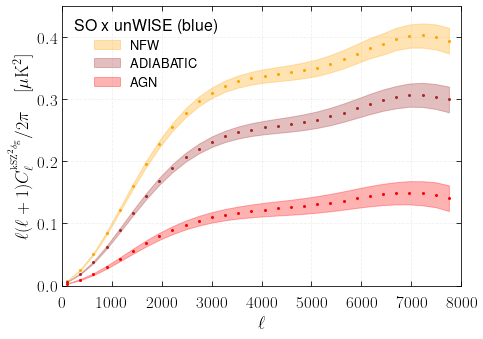

In [357]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'NFW', c='orange',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'ADIABATIC', c='brown',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'AGN', c='red',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)

plt.xscale('linear')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

plt.ylim(0.,0.45)
plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=2,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue)')

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

#### compute for Amodeo et al profile

In [2]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'custom',
        

# 'x_out_truncated_density_profile (electrons)': 2.,#1.57944676, 
'use_xout_in_density_profile_from_enclosed_mass': 1,
# 'k_max_gas_density_profile' : 3.,
        
# A_rho0 = 10**2.8
# A_alpha = 1.
# A_beta = 2.6

# alpha_m_rho0 = 0.
# alpha_m_alpha = 0.
# alpha_m_beta = 0.

# alpha_z_rho0 = 0.
# alpha_z_alpha = 0.
# alpha_z_beta = 0.
# gamma = -0.2
# xc = 0.6
  
        
"A_rho0": 10**2.8,
"A_alpha": 1.,
"A_beta": 2.6,

"alpha_m_rho0": 0.,
"alpha_m_alpha": 0.,
"alpha_m_beta": 0.,

"alpha_z_rho0": 0.,
"alpha_z_alpha": 0.,
"alpha_z_bet": 0.,
"gamma_B16": -0.2,
"xc_B16": 0.6,
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_amodeo = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 63.1543 seconds


In [3]:
cl_kSZ2X = cl_kSZ_kSZ_g_amodeo.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_100522_amodeo.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

In [3]:
# this one had a different xout.

cl_kSZ2X = cl_kSZ_kSZ_g_amodeo.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_amodeo.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

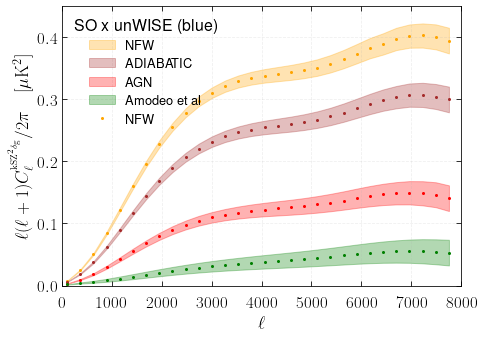

In [11]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'NFW', c='orange',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'ADIABATIC', c='brown',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'AGN', c='red',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)


# # agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_100522_amodeo.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'Amodeo et al', c='green',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='green',label = 'Amodeo et al (cant be correct)',alpha=0.3)

# # # agn
# l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_amodeo.txt',unpack=True)
# plt.errorbar(l,dl_tot,label = 'Amodeo et al', c='blue',ls='None',marker = 'o',markersize=2)
# plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='blue',label = 'Amodeo et al',alpha=0.3)

plt.xscale('linear')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

plt.ylim(0.,0.45)
plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3,4]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=2,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue)')

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_ksz2g_with_stefanias.pdf')

## AdvACT x unWISE blue

In [92]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',
      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 61.8720 seconds
computed in 68.5023 seconds
computed in 72.7729 seconds


### save data

In [93]:
cl_kSZ2X = cl_kSZ_kSZ_g_nfw.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_advact_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_agn.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_advact_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_shock.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_advact_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

### make indidvidual plot

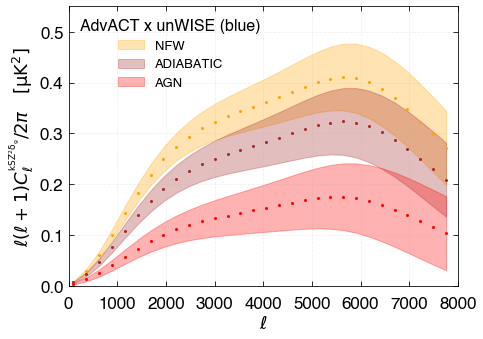

In [94]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_advact_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'NFW', c='orange',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_advact_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'ADIABATIC', c='brown',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_advact_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'AGN', c='red',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)

plt.xscale('linear')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

plt.ylim(0.,0.55)
plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=2,frameon=False,
           fontsize=13,
           title = 'AdvACT x unWISE (blue)')

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

## AdvACT x DES lensing

In [231]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.12, 


'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_kg()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.12, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',

'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,
      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_kg()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_advact_20uK_1p5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.12, 

    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,

      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_kg()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 75.2382 seconds
computed in 86.6793 seconds
computed in 92.0929 seconds


### save data

In [232]:
cl_kSZ2X = cl_kSZ_kSZ_g_nfw.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kg_advact_x_des_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_agn.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kg_advact_x_des_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_shock.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kg_advact_x_des_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

### make indidvidual plot

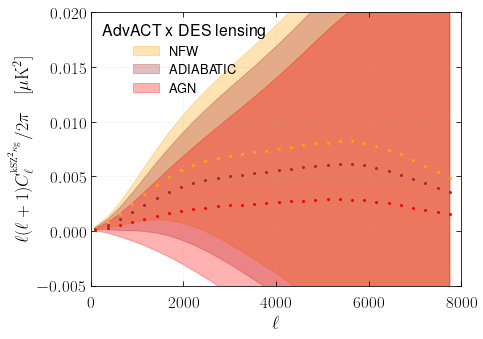

In [233]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_advact_x_des_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'NFW', c='orange',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_advact_x_des_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'ADIABATIC', c='brown',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_advact_x_des_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'AGN', c='red',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)

plt.xscale('linear')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

plt.ylim(-0.005,0.02)
plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=2,frameon=False,
           fontsize=13,
           title = 'AdvACT x DES lensing')

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

## SO x Rubin lensing

In [364]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_kg()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',



'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',

'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,
      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_kg()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',



'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile
        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,

      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_kg()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 99.2110 seconds
computed in 103.9606 seconds
computed in 107.7325 seconds


### save data

In [365]:
cl_kSZ2X = cl_kSZ_kSZ_g_nfw.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kg_so_x_rubin_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_agn.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kg_so_x_rubin_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_shock.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kg_so_x_rubin_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

### make indidvidual plot

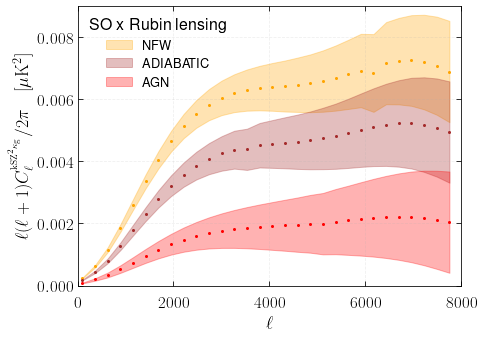

In [366]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_so_x_rubin_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'NFW', c='orange',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_so_x_rubin_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'ADIABATIC', c='brown',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_so_x_rubin_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'AGN', c='red',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)

plt.xscale('linear')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

plt.ylim(0.0,0.009)
plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=2,frameon=False,
           fontsize=13,
           title = 'SO x Rubin lensing')

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

## SO CMB lensing

In [367]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', 
'gas profile mode' : 'agn',

        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/so_lensing_noise.dat',
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',

'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/so_lensing_noise.dat',
        
      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/so_lensing_noise.dat',


      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 48.3338 seconds
computed in 53.4882 seconds
computed in 51.6194 seconds


### compute with effective approach

In [2]:

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens_hf',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/so_lensing_noise.dat',


      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_hf = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 50.9635 seconds


In [4]:
cl_kSZ2X = cl_kSZ_kSZ_g_hf.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_3h = fac*np.asarray(cl_kSZ2X['hf'])
dl_tot = dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kcmb_so_l_dltothf_uK2_030522_hf.txt',
          np.c_[l,dl_tot])

### save data

In [368]:
cl_kSZ2X = cl_kSZ_kSZ_g_nfw.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kcmb_so_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_agn.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kcmb_so_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_shock.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kcmb_so_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

### make indidvidual plot

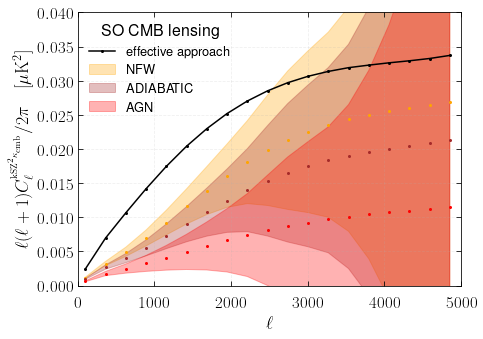

In [30]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_so_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'NFW', c='orange',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_so_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'ADIABATIC', c='brown',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_so_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'AGN', c='red',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)


l,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_so_l_dltothf_uK2_030522_hf.txt',unpack=True)
plt.plot(l,dl_tot,label = 'effective approach', c='k',ls='-',marker = 'o',markersize=2)

plt.xscale('linear')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

plt.ylim(0.0,0.04)
plt.xlim(0.,5e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=2,frameon=False,
           fontsize=13,
           title = 'SO CMB lensing')

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

## S4 CMB lensing

In [370]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/s4_lensing_noise.dat',
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',

'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/s4_lensing_noise.dat',
        
      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/s4_lensing_noise.dat',


      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 49.0389 seconds
computed in 58.3040 seconds
computed in 59.7705 seconds


### save data

In [371]:
cl_kSZ2X = cl_kSZ_kSZ_g_nfw.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_agn.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_shock.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

### compute with effective approach

In [24]:

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens_hf',


'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 



    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/s4_lensing_noise.dat',


      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_hf = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 55.7856 seconds


In [25]:
cl_kSZ2X = cl_kSZ_kSZ_g_hf.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_3h = fac*np.asarray(cl_kSZ2X['hf'])
dl_tot = dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dltothf_uK2_170522_hf.txt',
          np.c_[l,dl_tot])

In [31]:

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens_hf',


'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'z_max': 5.,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/s4_lensing_noise.dat',


      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_hf = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 58.8531 seconds


In [32]:
cl_kSZ2X = cl_kSZ_kSZ_g_hf.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_3h = fac*np.asarray(cl_kSZ2X['hf'])
dl_tot = dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dltothf_uK2_170522_hf_zmax5.txt',
          np.c_[l,dl_tot])

In [5]:

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens_hf',


'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 264.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'z_max': 5.,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/s4_lensing_noise.dat',

        
# some test with precision params:
'N_kSZ2_gal_multipole_grid' :  140,
'N_kSZ2_gal_theta_grid' :  140,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e4,
        

'redshift_epsrel': 0.0001,

      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_hf = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 261.9079 seconds


In [6]:
cl_kSZ2X = cl_kSZ_kSZ_g_hf.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_3h = fac*np.asarray(cl_kSZ2X['hf'])
dl_tot = dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dltothf_uK2_170522_hf_zmax5_prectest.txt',
          np.c_[l,dl_tot])

### make indidvidual plot

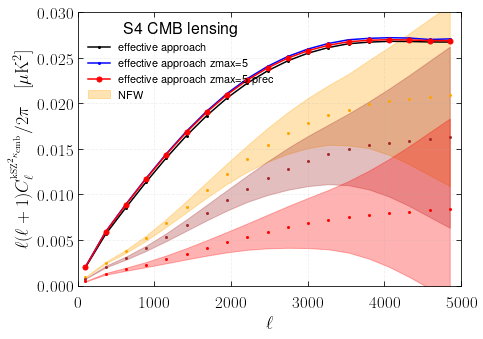

In [7]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'NFW', c='orange',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'ADIABATIC', c='brown',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
plt.errorbar(l,dl_tot,label = 'AGN', c='red',ls='None',marker = 'o',markersize=2)
plt.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)


# effective approach

l,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dltothf_uK2_170522_hf.txt',unpack=True)
plt.plot(l,dl_tot,label = 'effective approach', c='k',ls='-',marker = 'o',markersize=2)


l,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dltothf_uK2_170522_hf_zmax5.txt',unpack=True)
plt.plot(l,dl_tot,label = 'effective approach zmax=5', c='b',ls='-',marker = 'o',markersize=2)


l,dl_tot = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dltothf_uK2_170522_hf_zmax5_prectest.txt',unpack=True)
plt.plot(l,dl_tot,label = 'effective approach zmax=5 prec', c='r',ls='-',marker = 'o',markersize=5)

plt.xscale('linear')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

plt.ylim(0.0,0.03)
plt.xlim(0.,5e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=2,frameon=False,
           fontsize=11,
           title = 'S4 CMB lensing')

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

## summary plot

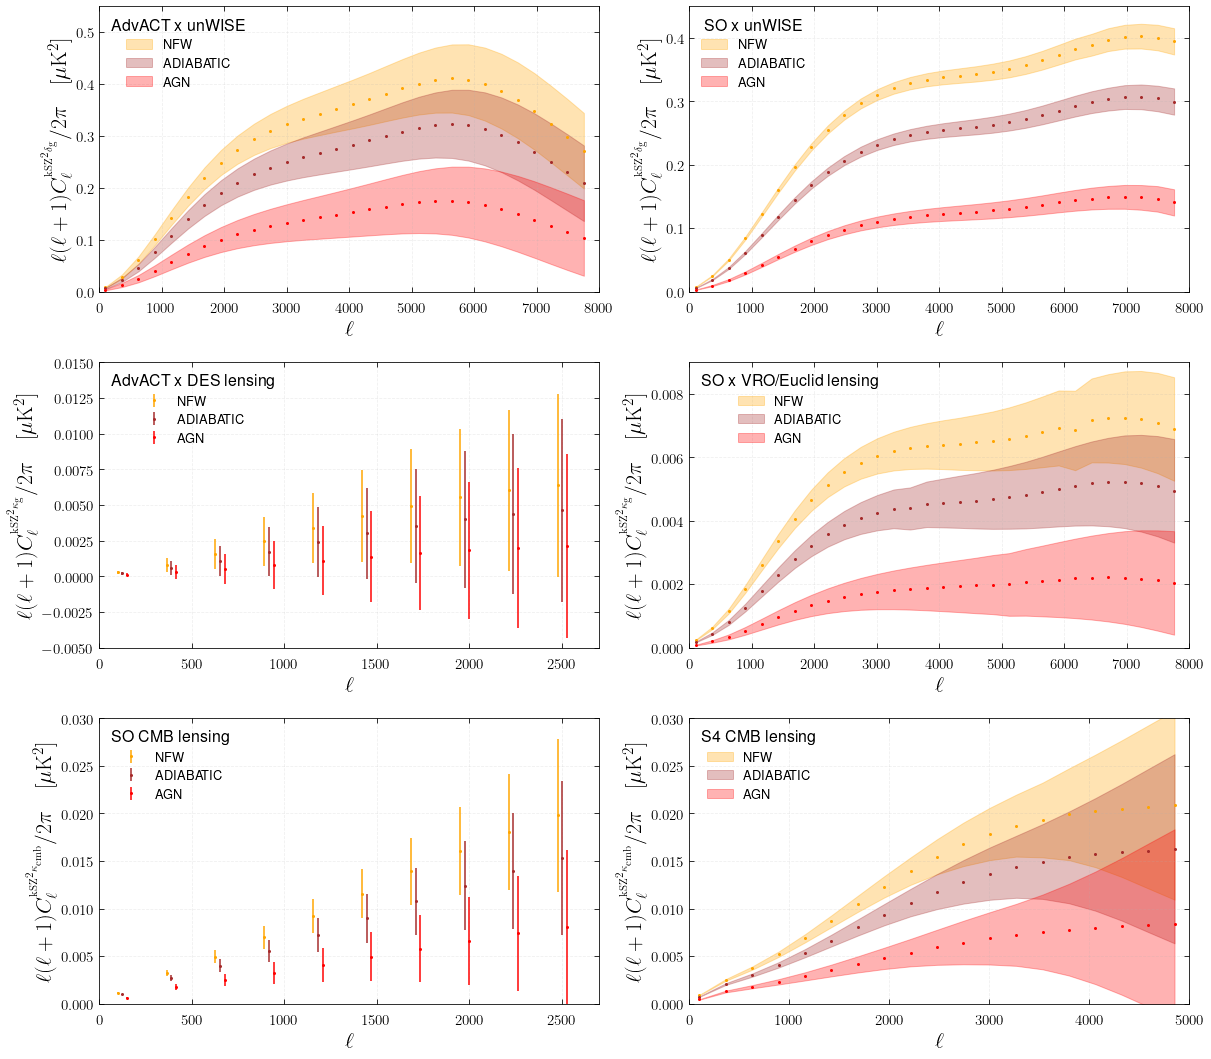

In [42]:
label_size = 15
title_size = 22
legend_size = 13
handle_length = 1.5
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(17,15))


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_advact_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'NFW', 
            c='orange',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_advact_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'ADIABATIC', 
            c='brown',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_advact_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'AGN', 
            c='red',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)

ax.set_xscale('linear')
ax.set_xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.set_ylim(0.,0.55)
ax.set_xlim(0.,8e3)

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [0,1,2]

# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
#            loc=2,frameon=False,
#            fontsize=13,
#            title = 'AdvACT x unWISE (blue)')

ax.legend(#[handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=2,frameon=False,
           fontsize=13,
           title = 'AdvACT x unWISE')

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'NFW', 
            c='orange',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'ADIABATIC', 
             c='brown',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'AGN', 
            c='red',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)

ax.set_xscale('linear')
ax.set_xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.set_ylim(0.,0.45)
ax.set_xlim(0.,8e3)

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [0,1,2]

# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
#            loc=2,frameon=False,
#            fontsize=13,
#            title = 'SO x unWISE (blue)')

ax.legend(#[handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=2,frameon=False,
           fontsize=13,
           title = 'SO x unWISE')

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_advact_x_des_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
ax.errorbar(l,dl_tot,label = 'NFW', yerr = dl_err,
            c='orange',ls='None',marker = 'o',markersize=2)
# ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_advact_x_des_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
ax.errorbar(l+25,dl_tot,label = 'ADIABATIC', yerr = dl_err,
            c='brown',ls='None',marker = 'o',markersize=2)
# ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_advact_x_des_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
ax.errorbar(l+50,dl_tot,label = 'AGN', yerr = dl_err,
            c='red',ls='None',marker = 'o',markersize=2)
# ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)

ax.set_xscale('linear')
ax.set_xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.set_ylim(-0.005,0.015)
ax.set_xlim(0.,2.7e3)

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [0,1,2]

# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
#            loc=2,frameon=False,
#            fontsize=13,
#            title = 'AdvACT x DES lensing')

ax.legend(
           loc=2,frameon=False,
           fontsize=13,
           title = 'AdvACT x DES lensing')


ax = ax4
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_so_x_rubin_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'NFW', 
            c='orange',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_so_x_rubin_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'ADIABATIC', 
            c='brown',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kg_so_x_rubin_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'AGN', 
            c='red',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)

ax.set_xscale('linear')
ax.set_xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.set_ylim(0.0,0.009)
ax.set_xlim(0.,8e3)

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [0,1,2]

# ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
#            loc=2,frameon=False,
#            fontsize=13,
#            title = 'SO x Rubin lensing')

ax.legend(
           loc=2,frameon=False,
           fontsize=13,
           title = 'SO x VRO/Euclid lensing')

ax = ax5
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_so_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
ax.errorbar(l,dl_tot,label = 'NFW', yerr = dl_err,
            c='orange',ls='None',
            marker = 'o',markersize=2)
# ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_so_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
ax.errorbar(l+25,dl_tot,label = 'ADIABATIC', 
            c='brown',ls='None',yerr = dl_err,
            marker = 'o',
            markersize=2)
# ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_so_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
ax.errorbar(l+50,dl_tot,label = 'AGN',
            c='red',ls='None',yerr = dl_err,
            marker = 'o',markersize=2)
# ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',label = 'AGN',alpha=0.3)

ax.set_xscale('linear')
ax.set_xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.set_ylim(0.0,0.03)
ax.set_xlim(0.,2.7e3)

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [0,1,2]

# ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
#            loc=2,frameon=False,
#            fontsize=13,
#            title = 'SO CMB lensing')

ax.legend(
           loc=2,frameon=False,
           fontsize=13,
           title = 'SO CMB lensing')

ax = ax6
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'NFW',
            c='orange',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='orange',label = 'NFW',alpha=0.3)


# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'ADIABATIC',
            c='brown',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='brown',
                label = 'ADIABATIC',alpha=0.3)

# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2kcmb_s4_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn.txt',unpack=True)
ax.errorbar(l,dl_tot,#label = 'AGN', 
            c='red',ls='None',marker = 'o',markersize=2)
ax.fill_between(l,dl_tot-dl_err,dl_tot+dl_err,color='red',
                label = 'AGN',alpha=0.3)

ax.set_xscale('linear')
ax.set_xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.set_ylim(0.0,0.03)
ax.set_xlim(0.,5e3)

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [0,1,2]

# ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
#            loc=2,frameon=False,
#            fontsize=13,
#            title = 'S4 CMB lensing')

ax.legend(
           loc=2,frameon=False,
           fontsize=13,
           title = 'S4 CMB lensing')


fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'kSZ2X_profiles_comp_123h.pdf')

# Small scales cut-off

SO x unWISE blue lmax=200,400,800,1600,4000

chose a value of lmax and run code below:

##  lmax = Fiducial

In [99]:
lmax = 'fiducial'

# fiducial filter file is : 'so_fl_A_170422.txt'

In [100]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 12000,
'ell_min' : 10.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',


        
'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',       

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 12000,
'ell_min' : 10.0,
'f_sky':0.4, 



'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',
      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',        

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',       

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 12000,
'ell_min' : 10.0,
'f_sky':0.4, 




'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 72.4236 seconds
computed in 79.7954 seconds
computed in 91.8662 seconds


### save data

In [101]:
str(lmax)

'fiducial'

In [102]:
cl_kSZ2X = cl_kSZ_kSZ_g_nfw.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_agn.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_shock.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

### make indidvidual plot

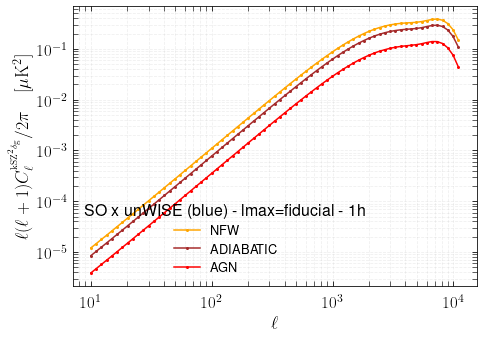

In [104]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(#[handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%s - 1h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

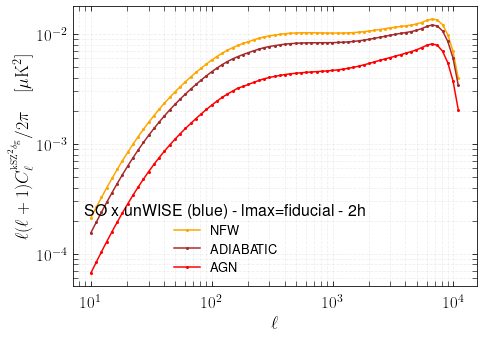

In [105]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(#[handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%s - 2h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

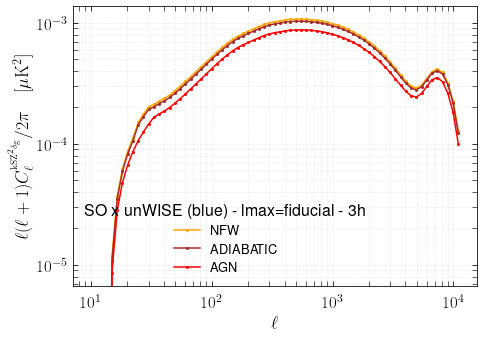

In [106]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%s - 3h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

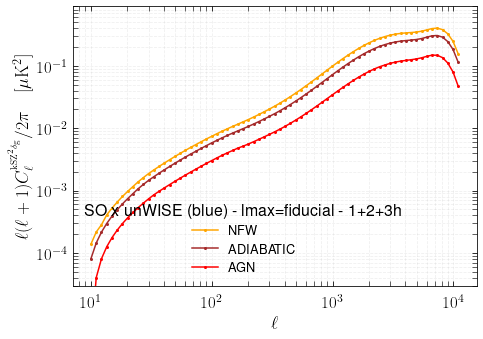

In [108]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%s - 1+2+3h'%lmax)

plt.ylim(3e-5,9e-1)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')


##  lmax = 4000

In [85]:
lmax = 4000

# fiducial filter file is : 'so_fl_A_170422.txt'

In [86]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax'+str(lmax)+'.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 3*lmax,
'ell_min' : 10.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',


        
'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax'+str(lmax)+'.txt',       

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 3*lmax,
'ell_min' : 10.0,
'f_sky':0.4, 



'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',
      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',        

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax'+str(lmax)+'.txt',       

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 3*lmax,
'ell_min' : 10.0,
'f_sky':0.4, 




'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 104.2460 seconds
computed in 173.7495 seconds
computed in 189.1117 seconds


### save data

In [87]:
cl_kSZ2X = cl_kSZ_kSZ_g_nfw.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_agn.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_shock.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

### make indidvidual plot

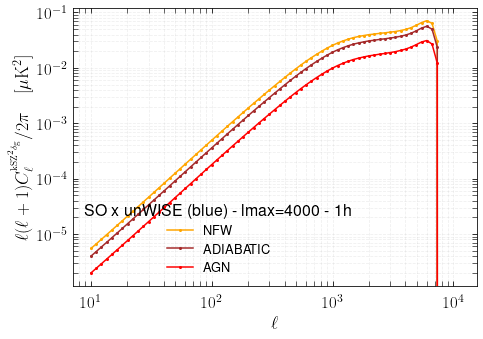

In [88]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(#[handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 1h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

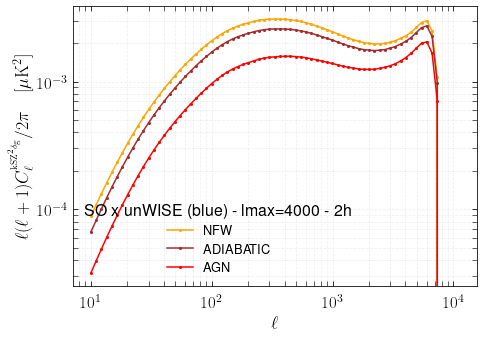

In [89]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(#[handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 2h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

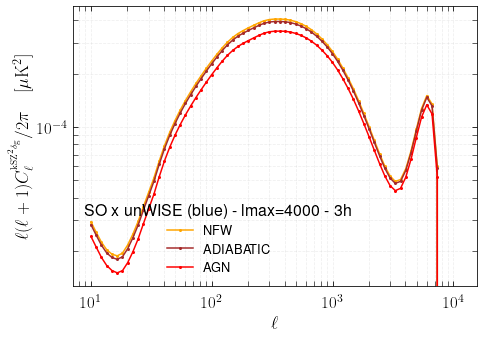

In [90]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 3h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

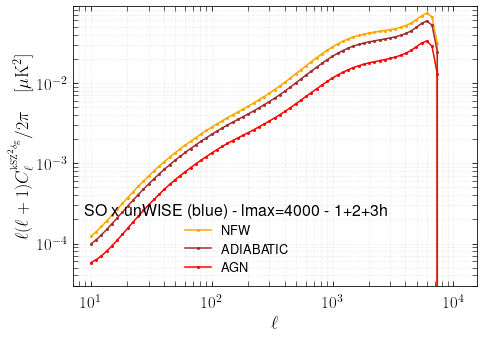

In [96]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 1+2+3h'%lmax)

plt.ylim(3e-5,9e-2)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')


##  lmax = 1600

In [83]:
lmax = 1600

# fiducial filter file is : 'so_fl_A_170422.txt'

In [72]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax'+str(lmax)+'.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 3*lmax,
'ell_min' : 10.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',


        
'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax'+str(lmax)+'.txt',       

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 3*lmax,
'ell_min' : 10.0,
'f_sky':0.4, 



'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',
      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',        

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax'+str(lmax)+'.txt',       

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 3*lmax,
'ell_min' : 10.0,
'f_sky':0.4, 




'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 78.9035 seconds
computed in 114.2831 seconds
computed in 136.7826 seconds


### save data

In [73]:
cl_kSZ2X = cl_kSZ_kSZ_g_nfw.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_agn.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_shock.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

### make indidvidual plot

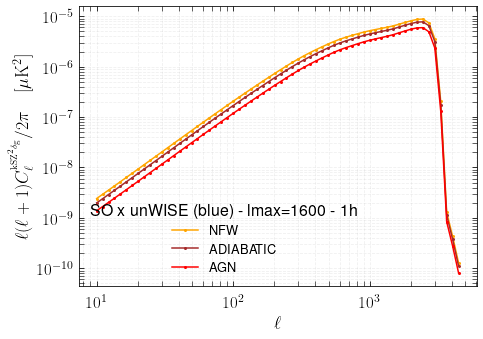

In [74]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(#[handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 1h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

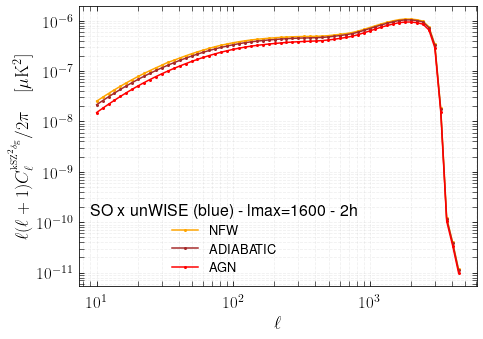

In [75]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(#[handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 2h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

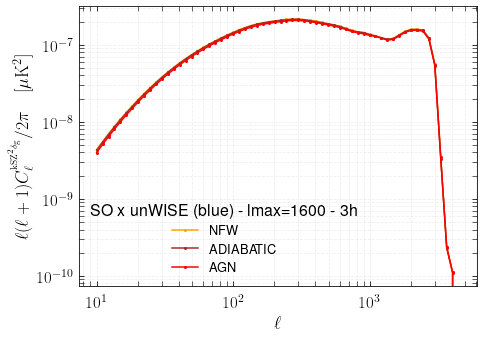

In [76]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 3h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

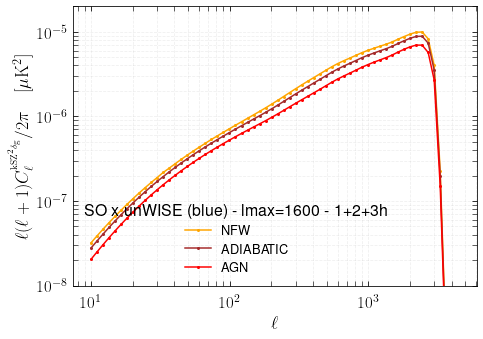

In [84]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 1+2+3h'%lmax)

plt.ylim(1e-8,2e-5)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')


##  lmax = 400

In [78]:
lmax = 400

# fiducial filter file is : 'so_fl_A_170422.txt'

In [65]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax'+str(lmax)+'.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 3*lmax,
'ell_min' : 10.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',


        
'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax'+str(lmax)+'.txt',       

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 3*lmax,
'ell_min' : 10.0,
'f_sky':0.4, 



'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',
      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()



M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
# 'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',        

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax'+str(lmax)+'.txt',       

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 3*lmax,
'ell_min' : 10.0,
'f_sky':0.4, 




'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'nfw', # set NFW profile

      })    
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 48.9827 seconds
computed in 52.1840 seconds
computed in 60.1047 seconds


### save data

In [66]:
cl_kSZ2X = cl_kSZ_kSZ_g_nfw.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_agn.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

cl_kSZ2X = cl_kSZ_kSZ_g_shock.copy()

fac = (T_cmb*1e6)**2*np.asarray(cl_kSZ2X['ell'])*(np.asarray(cl_kSZ2X['ell'])+1.)/2./np.pi
l = np.asarray(cl_kSZ2X['ell'])
dl_1h = fac*np.asarray(cl_kSZ2X['1h'])
dl_2h = fac*np.asarray(cl_kSZ2X['2h'])
dl_3h = fac*np.asarray(cl_kSZ2X['3h'])
dl_tot = dl_1h+dl_2h+dl_3h
dl_err = fac*np.sqrt(np.asarray(cl_kSZ2X['covmat']))
np.savetxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err])

### make indidvidual plot

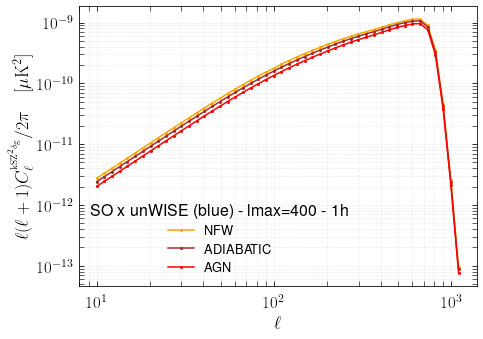

In [67]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(#[handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 1h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

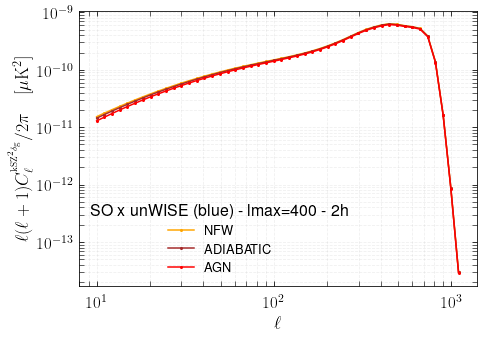

In [68]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_2h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(#[handles[idx] for idx in order],[labels[idx] for idx in order],
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 2h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

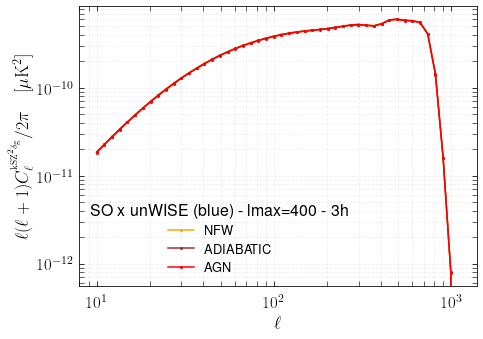

In [69]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_3h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 3h'%lmax)

fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')

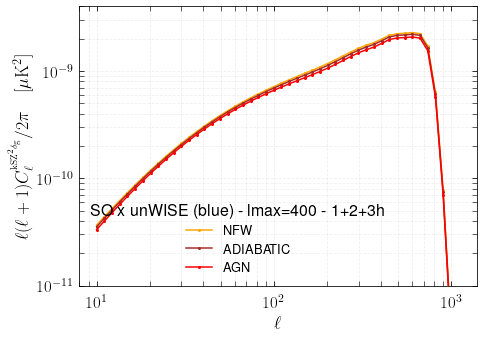

In [82]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'NFW', c='orange',marker = 'o',markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'ADIABATIC', c='brown',marker = 'o',markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
plt.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-',label = 'AGN', c='red',marker = 'o',markersize=2)


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

# plt.ylim(0.,0.45)
# plt.xlim(0.,8e3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]

plt.legend(
           loc=3,frameon=False,
           fontsize=13,
           title = 'SO x unWISE (blue) - lmax=%d - 1+2+3h'%lmax)

plt.ylim(1e-11,4e-9)
fig.tight_layout()
# plt.savefig('/Users/boris/Desktop/ksz_sum_8e3.pdf')


## summary plot

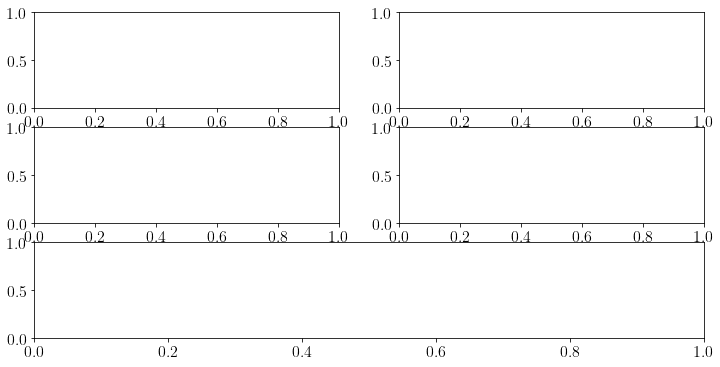

In [70]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(3,1,3)
ax = plt.subplot(3,2,1)
ax = plt.subplot(3,2,2)
ax = plt.subplot(3,2,3)
ax = plt.subplot(3,2,4)
# ax3 = plt.subplot(2,3,3)

# axes = [ax1, ax2, ax3, ax4]

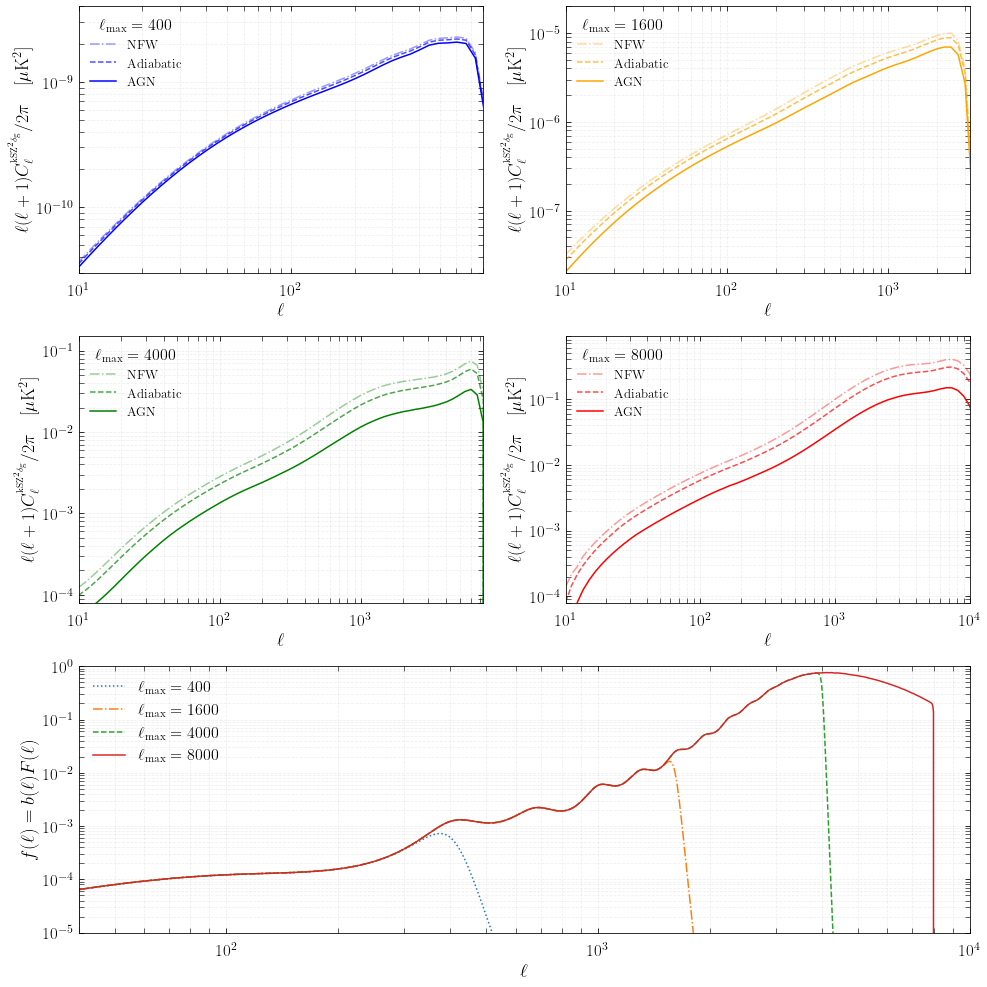

In [24]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
#fig, ((ax0),(ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(14,10))
fig = plt.figure(figsize=(14, 14))

ax = plt.subplot(3,1,3)
# ax =ax0
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')

x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax400.txt',unpack=True)
ax.plot(x,y,label=r'$\ell_\mathrm{max}=400$',ls=':')
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax1600.txt',unpack=True)
ax.plot(x,y,label=r'$\ell_\mathrm{max}=1600$',ls='-.')
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_noss_190422_lmax4000.txt',unpack=True)
ax.plot(x,y,label=r'$\ell_\mathrm{max}=4000$',ls='--')
x,y = np.loadtxt(path_to_kSZ2X_2022+'so_fl_A_170422.txt',unpack=True)
ax.plot(x,y,label=r'$\ell_\mathrm{max}=8000$')
ax.set_xlim(40,10000)
ax.set_ylim(1e-5,1.)
ax.legend(frameon=False)
plt.loglog()
ax.set_xlabel(r'$\ell$',fontsize=19)
ax.set_ylabel(r'$f(\ell)=b(\ell)F(\ell)$',fontsize=19)


# ax = ax1
ax = plt.subplot(3,2,1)
lmax=400
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-.',label = r'$\mathrm{NFW}$', c='blue',alpha=0.4,markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,label = r'$\mathrm{Adiabatic}$',ls='--', c='blue',alpha=0.7,markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,label = r'$\mathrm{AGN}$', c='blue',ls='-',markersize=2)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)


ax.legend(
           loc=2,frameon=False,
           fontsize=13,
           title = r'$\ell_\mathrm{max}=400$')

ax.set_ylim(3e-11,4e-9)
ax.set_xlim(1e1,8e2)

# ax = ax2
ax = plt.subplot(3,2,2)
lmax=1600
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-.',label = r'$\mathrm{NFW}$', c='orange',alpha=0.4,markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,label = r'$\mathrm{Adiabatic}$',ls='--', c='orange',alpha=0.7,markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,label = r'$\mathrm{AGN}$', c='orange',ls='-',markersize=2)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)


ax.legend(
           loc=2,frameon=False,
           fontsize=13,
           title = r'$\ell_\mathrm{max}=1600$')

ax.set_ylim(2e-8,2e-5)
ax.set_xlim(1e1,3200)


# ax = ax3
ax = plt.subplot(3,2,3)
lmax=4000
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-.',label = r'$\mathrm{NFW}$', c='green',alpha=0.4,markersize=2)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,label = r'$\mathrm{Adiabatic}$',ls='--', c='green',alpha=0.7,markersize=2)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,label = r'$\mathrm{AGN}$', c='green',ls='-',markersize=2)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)


ax.legend(
           loc=2,frameon=False,
           fontsize=13,
           title = r'$\ell_\mathrm{max}=4000$')

ax.set_ylim(8e-5,1.5e-1)
ax.set_xlim(1e1,7300)


# ax = ax4
ax = plt.subplot(3,2,4)
lmax='fiducial'
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



# nfw 
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_nfw_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,ls='-.',label = r'$\mathrm{NFW}$', c='red',markersize=2,alpha=0.4)



# adiabatic
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_shock_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,label = r'$\mathrm{Adiabatic}$',ls='--', c='red',markersize=2,alpha=0.7)


# agn
l,dl_1h,dl_2h,dl_3h,dl_tot,dl_err = np.loadtxt(path_to_kSZ2X_2022+'ksz2g_so_x_unwise_blue_l_dl1h_dl2h_dl3h_dltot_dlerr_uK2_190422_agn_lmax'+str(lmax)+'.txt',unpack=True)
ax.errorbar(l,dl_1h+dl_2h+dl_3h,label = r'$\mathrm{AGN}$', c='red',ls='-',markersize=2,alpha=1)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$\ell$")

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)


ax.legend(
           loc=2,frameon=False,
           fontsize=13,
           #title = 'SO x unWISE (blue) - lmax=%s - 1+2+3h'%lmax)
           title = r'$\ell_\mathrm{max}=8000$')

ax.set_ylim(8e-5,9e-1)
ax.set_xlim(1e1,10000)






fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'ksz2g_lmax.pdf')

# Covariance matrix plot

## SO x unWISE 

### compute

In [180]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set(
    {        
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 100.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()

print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 125.1028 seconds


### save data

In [254]:
ls = np.asarray(M.cl_t2t2f()['ell'])

fac_dl = (T_cmb*1e6)**2*np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*(np.asarray(M.cl_gg()['1h'])+np.asarray(M.cl_gg()['2h']))/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi)
t2t2dgdg = ya

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*M.A_sn()
t2t2nldgdg = ya

ya = fac_dl**2.*np.asarray(np.asarray(M.cl_kSZ_kSZ_g()['1h'])+np.asarray(M.cl_kSZ_kSZ_g()['2h'])+np.asarray(M.cl_kSZ_kSZ_g()['3h']))**2.
ksz2dgksz2dg = ya




ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_g()['1h'])+np.asarray(M.cl_kSZ_kSZ_g()['2h'])+np.asarray(M.cl_kSZ_kSZ_g()['3h']))**1.
ksz2dgtot = ya


ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_g()['1h']))
ksz2dg1h = ya

ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_g()['2h']))
ksz2dg2h = ya

ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_g()['3h']))
ksz2dg3h = ya

ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_g()['lensing term']))
lensing = ya

ya1 = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_g()['lensing term']))
ya2 = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_g()['1h'])+np.asarray(M.cl_kSZ_kSZ_g()['2h'])+np.asarray(M.cl_kSZ_kSZ_g()['3h']))**1.
total = ya1+ya2

dl_err = fac_dl*np.sqrt(np.asarray((M.cl_kSZ_kSZ_g()['covmat'])))


np.savetxt(path_to_kSZ2X_2022+'cov_and_sum_so_x_unwise_l_t2t2dgdg_t2t2nldgdg_ksz2dgksz2dg_ksz2dgtot_ksz2dg1h_ksz2dg2h_ksz2dg3h_lensing_total_dlerr.txt',
          np.c_[ls,
                t2t2dgdg,
                t2t2nldgdg,
                ksz2dgksz2dg,
                ksz2dgtot,
                ksz2dg1h,
                ksz2dg2h,
                ksz2dg3h,
                lensing,
                total,
                dl_err
               ])

### covmat plot

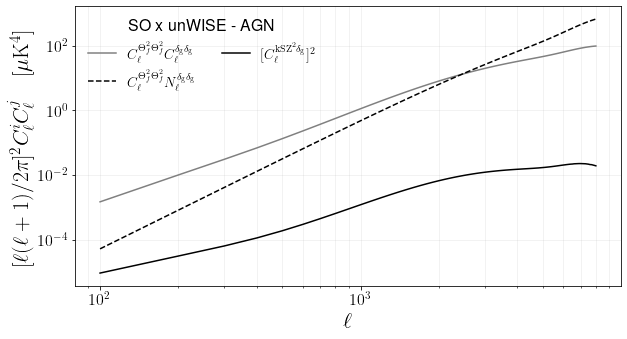

In [283]:


ls,t2t2dgdg,t2t2nldgdg,ksz2dgksz2dg,ksz2dgtot,ksz2dg1h,ksz2dg2h,ksz2dg3h,lensing,total,dlerr = np.loadtxt(path_to_kSZ2X_2022+'cov_and_sum_so_x_unwise_l_t2t2dgdg_t2t2nldgdg_ksz2dgksz2dg_ksz2dgtot_ksz2dg1h_ksz2dg2h_ksz2dg3h_lensing_total_dlerr.txt',unpack=True)


label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1


plt.plot(ls,t2t2dgdg,
         c='grey',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}C_\ell^{\delta_\mathrm{g}\delta_\mathrm{g}}$')

plt.plot(ls,t2t2nldgdg,
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}N_\ell^{\delta_\mathrm{g}\delta_\mathrm{g}}$',
         ls='--',
        c='k')

plt.plot(ls,ksz2dgksz2dg,
         label=r'$[C_\ell^{\mathrm{kSZ}^2\delta_\mathrm{g}}]^2$',
         c='k'
        )



ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]^2C_\ell^i C_\ell^j\quad [\mathrm{\mu K^4}]$',size=title_size)

ax.grid(which='both',alpha=0.2)

ax.legend(title='SO x unWISE - AGN',
          loc=2,
          ncol=2,
          frameon=False,
          fontsize=14)
# ax.set_ylim(5e-6,1e4)

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'SO_unWISE_covmat_terms.pdf')

### everything plot

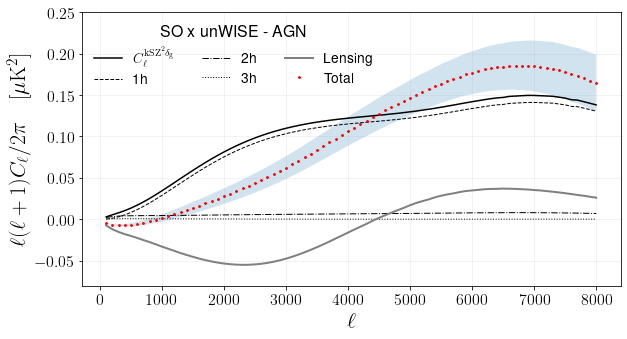

In [264]:

ls,t2t2dgdg,t2t2nldgdg,ksz2dgksz2dg,ksz2dgtot,ksz2dg1h,ksz2dg2h,ksz2dg3h,lensing,total,dlerr = np.loadtxt(path_to_kSZ2X_2022+'cov_and_sum_so_x_unwise_l_t2t2dgdg_t2t2nldgdg_ksz2dgksz2dg_ksz2dgtot_ksz2dg1h_ksz2dg2h_ksz2dg3h_lensing_total_dlerr.txt',unpack=True)



label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1


plt.plot(ls,ksz2dgtot,
         label=r'$C_\ell^{\mathrm{kSZ}^2\delta_\mathrm{g}}$',
         c='k'
        )

plt.plot(ls,ksz2dg1h,
         label=r'1h',
         c='k',
         ls='--',
         lw=1.
        )
plt.plot(ls,ksz2dg2h,
         label=r'2h',
         c='k',
         ls ='-.',
         lw=1.
        )

plt.plot(ls,ksz2dg3h,
         label=r'3h',
         c='k',
         ls=':',
         lw=1.
        )

plt.plot(ls,lensing,
         label=r'Lensing',
         c='grey',
         ls='-',
         lw=2
        )



plt.plot(ls,total,
         label=r'Total',
         c='r',
         ls='None',
         lw=1,
         marker='o',
         markersize=1.8
        )

plt.fill_between(ls,total-dlerr,total+dlerr,alpha=0.2)


ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)

ax.legend(title='SO x unWISE - AGN',
          loc=2,
          ncol=3,
          frameon=False,
          fontsize=14)
ax.set_ylim(-0.08,0.25)

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'SO_unWISE_everything_plot.pdf')

## SO x Rubin lensing

### compute

In [266]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_so_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 100.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

        
'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()

print(f"computed in {tf - ti:0.4f} seconds")




computed in 209.2897 seconds


### save data

In [267]:
ls = np.asarray(M.cl_t2t2f()['ell'])

fac_dl = (T_cmb*1e6)**2*np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*(np.asarray(M.cl_kg_kg()['1h'])+np.asarray(M.cl_kg_kg()['2h']))/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi)
t2t2dgdg = ya

nl_kg = 0.3/(40./arcmin_to_radians/arcmin_to_radians)
ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*nl_kg

t2t2nldgdg = ya

ya = fac_dl**2.*np.asarray(np.asarray(M.cl_kSZ_kSZ_kg()['1h'])+np.asarray(M.cl_kSZ_kSZ_kg()['2h'])+np.asarray(M.cl_kSZ_kSZ_kg()['3h']))**2.
ksz2dgksz2dg = ya




ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kg()['1h'])+np.asarray(M.cl_kSZ_kSZ_kg()['2h'])+np.asarray(M.cl_kSZ_kSZ_kg()['3h']))**1.
ksz2dgtot = ya


ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kg()['1h']))
ksz2dg1h = ya

ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kg()['2h']))
ksz2dg2h = ya

ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kg()['3h']))
ksz2dg3h = ya

ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kg()['lensing term']))
lensing = ya

ya1 = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kg()['lensing term']))
ya2 = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kg()['1h'])+np.asarray(M.cl_kSZ_kSZ_kg()['2h'])+np.asarray(M.cl_kSZ_kSZ_kg()['3h']))**1.
total = ya1+ya2

dl_err = fac_dl*np.sqrt(np.asarray((M.cl_kSZ_kSZ_kg()['covmat'])))


np.savetxt(path_to_kSZ2X_2022+'cov_and_sum_so_x_rubin_l_t2t2kgkg_t2t2nlkgkg_ksz2kgksz2kg_ksz2kgtot_ksz2kg1h_ksz2kg2h_ksz2kg3h_lensing_total_dlerr.txt',
          np.c_[ls,
                t2t2dgdg,
                t2t2nldgdg,
                ksz2dgksz2dg,
                ksz2dgtot,
                ksz2dg1h,
                ksz2dg2h,
                ksz2dg3h,
                lensing,
                total,
                dl_err
               ])

### covmat plot

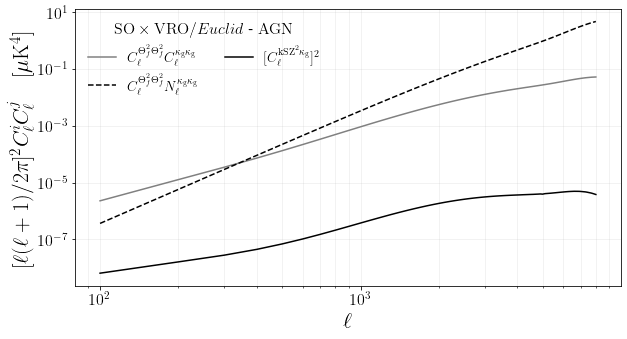

In [323]:


ls,t2t2dgdg,t2t2nldgdg,ksz2dgksz2dg,ksz2dgtot,ksz2dg1h,ksz2dg2h,ksz2dg3h,lensing,total,dlerr = np.loadtxt(path_to_kSZ2X_2022+'cov_and_sum_so_x_rubin_l_t2t2kgkg_t2t2nlkgkg_ksz2kgksz2kg_ksz2kgtot_ksz2kg1h_ksz2kg2h_ksz2kg3h_lensing_total_dlerr.txt',unpack=True)


label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1


plt.plot(ls,t2t2dgdg,
         c='grey',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}C_\ell^{\kappa_\mathrm{g}\kappa_\mathrm{g}}$')

plt.plot(ls,t2t2nldgdg,
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}N_\ell^{\kappa_\mathrm{g}\kappa_\mathrm{g}}$',
         ls='--',
        c='k')

plt.plot(ls,ksz2dgksz2dg,
         label=r'$[C_\ell^{\mathrm{kSZ}^2\kappa_\mathrm{g}}]^2$',
         c='k'
        )



ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]^2C_\ell^i C_\ell^j\quad [\mathrm{\mu K^4}]$',size=title_size)

ax.grid(which='both',alpha=0.2)

ax.legend(title=r'$\mathrm{SO\times VRO}/Euclid$ - $\mathrm{AGN}$',
          loc=2,
          ncol=2,
          frameon=False,
          fontsize=14)
# ax.set_ylim(5e-9,1e2)

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'SO_Rubin_covmat_terms.pdf')

### everything plot

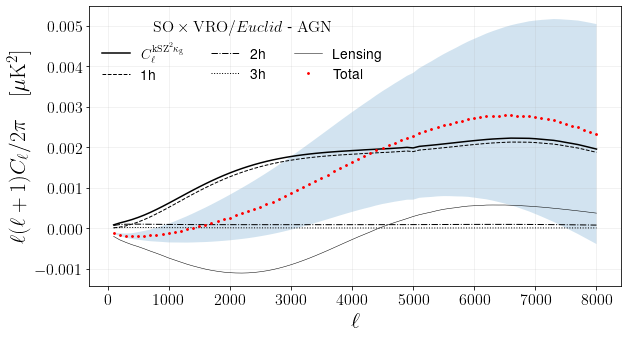

In [321]:

ls,t2t2dgdg,t2t2nldgdg,ksz2dgksz2dg,ksz2dgtot,ksz2dg1h,ksz2dg2h,ksz2dg3h,lensing,total,dlerr = np.loadtxt(path_to_kSZ2X_2022+'cov_and_sum_so_x_rubin_l_t2t2kgkg_t2t2nlkgkg_ksz2kgksz2kg_ksz2kgtot_ksz2kg1h_ksz2kg2h_ksz2kg3h_lensing_total_dlerr.txt',unpack=True)



label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1


plt.plot(ls,ksz2dgtot,
         label=r'$C_\ell^{\mathrm{kSZ}^2\kappa_\mathrm{g}}$',
         c='k'
        )

plt.plot(ls,ksz2dg1h,
         label=r'1h',
         c='k',
         ls='--',
         lw=1.
        )
plt.plot(ls,ksz2dg2h,
         label=r'2h',
         c='k',
         ls ='-.',
         lw=1.
        )

plt.plot(ls,ksz2dg3h,
         label=r'3h',
         c='k',
         ls=':',
         lw=1.
        )

plt.plot(ls,lensing,
         label=r'Lensing',
         c='k',
         ls='-',
         lw=0.5
        )



plt.plot(ls,total,
         label=r'Total',
         c='r',
         ls='None',
         lw=1,
         marker='o',
         markersize=1.8
        )

plt.fill_between(ls,total-dlerr,total+dlerr,alpha=0.2)


ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)

ax.legend(title=r'$\mathrm{SO}\times\mathrm{VRO}/{Euclid}$ - $\mathrm{AGN}$',
          loc=2,
          ncol=3,
          frameon=False,
          fontsize=14)
# ax.set_ylim(-0.08,0.25)
# ax.set_xscale('log')

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'SO_Rubin_everything_plot.pdf')

## S4 CMB lensing

### compute

In [284]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set(
    {        
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',


'ksz_filter_file' : path_to_kSZ2X_2022+'s4_fl_A_170422.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_s4_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 100.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 


'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

        
'cmb_lensing_noise_file': path_to_kSZ2X_2022+'external_data/s4_lensing_noise.dat',
      })       

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()

print(f"computed in {tf - ti:0.4f} seconds")




computed in 64.6653 seconds


### save data

In [285]:
ls = np.asarray(M.cl_t2t2f()['ell'])

fac_dl = (T_cmb*1e6)**2*np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*(np.asarray(M.cl_kk()['1h'])+np.asarray(M.cl_kk()['2h']))/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi)
t2t2dgdg = ya


nl_kg = np.vectorize(M.get_lensing_noise_at_ell)
ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*nl_kg(ls)

t2t2nldgdg = ya

ya = fac_dl**2.*np.asarray(np.asarray(M.cl_kSZ_kSZ_kcmb()['1h'])+np.asarray(M.cl_kSZ_kSZ_kcmb()['2h'])+np.asarray(M.cl_kSZ_kSZ_kcmb()['3h']))**2.
ksz2dgksz2dg = ya




ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kcmb()['1h'])+np.asarray(M.cl_kSZ_kSZ_kcmb()['2h'])+np.asarray(M.cl_kSZ_kSZ_kcmb()['3h']))**1.
ksz2dgtot = ya


ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kcmb()['1h']))
ksz2dg1h = ya

ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kcmb()['2h']))
ksz2dg2h = ya

ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kcmb()['3h']))
ksz2dg3h = ya

ya = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kcmb()['lensing term']))
lensing = ya

ya1 = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kcmb()['lensing term']))
ya2 = fac_dl**1.*(np.asarray(M.cl_kSZ_kSZ_kcmb()['1h'])+np.asarray(M.cl_kSZ_kSZ_kcmb()['2h'])+np.asarray(M.cl_kSZ_kSZ_kcmb()['3h']))**1.
total = ya1+ya2

dl_err = fac_dl*np.sqrt(np.asarray((M.cl_kSZ_kSZ_kcmb()['covmat'])))


np.savetxt(path_to_kSZ2X_2022+'cov_and_sum_s4_l_t2t2kk_t2t2nlkk_ksz2kksz2k_ksz2ktot_ksz2k1h_ksz2k2h_ksz2k3h_lensing_total_dlerr.txt',
          np.c_[ls,
                t2t2dgdg,
                t2t2nldgdg,
                ksz2dgksz2dg,
                ksz2dgtot,
                ksz2dg1h,
                ksz2dg2h,
                ksz2dg3h,
                lensing,
                total,
                dl_err
               ])


### covmat plot

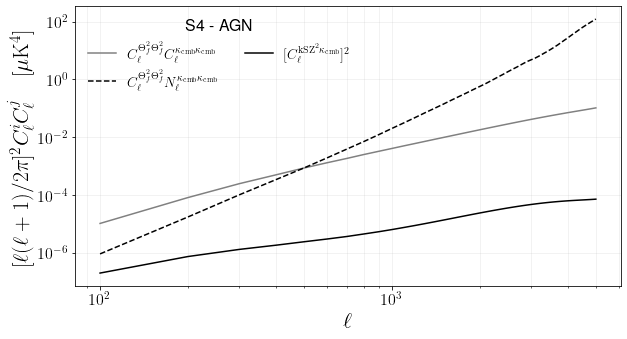

In [287]:


ls,t2t2dgdg,t2t2nldgdg,ksz2dgksz2dg,ksz2dgtot,ksz2dg1h,ksz2dg2h,ksz2dg3h,lensing,total,dlerr = np.loadtxt(path_to_kSZ2X_2022+'cov_and_sum_s4_l_t2t2kk_t2t2nlkk_ksz2kksz2k_ksz2ktot_ksz2k1h_ksz2k2h_ksz2k3h_lensing_total_dlerr.txt',unpack=True)


label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1


plt.plot(ls,t2t2dgdg,
         c='grey',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$')

plt.plot(ls,t2t2nldgdg,
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}N_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$',
         ls='--',
        c='k')

plt.plot(ls,ksz2dgksz2dg,
         label=r'$[C_\ell^{\mathrm{kSZ}^2\kappa_\mathrm{cmb}}]^2$',
         c='k'
        )



ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]^2C_\ell^i C_\ell^j\quad [\mathrm{\mu K^4}]$',size=title_size)

ax.grid(which='both',alpha=0.2)

ax.legend(title='S4 - AGN',
          loc=2,
          ncol=2,
          frameon=False,
          fontsize=14)
# ax.set_ylim(5e-9,1e2)

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'S4_covmat_terms.pdf')

### everything plot

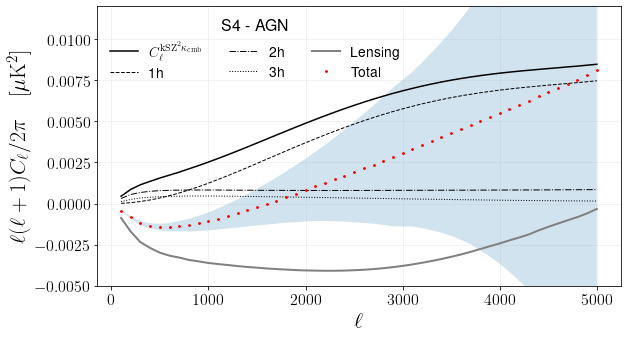

In [291]:

ls,t2t2dgdg,t2t2nldgdg,ksz2dgksz2dg,ksz2dgtot,ksz2dg1h,ksz2dg2h,ksz2dg3h,lensing,total,dlerr = np.loadtxt(path_to_kSZ2X_2022+'cov_and_sum_s4_l_t2t2kk_t2t2nlkk_ksz2kksz2k_ksz2ktot_ksz2k1h_ksz2k2h_ksz2k3h_lensing_total_dlerr.txt',unpack=True)



label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1


plt.plot(ls,ksz2dgtot,
         label=r'$C_\ell^{\mathrm{kSZ}^2\kappa_\mathrm{cmb}}$',
         c='k'
        )

plt.plot(ls,ksz2dg1h,
         label=r'1h',
         c='k',
         ls='--',
         lw=1.
        )
plt.plot(ls,ksz2dg2h,
         label=r'2h',
         c='k',
         ls ='-.',
         lw=1.
        )

plt.plot(ls,ksz2dg3h,
         label=r'3h',
         c='k',
         ls=':',
         lw=1.
        )

plt.plot(ls,lensing,
         label=r'Lensing',
         c='grey',
         ls='-',
         lw=2
        )



plt.plot(ls,total,
         label=r'Total',
         c='r',
         ls='None',
         lw=1,
         marker='o',
         markersize=1.8
        )

plt.fill_between(ls,total-dlerr,total+dlerr,alpha=0.2)


ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)

ax.legend(title='S4 - AGN',
          loc=2,
          ncol=3,
          frameon=False,
          fontsize=14)
ax.set_ylim(-0.005,0.012)
# ax.set_xscale('log')

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'S4_everything_plot.pdf')

# clkk plot

In [2]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({
    'output': 'lCl,lens_lens_1h,lens_lens_2h,lens_lens_hf',
    'l_max_scalars':20000.,
#     'mass function' : 'T08M200c',
#     'hm_consistency': 1,
# #     'T10_alpha_fixed' : 0,
#     'n_m_dndlnM' : 200,
    #'m_min_counter_terms' : 1e9,
# 'delta for galaxies': '200c',
#  'concentration parameter': 'B13',
'ell_max': 20000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.0001,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.0001,
    
'M_min':1e10,
'M_max':1e+17,
'z_min':1e-5,
'z_max': 15.,
    
'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 200.0,

    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
# 'concentration parameter':'B13',
'non linear':'halofit',
'perturb_sampling_stepsize' : 0.005,
'k_max_tau0_over_l_max':5.,
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'x_out_truncated_nfw_profile_satellite_galaxies':1.09,
# 'f_cen_HOD': 0.12,
# 'Delta_z_lens':0.00,
# 'Delta_z_source':1.07e-3,

# 'cmb_lensing_noise_file' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
})
M.compute()

cl_kk = M.cl_kk

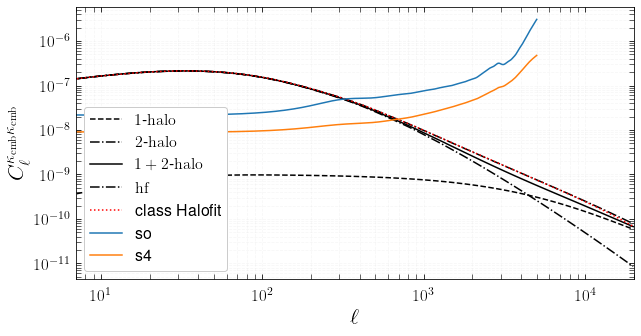

In [4]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(10,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk()['ell'])
fac = ell*(ell+1.)/2./np.pi
cl_kk_1h = np.asarray(cl_kk()['1h'])
cl_kk_2h = np.asarray(cl_kk()['2h'])
cl_kk_hf = np.asarray(cl_kk()['hf'])

# # ell = np.asarray(cl_gg()['ell'])
# cl_km_1h = np.asarray(cl_km()['1h'])
# cl_km_2h = np.asarray(cl_km()['2h'])

ax.plot(ell,cl_kk_1h/fac,ls='--',c='k',label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac,ls='-.',c='k',label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac+cl_kk_1h/fac,ls='-',c='k',label=r'$\mathrm{1+2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_hf/fac,ls='-.',c='k',label=r'$\mathrm{hf}$')
# M.raw_cl()['ell']
# M.raw_cl()['pp']

class_cls, = ax.plot(M.raw_cl()['ell'],
                     M.raw_cl()['pp']*(M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2.)**2.,
                     ls=':',c='r',label=r'class Halofit')



nl_kk_l,nl_kk_nl = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_lensing_noise.dat',unpack=True)
ax.plot(nl_kk_l,nl_kk_nl,label='so')

nl_kk_l,nl_kk_nl = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_lensing_noise.dat',unpack=True)
ax.plot(nl_kk_l,nl_kk_nl,label='s4')

plt.legend(frameon=True,framealpha=1)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(7e0,2.e4)
plt.savefig(path_to_kSZ2X_2022+'clkk_so_s4.pdf')

# vrms2 plot

In [18]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({

    'output': 'vrms2',
    'pk_nonlinear_for_vrms2': 0
})
M.compute()
z = np.linspace(1.e-2,3.,100)
vrms2 = []
for zz in z:
  vrms2.append(M.get_vrms2_at_z(zz))
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({
    'output': 'vrms2',
    'non linear': 'halofit',
    'pk_nonlinear_for_vrms2': 1
})
M.compute()


z = np.linspace(1.e-3,3.,100)
vrms2_halofit = []
for zz in z:
  vrms2_halofit.append(M.get_vrms2_at_z(zz))
M.struct_cleanup()
M.empty()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({
    'output': 'vrms2',
    'non linear': 'hmcode',
    'pk_nonlinear_for_vrms2': 1
})
M.compute()


z = np.linspace(1.e-3,3.,100)
vrms2_hmcode = []
for zz in z:
  vrms2_hmcode.append(M.get_vrms2_at_z(zz))
M.struct_cleanup()
M.empty()

In [20]:
np.savetxt(path_to_kSZ2X_2022+'sigv2_z_lin_hf_hm.txt',np.c_[z,vrms2,vrms2_halofit,vrms2_hmcode])

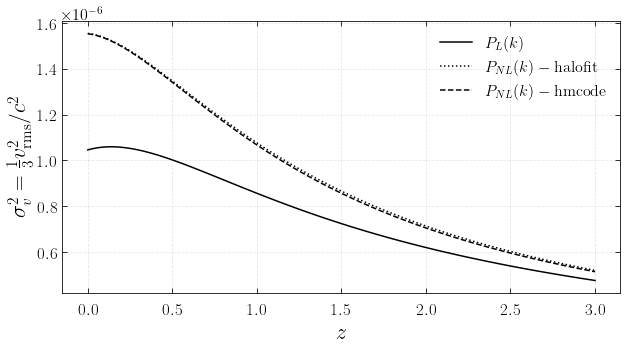

In [29]:
z,vrms2,vrms2_halofit,vrms2_hmcode = np.loadtxt(path_to_kSZ2X_2022+'sigv2_z_lin_hf_hm.txt',unpack=True)

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(10,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$\sigma_v^2=\frac{1}{3}v_\mathrm{rms}^2/c^2$",size=title_size)
ax.set_xlabel(r"$z$",size=title_size)



plt.plot(z,vrms2,label=r'$P_L(k)$',c='k')
plt.plot(z,vrms2_halofit,label=r'$P_{NL}(k)-\mathrm{halofit}$',c='k',ls=':')
plt.plot(z,vrms2_hmcode,label=r'$P_{NL}(k)-\mathrm{hmcode}$',c='k',ls='--')
plt.xscale('linear')
plt.yscale('linear')
plt.legend(loc=2)

plt.grid(which='both',alpha=0.3)
plt.legend(loc=1,framealpha=0)
plt.savefig(path_to_kSZ2X_2022+'vrms2.pdf')

In [33]:
print(vrms2_halofit[0])
print(np.sqrt(3.*vrms2_halofit[0])*299792)


1.5552424712877201e-06
647.5595619898335


In [34]:
print(vrms2[0])
print(np.sqrt(3.*vrms2[0])*299792)


1.0463303794517335e-06
531.1474297812368


# Bispectrum plots

## check validity of triangles

In [13]:
# Validity of Triangle given sides

# Function definition to check validity
def is_valid_triangle(a,b,c):
    if a+b>=c and b+c>=a and c+a>=b:
        return True
    else:
        return False

# Reading Three Sides
side_a = float(input('Enter length of side a: '))
side_b = float(input('Enter length of side b: '))
side_c = float(input('Enter length of side c: '))

# Function call & making decision

if is_valid_triangle(side_a, side_b, side_c):
    print('Triangle is Valid.')
else:
    print('Triangle is Invalid.')

Enter length of side a: 1
Enter length of side b: 10
Enter length of side c: 10
Triangle is Valid.


In [25]:
# Validity of Triangle given sides

# Function definition to check validity
def is_valid_triangle(a,b,c):
    if a+b>=c and b+c>=a and c+a>=b:
        return True
    else:
        return False

# Reading Three Sides
side_a = float(input('Enter length of side a: '))
side_b = float(input('Enter length of side b: '))
side_c = float(input('Enter length of side c: '))

# Function call & making decision

if is_valid_triangle(side_a, side_b, side_c):
    print('Triangle is Valid.')
else:
    print('Triangle is Invalid.')

Enter length of side a: 1
Enter length of side b: 1
Enter length of side c: 0.1
Triangle is Valid.


In [22]:
# Validity of Triangle given sides

# Function definition to check validity
def is_valid_triangle(a,b,c):
    if a+b>=c and b+c>=a and c+a>=b:
        return True
    else:
        return False

# Reading Three Sides
side_a = float(input('Enter length of side a: '))
side_b = float(input('Enter length of side b: '))
side_c = float(input('Enter length of side c: '))

# Function call & making decision

if is_valid_triangle(side_a, side_b, side_c):
    print('Triangle is Valid.')
else:
    print('Triangle is Invalid.')

Enter length of side a: 1
Enter length of side b: 0.5
Enter length of side c: 0.5
Triangle is Valid.


## matter bispectrum

### compute

In [26]:

zz = 1.
# M_min = 1e8
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set({
#     'mass function' : 'T10',
#     'M_min': M_min,
#     'M_max': 1e16,
#     'hm_consistency':1,
    'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
#     'non linear': 'halofit',


    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1e-4,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    "dlnk_for_pk_hm" : 0.01,
    "z_for_pk_hm" : zz,
    "k_min_for_pk_hm" : 1e-4,
    "k_max_for_pk_hm" : 2e1,
})
M.compute()
bk_at_z_hm = M.bk_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC = []
Bk1_GM = []
Qk1_TL = []
Qk1 = []
Bk1_TL = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = k1
  #mu = np.cos(0.6*np.pi)
  k3 = k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))




lambda2 = 1.
lambda3 = 0.1





M.set({

    "bispectrum_lambda_2" : lambda2,
    "bispectrum_lambda_3" : lambda3
})
M.compute()
bk_at_z_hm_sq = M.bk_at_z_hm()

Qk1_smoothed = []
Qk1_SC = []
Bk1_SC_sq = []
Bk1_GM_sq = []
Qk1_TL = []
Qk1 = []
Bk1_TL_sq = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = lambda2*k1
  #mu = np.cos(0.6*np.pi)
  k3 = lambda3*k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

#   Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL_sq.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
#   Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC_sq.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
#   Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
#   Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM_sq.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))





lambda2 = 0.5
lambda3 = 0.5






    
M.set({

    "bispectrum_lambda_2" : lambda2,
    "bispectrum_lambda_3" : lambda3
})
M.compute()
bk_at_z_hm_f = M.bk_at_z_hm()


Qk1_smoothed = []
Qk1_SC = []
Bk1_SC_f = []
Bk1_GM_f = []
Qk1_TL = []
Qk1 = []
Bk1_TL_f = []
Q3n = []
nlk1 = []
nlk1_no_wiggles = []
pk_linear = []
pk_halofit = []
for k1 in k1_a:
  n = M.get_nl_index_at_z_and_k(z,k1)
  n_no_wiggles = M.get_nl_index_at_z_and_k_no_wiggles(z,k1)
  nlk1.append(n)
  nlk1_no_wiggles.append(n_no_wiggles)
  Q3n.append(4.-2.**n/(1.+2**(n+1.)))
  k2 = lambda2*k1
  #mu = np.cos(0.6*np.pi)
  k3 = lambda3*k1#np.sqrt(k1**2+k2**2+2*k1*k2*mu)
    
  # Note the conversions between Mpc to Mpc/h
  pk1 = M.pk_nonlin(k1*h,z)*h**3
  pk_halofit.append(pk1)
  pk2 = M.pk_nonlin(k2*h,z)*h**3
  pk3 = M.pk_nonlin(k3*h,z)*h**3
  pk1lin = M.pk_lin(k1*h,z)*h**3
  pk_linear.append(pk1lin)
  pk2lin = M.pk_lin(k2*h,z)*h**3
  pk3lin = M.pk_lin(k3*h,z)*h**3

  Qk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z)/(pk1lin*pk2lin + pk2lin*pk3lin + pk3lin*pk1lin))
  Bk1_TL_f.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
  Qk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_SC_f.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
  Qk1.append(M.get_matter_bispectrum_at_z_effective_approach(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Qk1_smoothed.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z)/(pk1*pk2 + pk2*pk3 + pk3*pk1))
  Bk1_GM_f.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))








### save

In [27]:
k = bk_at_z_hm_f['k']
bk_1h_eq = bk_at_z_hm['1h']
bk_2h_eq = bk_at_z_hm['2h']
bk_3h_eq = bk_at_z_hm['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_matter_equi_k_1h_2h_3h.txt',
          np.c_[k,bk_1h_eq,bk_2h_eq,bk_3h_eq])

k_a = k1_a
Bk1_SC_eq = np.asarray(Bk1_SC)
Bk1_GM_eq = np.asarray(Bk1_GM) 
Bk1_TL_eq = np.asarray(Bk1_TL)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_matter_equi_k_SC_GM_TL.txt',
          np.c_[k_a,Bk1_SC_eq,Bk1_GM_eq,Bk1_TL_eq])


k = bk_at_z_hm_f['k']
bk_1h_sq = bk_at_z_hm_sq['1h']
bk_2h_sq = bk_at_z_hm_sq['2h']
bk_3h_sq = bk_at_z_hm_sq['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_matter_squeezed_k_1h_2h_3h.txt',
          np.c_[k,bk_1h_sq,bk_2h_sq,bk_3h_sq])

k_a = k1_a
Bk1_SC_sq = np.asarray(Bk1_SC_sq)
Bk1_GM_sq = np.asarray(Bk1_GM_sq) 
Bk1_TL_sq = np.asarray(Bk1_TL_sq)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_matter_squeezed_k_SC_GM_TL.txt',
          np.c_[k_a,Bk1_SC_sq,Bk1_GM_sq,Bk1_TL_sq])


k = bk_at_z_hm_f['k']
bk_1h_f = bk_at_z_hm_f['1h']
bk_2h_f = bk_at_z_hm_f['2h']
bk_3h_f = bk_at_z_hm_f['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_matter_flattened_k_1h_2h_3h.txt',
          np.c_[k,bk_1h_f,bk_2h_f,bk_3h_f])

k_a = k1_a
Bk1_SC_f = np.asarray(Bk1_SC_f)
Bk1_GM_f = np.asarray(Bk1_GM_f) 
Bk1_TL_f = np.asarray(Bk1_TL_f)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_matter_flattened_k_SC_GM_TL.txt',
          np.c_[k_a,Bk1_SC_f,Bk1_GM_f,Bk1_TL_f])

### plot

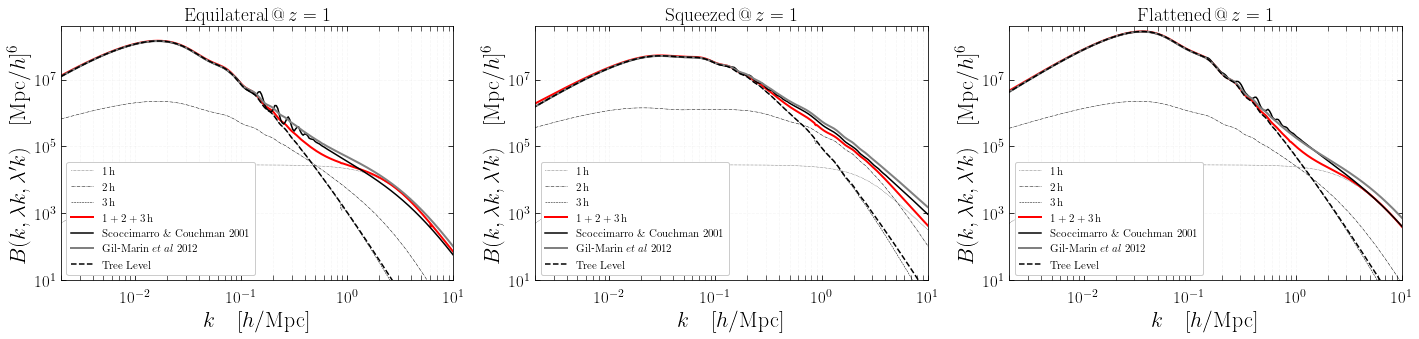

In [186]:

k,bk_1h_eq,bk_2h_eq,bk_3h_eq = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_matter_equi_k_1h_2h_3h.txt',
          unpack=True)

k_a,Bk1_SC_eq,Bk1_GM_eq,Bk1_TL_eq = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_matter_equi_k_SC_GM_TL.txt',
          unpack = True)

k,bk_1h_sq,bk_2h_sq,bk_3h_sq = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_matter_squeezed_k_1h_2h_3h.txt',
          unpack = True)

k_a,Bk1_SC_sq,Bk1_GM_sq,Bk1_TL_sq = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_matter_squeezed_k_SC_GM_TL.txt',
          unpack = True)


k,bk_1h_f,bk_2h_f,bk_3h_f = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_matter_flattened_k_1h_2h_3h.txt',
          unpack = True)

k_a,Bk1_SC_f,Bk1_GM_f,Bk1_TL_f = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_matter_flattened_k_SC_GM_TL.txt',
          unpack = True)

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

ax.plot(k,bk_1h_eq,label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(k,bk_2h_eq,label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(k,bk_3h_eq,label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(k,np.asarray(bk_1h_eq)+np.asarray(bk_2h_eq)+np.asarray(bk_3h_eq),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)


ax.plot(k_a,np.asarray(Bk1_SC_eq),label=r'$\mathrm{Scoccimarro}$ $\&$ $\mathrm{Couchman}$ $2001$',alpha=1.,c='k')
ax.plot(k_a,np.asarray(Bk1_GM_eq),label=r'$\mathrm{Gil}$-$\mathrm{Marin}$ $et$ $al$ $2012$',alpha=1.,c='grey',lw=2.,ls='-')
ax.plot(k_a,np.asarray(Bk1_TL_eq),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,c='k',lw=1.5,ls='--')
ax.loglog()

ax.set_ylim(1e1,4e8)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)

ax.set_title(r'$\mathrm{Equilateral}\,@\, z=1$')




    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

ax.plot(k,bk_1h_sq,label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(k,bk_2h_sq,label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(k,bk_3h_sq,label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(k,np.asarray(bk_1h_sq)+np.asarray(bk_2h_sq)+np.asarray(bk_3h_sq),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)


ax.plot(k_a,np.asarray(Bk1_SC_sq),label=r'$\mathrm{Scoccimarro}$ $\&$ $\mathrm{Couchman}$ $2001$',alpha=1.,c='k')
ax.plot(k_a,np.asarray(Bk1_GM_sq),label=r'$\mathrm{Gil}$-$\mathrm{Marin}$ $et$ $al$ $2012$',alpha=1.,c='grey',lw=2.,ls='-')
ax.plot(k_a,np.asarray(Bk1_TL_sq),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,c='k',lw=1.5,ls='--')
ax.loglog()

ax.set_ylim(1e1,4e8)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{Squeezed}\,@\, z=1$')



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

ax.plot(k,bk_1h_f,label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(k,bk_2h_f,label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(k,bk_3h_f,label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(k,np.asarray(bk_1h_f)+np.asarray(bk_2h_f)+np.asarray(bk_3h_f),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)


ax.plot(k_a,np.asarray(Bk1_SC_f),label=r'$\mathrm{Scoccimarro}$ $\&$ $\mathrm{Couchman}$ $2001$',alpha=1.,c='k')
ax.plot(k_a,np.asarray(Bk1_GM_f),label=r'$\mathrm{Gil}$-$\mathrm{Marin}$ $et$ $al$ $2012$',alpha=1.,c='grey',lw=2.,ls='-')
ax.plot(k_a,np.asarray(Bk1_TL_f),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,c='k',lw=1.5,ls='--')
ax.loglog()

ax.set_ylim(1e1,4e8)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11,ncol=1)
ax.set_title(r'$\mathrm{Flattened}\,@\, z=1$')

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'bk_z1_wct_matter.pdf')











## TTG Bispectrum - NFW

### compute

In [187]:

zz = 1.

M = Class()

M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT
'gas profile':'nfw', 
'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',
'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,
'k_min_for_pk_hm':0.005,
'k_max_for_pk_hm':10.0,
    
})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()

z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = k1
  k3 = k1
  Bk_TTG_HF.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
    
    

lambda2 = 1.
lambda3 = 0.1



M.set({

"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_sq = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_sq = []
Bk_TTG_TL_sq = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))

    

lambda2 = 0.5
lambda3 = 0.5

M.set({

"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_f = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_f = []
Bk_TTG_TL_f = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))

### save

In [188]:
k = bk_ttg_at_z_hm_f['k']
bk_1h_eq = bk_ttg_at_z_hm['1h']
bk_2h_eq = bk_ttg_at_z_hm['2h']
bk_3h_eq = bk_ttg_at_z_hm['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_equi_k_1h_2h_3h.txt',
          np.c_[k,bk_1h_eq,bk_2h_eq,bk_3h_eq])

k_a = k1_a

Bk1_HF_eq = np.asarray(Bk_TTG_HF) 
Bk1_TL_eq = np.asarray(Bk_TTG_TL)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_equi_k_HF_TL.txt',
          np.c_[k_a,Bk1_HF_eq,Bk1_TL_eq])


k = bk_ttg_at_z_hm_f['k']
bk_1h_sq = bk_ttg_at_z_hm_sq['1h']
bk_2h_sq = bk_ttg_at_z_hm_sq['2h']
bk_3h_sq = bk_ttg_at_z_hm_sq['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_squeezed_k_1h_2h_3h.txt',
          np.c_[k,bk_1h_sq,bk_2h_sq,bk_3h_sq])

k_a = k1_a

Bk1_HF_sq = np.asarray(Bk_TTG_HF_sq) 
Bk1_TL_sq = np.asarray(Bk_TTG_TL_sq)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_squeezed_k_HF_TL.txt',
          np.c_[k_a,Bk1_HF_sq,Bk1_TL_sq])


k = bk_ttg_at_z_hm_f['k']
bk_1h_f = bk_ttg_at_z_hm_f['1h']
bk_2h_f = bk_ttg_at_z_hm_f['2h']
bk_3h_f = bk_ttg_at_z_hm_f['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_flattened_k_1h_2h_3h.txt',
          np.c_[k,bk_1h_f,bk_2h_f,bk_3h_f])

k_a = k1_a

Bk1_HF_f = np.asarray(Bk_TTG_HF_f) 
Bk1_TL_f = np.asarray(Bk_TTG_TL_f)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_flattened_k_HF_TL.txt',
          np.c_[k_a,Bk1_HF_f,Bk1_TL_f])

### plot

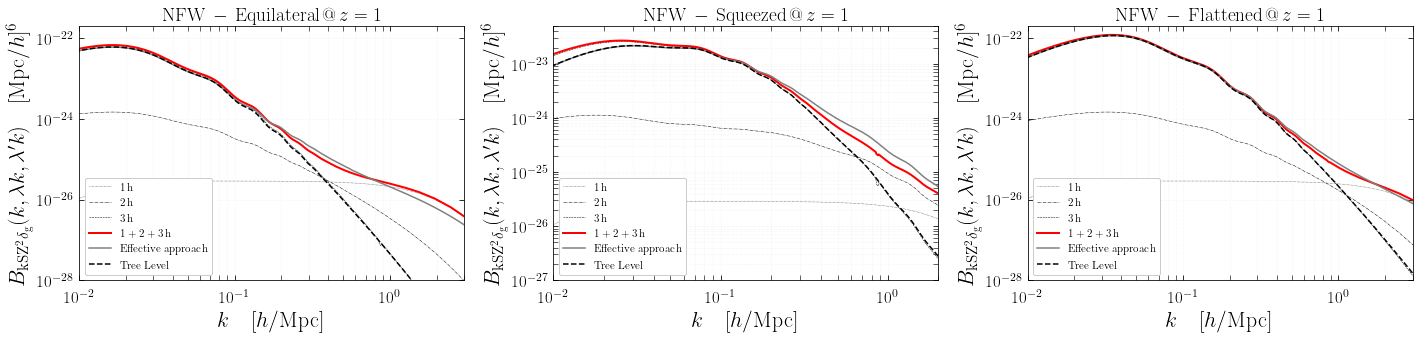

In [189]:
bk_ttg_at_z_hm = {'k':None,'1h':None,'2h':None,'3h':None}
bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],bk_ttg_at_z_hm['2h'],bk_ttg_at_z_hm['3h'] = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_equi_k_1h_2h_3h.txt',unpack=True)

k1_a,Bk_TTG_HF,Bk_TTG_TL = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_equi_k_HF_TL.txt',unpack=True)

bk_ttg_at_z_hm_sq = {'k':None,'1h':None,'2h':None,'3h':None}
bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['1h'],bk_ttg_at_z_hm_sq['2h'],bk_ttg_at_z_hm_sq['3h'] = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_squeezed_k_1h_2h_3h.txt',unpack=True)

k1_a,Bk_TTG_HF_sq,Bk_TTG_TL_sq = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_squeezed_k_HF_TL.txt',unpack=True)

bk_ttg_at_z_hm_f = {'k':None,'1h':None,'2h':None,'3h':None}
bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['1h'],bk_ttg_at_z_hm_f['2h'],bk_ttg_at_z_hm_f['3h'] = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_flattened_k_1h_2h_3h.txt',unpack=True)

k1_a,Bk_TTG_HF_f,Bk_TTG_TL_f = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_nfw_flattened_k_HF_TL.txt',unpack=True)




label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B_\mathrm{kSZ^2\delta_g}(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()

ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)

ax.set_title(r'$\mathrm{NFW\,-\,Equilateral}\,@\, z=1$')




    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B_\mathrm{kSZ^2\delta_g}(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],np.asarray(bk_ttg_at_z_hm_sq['1h'])+np.asarray(bk_ttg_at_z_hm_sq['2h'])+np.asarray(bk_ttg_at_z_hm_sq['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_sq),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_sq),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)


ax.loglog()

ax.set_ylim(1e-27,5e-23)
ax.set_xlim(1e-2,2e0)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{NFW\,-\,Squeezed}\,@\, z=1$')



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B_\mathrm{kSZ^2\delta_g}(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],np.asarray(bk_ttg_at_z_hm_f['1h'])+np.asarray(bk_ttg_at_z_hm_f['2h'])+np.asarray(bk_ttg_at_z_hm_f['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_f),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_f),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()

ax.set_ylim(1e1,3e8)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{NFW\,-\,Flattened}\,@\, z=1$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'bk_ttg_z1_nfw.pdf')






## TTG Bispectrum - AGN

### compute

In [190]:

zz = 1.

M = Class()

M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',
'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,
'k_min_for_pk_hm':0.005,
'k_max_for_pk_hm':10.0,
    
})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()

z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = k1
  k3 = k1
  Bk_TTG_HF.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
    
    

lambda2 = 1.
lambda3 = 0.1



M.set({

"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_sq = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_sq = []
Bk_TTG_TL_sq = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))

    

lambda2 = 0.5
lambda3 = 0.5


M.set({

"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_f = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_f = []
Bk_TTG_TL_f = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))

### save

In [191]:
k = bk_ttg_at_z_hm_f['k']
bk_1h_eq = bk_ttg_at_z_hm['1h']
bk_2h_eq = bk_ttg_at_z_hm['2h']
bk_3h_eq = bk_ttg_at_z_hm['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_equi_k_1h_2h_3h.txt',
          np.c_[k,bk_1h_eq,bk_2h_eq,bk_3h_eq])

k_a = k1_a

Bk1_HF_eq = np.asarray(Bk_TTG_HF) 
Bk1_TL_eq = np.asarray(Bk_TTG_TL)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_equi_k_HF_TL.txt',
          np.c_[k_a,Bk1_HF_eq,Bk1_TL_eq])


k = bk_ttg_at_z_hm_f['k']
bk_1h_sq = bk_ttg_at_z_hm_sq['1h']
bk_2h_sq = bk_ttg_at_z_hm_sq['2h']
bk_3h_sq = bk_ttg_at_z_hm_sq['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_squeezed_k_1h_2h_3h.txt',
          np.c_[k,bk_1h_sq,bk_2h_sq,bk_3h_sq])

k_a = k1_a

Bk1_HF_sq = np.asarray(Bk_TTG_HF_sq) 
Bk1_TL_sq = np.asarray(Bk_TTG_TL_sq)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_squeezed_k_HF_TL.txt',
          np.c_[k_a,Bk1_HF_sq,Bk1_TL_sq])


k = bk_ttg_at_z_hm_f['k']
bk_1h_f = bk_ttg_at_z_hm_f['1h']
bk_2h_f = bk_ttg_at_z_hm_f['2h']
bk_3h_f = bk_ttg_at_z_hm_f['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_flattened_k_1h_2h_3h.txt',
          np.c_[k,bk_1h_f,bk_2h_f,bk_3h_f])

k_a = k1_a

Bk1_HF_f = np.asarray(Bk_TTG_HF_f) 
Bk1_TL_f = np.asarray(Bk_TTG_TL_f)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_flattened_k_HF_TL.txt',
          np.c_[k_a,Bk1_HF_f,Bk1_TL_f])

### plot

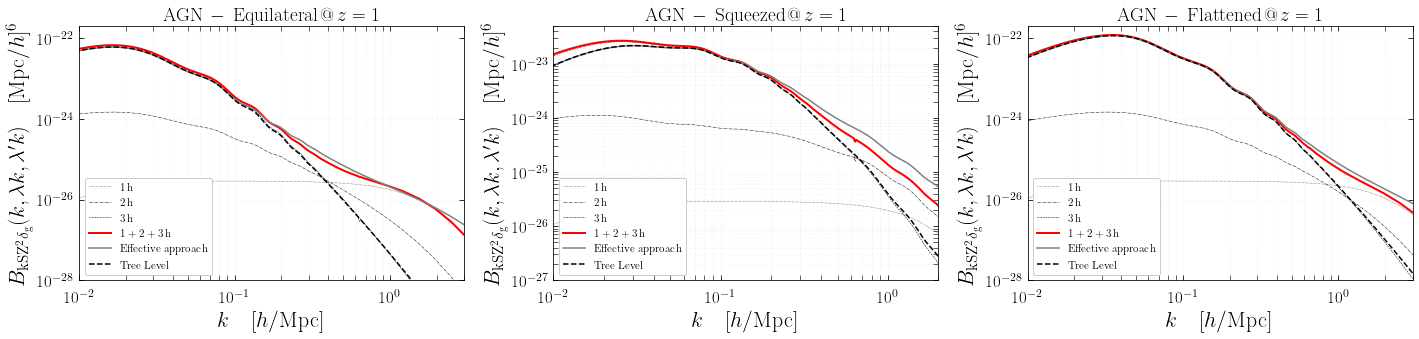

In [192]:

bk_ttg_at_z_hm = {'k':None,'1h':None,'2h':None,'3h':None}
bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],bk_ttg_at_z_hm['2h'],bk_ttg_at_z_hm['3h'] = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_equi_k_1h_2h_3h.txt',unpack=True)

k1_a,Bk_TTG_HF,Bk_TTG_TL = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_equi_k_HF_TL.txt',unpack=True)

bk_ttg_at_z_hm_sq = {'k':None,'1h':None,'2h':None,'3h':None}
bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['1h'],bk_ttg_at_z_hm_sq['2h'],bk_ttg_at_z_hm_sq['3h'] = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_squeezed_k_1h_2h_3h.txt',unpack=True)

k1_a,Bk_TTG_HF_sq,Bk_TTG_TL_sq = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_squeezed_k_HF_TL.txt',unpack=True)

bk_ttg_at_z_hm_f = {'k':None,'1h':None,'2h':None,'3h':None}
bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['1h'],bk_ttg_at_z_hm_f['2h'],bk_ttg_at_z_hm_f['3h'] = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_flattened_k_1h_2h_3h.txt',unpack=True)

k1_a,Bk_TTG_HF_f,Bk_TTG_TL_f = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_flattened_k_HF_TL.txt',unpack=True)





label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B_\mathrm{kSZ^2\delta_g}(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()

ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)

ax.set_title(r'$\mathrm{AGN\,-\,Equilateral}\,@\, z=1$')




    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B_\mathrm{kSZ^2\delta_g}(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],np.asarray(bk_ttg_at_z_hm_sq['1h'])+np.asarray(bk_ttg_at_z_hm_sq['2h'])+np.asarray(bk_ttg_at_z_hm_sq['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_sq),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_sq),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)


ax.loglog()

ax.set_ylim(1e-27,5e-23)
ax.set_xlim(1e-2,2e0)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{AGN\,-\,Squeezed}\,@\, z=1$')



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B_\mathrm{kSZ^2\delta_g}(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],np.asarray(bk_ttg_at_z_hm_f['1h'])+np.asarray(bk_ttg_at_z_hm_f['2h'])+np.asarray(bk_ttg_at_z_hm_f['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_f),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_f),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()

ax.set_ylim(1e1,3e8)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{AGN\,-\,Flattened}\,@\, z=1$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'bk_ttg_z1_agn.pdf')






## TTG Bispectrum - AGN no b2

### compute

In [193]:

zz = 1.

M = Class()

M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',
'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,
'k_min_for_pk_hm':0.005,
'k_max_for_pk_hm':10.0,
'no_b2':1
    
})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()

z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = k1
  k3 = k1
  Bk_TTG_HF.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
    

lambda2 = 1.
lambda3 = 0.1



M.set({

"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_sq = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_sq = []
Bk_TTG_TL_sq = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))

    

lambda2 = 0.5
lambda3 = 0.5


M.set({

"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_f = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_f = []
Bk_TTG_TL_f = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))

### save

In [194]:
k = bk_ttg_at_z_hm_f['k']
bk_1h_eq = bk_ttg_at_z_hm['1h']
bk_2h_eq = bk_ttg_at_z_hm['2h']
bk_3h_eq = bk_ttg_at_z_hm['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_equi_k_1h_2h_3h_nob2.txt',
          np.c_[k,bk_1h_eq,bk_2h_eq,bk_3h_eq])

k_a = k1_a

Bk1_HF_eq = np.asarray(Bk_TTG_HF) 
Bk1_TL_eq = np.asarray(Bk_TTG_TL)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_equi_k_HF_TL_nob2.txt',
          np.c_[k_a,Bk1_HF_eq,Bk1_TL_eq])


k = bk_ttg_at_z_hm_f['k']
bk_1h_sq = bk_ttg_at_z_hm_sq['1h']
bk_2h_sq = bk_ttg_at_z_hm_sq['2h']
bk_3h_sq = bk_ttg_at_z_hm_sq['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_squeezed_k_1h_2h_3h_nob2.txt',
          np.c_[k,bk_1h_sq,bk_2h_sq,bk_3h_sq])

k_a = k1_a

Bk1_HF_sq = np.asarray(Bk_TTG_HF_sq) 
Bk1_TL_sq = np.asarray(Bk_TTG_TL_sq)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_squeezed_k_HF_TL_nob2.txt',
          np.c_[k_a,Bk1_HF_sq,Bk1_TL_sq])


k = bk_ttg_at_z_hm_f['k']
bk_1h_f = bk_ttg_at_z_hm_f['1h']
bk_2h_f = bk_ttg_at_z_hm_f['2h']
bk_3h_f = bk_ttg_at_z_hm_f['3h']

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_flattened_k_1h_2h_3h_nob2.txt',
          np.c_[k,bk_1h_f,bk_2h_f,bk_3h_f])

k_a = k1_a

Bk1_HF_f = np.asarray(Bk_TTG_HF_f) 
Bk1_TL_f = np.asarray(Bk_TTG_TL_f)

np.savetxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_flattened_k_HF_TL_nob2.txt',
          np.c_[k_a,Bk1_HF_f,Bk1_TL_f])

### plot

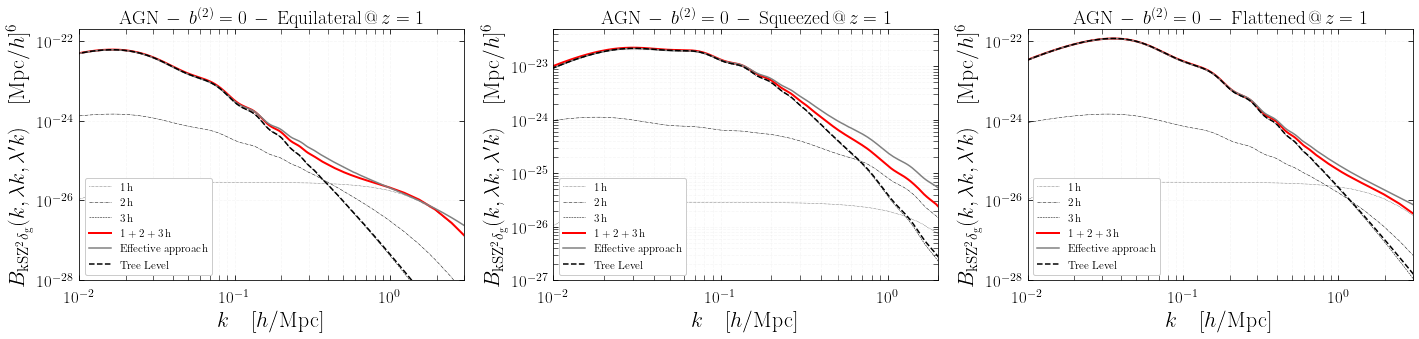

In [195]:

bk_ttg_at_z_hm = {'k':None,'1h':None,'2h':None,'3h':None}
bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],bk_ttg_at_z_hm['2h'],bk_ttg_at_z_hm['3h'] = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_equi_k_1h_2h_3h_nob2.txt',unpack=True)

k1_a,Bk_TTG_HF,Bk_TTG_TL = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_equi_k_HF_TL_nob2.txt',unpack=True)

bk_ttg_at_z_hm_sq = {'k':None,'1h':None,'2h':None,'3h':None}
bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['1h'],bk_ttg_at_z_hm_sq['2h'],bk_ttg_at_z_hm_sq['3h'] = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_squeezed_k_1h_2h_3h_nob2.txt',unpack=True)

k1_a,Bk_TTG_HF_sq,Bk_TTG_TL_sq = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_squeezed_k_HF_TL_nob2.txt',unpack=True)

bk_ttg_at_z_hm_f = {'k':None,'1h':None,'2h':None,'3h':None}
bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['1h'],bk_ttg_at_z_hm_f['2h'],bk_ttg_at_z_hm_f['3h'] = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_flattened_k_1h_2h_3h_nob2.txt',unpack=True)

k1_a,Bk_TTG_HF_f,Bk_TTG_TL_f = np.loadtxt(path_to_kSZ2X_2022+'bk_z1_ttg_agn_flattened_k_HF_TL_nob2.txt',unpack=True)





label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B_\mathrm{kSZ^2\delta_g}(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()

ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)

ax.set_title(r'$\mathrm{AGN}\,-\,b^{(2)}=0\,-\,\mathrm{Equilateral}\,@\, z=1$')




    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B_\mathrm{kSZ^2\delta_g}(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],np.asarray(bk_ttg_at_z_hm_sq['1h'])+np.asarray(bk_ttg_at_z_hm_sq['2h'])+np.asarray(bk_ttg_at_z_hm_sq['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_sq),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_sq),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)


ax.loglog()

ax.set_ylim(1e-27,5e-23)
ax.set_xlim(1e-2,2e0)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{AGN}\,-\,b^{(2)}=0\,-\,\mathrm{Squeezed}\,@\, z=1$')



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B_\mathrm{kSZ^2\delta_g}(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],np.asarray(bk_ttg_at_z_hm_f['1h'])+np.asarray(bk_ttg_at_z_hm_f['2h'])+np.asarray(bk_ttg_at_z_hm_f['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_f),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey',ls='-')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_f),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()

ax.set_ylim(1e1,3e8)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{AGN}\,-\,b^{(2)}=0\,-\,\mathrm{Flattened}\,@\, z=1$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)

fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'bk_ttg_z1_agn_nob2.pdf')






# Power spectrum theory plots 

## galaxy counts (unWISE blue)

### AdvACT - NFW

#### compute

In [73]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        


'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 2.0,

'gas profile' : 'nfw',
'use_bg_at_z_in_ksz2g_eff' : 1,


'x_out_truncated_density_profile (electrons)': 1., 

       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")


computed in 389.5413 seconds


####  save

In [76]:
dls = cl_kSZ_kSZ_g_nfw_advact
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']
dl_hf = dls['hf']

np.savetxt(path_to_kSZ2X_2022+'ttg_dls_advact_nfw_l_1h_2h_3h_hf.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_hf])

### AdvACT - Adiabatic

#### compute

In [79]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        


'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 2.0,

'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,


       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")


computed in 366.1622 seconds


#### save

In [80]:
dls = cl_kSZ_kSZ_g_shock_advact
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']
dl_hf = dls['hf']

np.savetxt(path_to_kSZ2X_2022+'ttg_dls_advact_adiabatic_l_1h_2h_3h_hf.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_hf])

### AdvACT - AGN

#### compute

In [81]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt',        


'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 2.0,

'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,


       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")


computed in 412.6190 seconds


####  save

In [82]:
dls = cl_kSZ_kSZ_g_agn_advact
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']
dl_hf = dls['hf']

np.savetxt(path_to_kSZ2X_2022+'ttg_dls_advact_agn_l_1h_2h_3h_hf.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_hf])

### Planck - NFW

#### compute

In [92]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',
# 'output':'mean_galaxy_bias,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',           

    
# more points to avoid numerical noise:
'ndim_masses' : 100,
'ndim_redshifts' : 100,
'n_ell_density_profile' : 100,
'n_m_density_profile' : 100,
'n_z_density_profile' : 100,
    
    
    
'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 6000.0,
'ell_min' : 2.0,

'gas profile' : 'nfw',
'use_bg_at_z_in_ksz2g_eff' : 1,


'x_out_truncated_density_profile (electrons)': 1., 

       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw_planck = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")


computed in 309.7545 seconds


####  save

In [93]:
dls = cl_kSZ_kSZ_g_nfw_planck
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']
dl_hf = dls['hf']

np.savetxt(path_to_kSZ2X_2022+'ttg_dls_planck_nfw_l_1h_2h_3h_hf.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_hf])

### Planck - Adiabatic

#### compute

In [85]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',           


'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 6000.0,
'ell_min' : 2.0,

'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'shock',
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,


       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock_planck = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")


computed in 394.8117 seconds


#### save

In [86]:
dls = cl_kSZ_kSZ_g_shock_planck
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']
dl_hf = dls['hf']

np.savetxt(path_to_kSZ2X_2022+'ttg_dls_planck_adiabatic_l_1h_2h_3h_hf.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_hf])

### Planck - AGN

#### compute

In [87]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',           


'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 6000.0,
'ell_min' : 2.0,

'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,


       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_planck = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")


computed in 372.9111 seconds


####  save

In [88]:
dls = cl_kSZ_kSZ_g_agn_planck
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']
dl_hf = dls['hf']

np.savetxt(path_to_kSZ2X_2022+'ttg_dls_planck_agn_l_1h_2h_3h_hf.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_hf])

### Plot

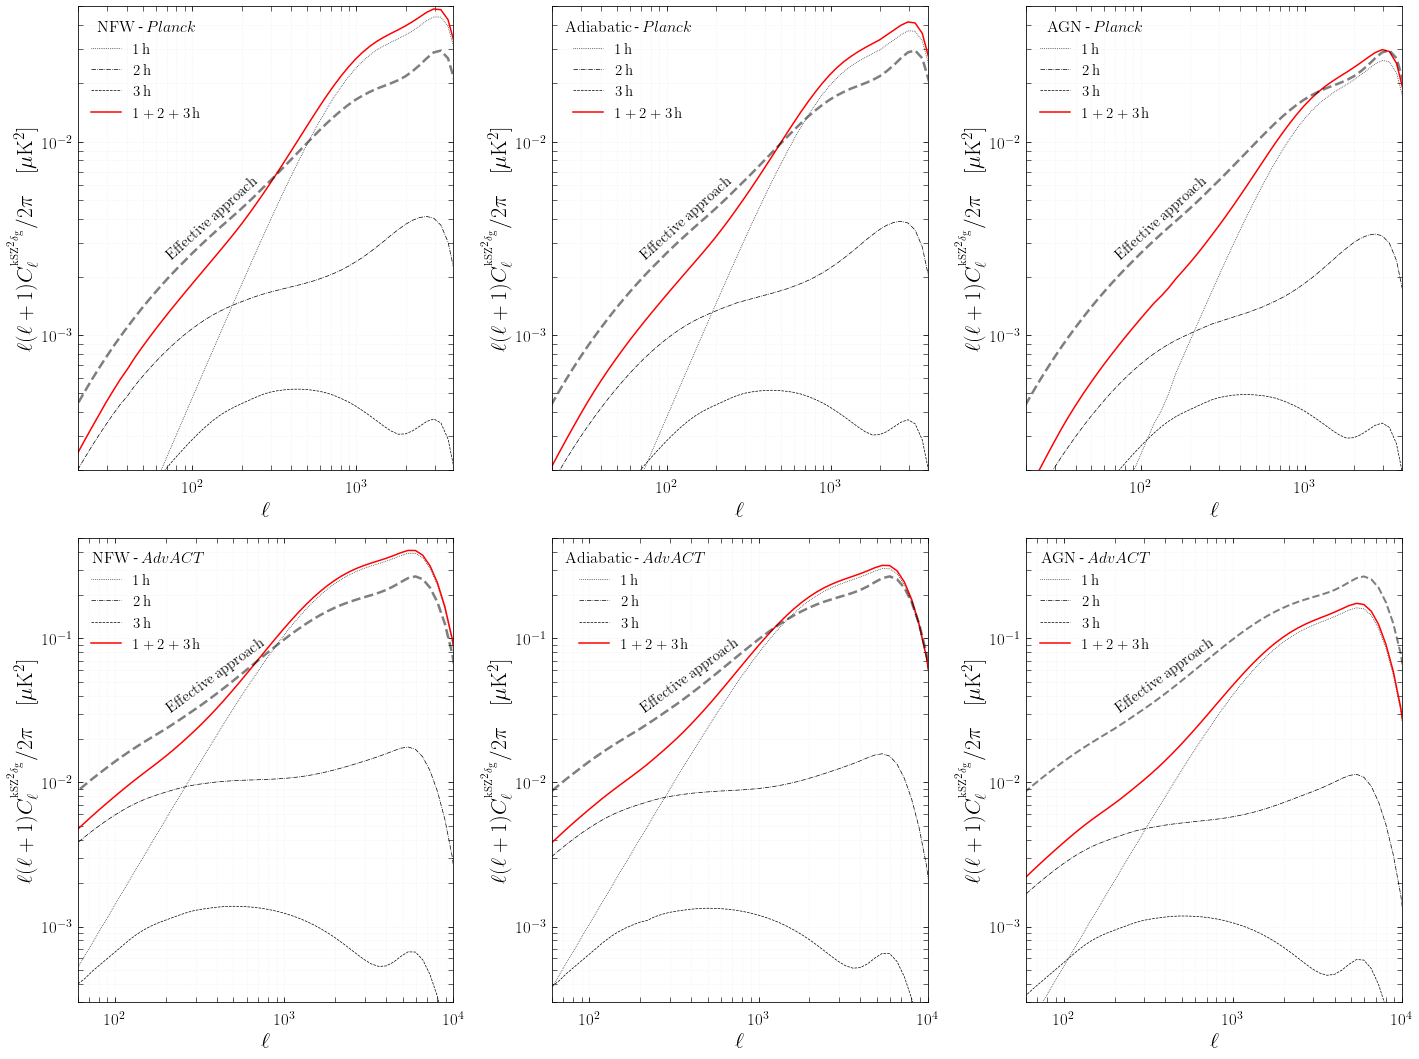

In [3]:

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5

fig, ((ax2,ax4,ax6),(ax3,ax5,ax7)) = plt.subplots(2,3,figsize=(20,15))



ax = ax2 
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None,'hf':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'],cl_kSZ_kSZ_g['hf'] = np.loadtxt(path_to_kSZ2X_2022+'ttg_dls_planck_nfw_l_1h_2h_3h_hf.txt',unpack=True)




fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)



ax.set_xlim(20.,3.9e3)
ax.set_ylim(2e-4,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{NFW}\,$-$\,Planck$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'

props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.64, textstr, transform=ax.transAxes, fontsize=15,rotation=42,
        verticalalignment='top')




ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None,'hf':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'],cl_kSZ_kSZ_g['hf'] = np.loadtxt(path_to_kSZ2X_2022+'ttg_dls_advact_nfw_l_1h_2h_3h_hf.txt',unpack=True)




fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)



ax.set_xlim(60.,10e3)
ax.set_ylim(3e-4,5e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{NFW}\,$-$\,AdvACT$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'

props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.79, textstr, transform=ax.transAxes, fontsize=15,rotation=36,
        verticalalignment='top')




ax = ax4
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')



cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None,'hf':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'],cl_kSZ_kSZ_g['hf'] = np.loadtxt(path_to_kSZ2X_2022+'ttg_dls_planck_adiabatic_l_1h_2h_3h_hf.txt',unpack=True)



fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)



ax.set_xlim(20.,3.9e3)
ax.set_ylim(2e-4,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{Adiabatic}\,$-$\,Planck$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'

props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.64, textstr, transform=ax.transAxes, fontsize=15,rotation=42,
        verticalalignment='top')


ax = ax5
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None,'hf':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'],cl_kSZ_kSZ_g['hf'] = np.loadtxt(path_to_kSZ2X_2022+'ttg_dls_advact_adiabatic_l_1h_2h_3h_hf.txt',unpack=True)




fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)


ax.set_xlim(60.,10e3)
ax.set_ylim(3e-4,5e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{Adiabatic}\,$-$\,AdvACT$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'

props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.79, textstr, transform=ax.transAxes, fontsize=15,rotation=36,
        verticalalignment='top')


    
ax = ax6
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None,'hf':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'],cl_kSZ_kSZ_g['hf'] = np.loadtxt(path_to_kSZ2X_2022+'ttg_dls_planck_agn_l_1h_2h_3h_hf.txt',unpack=True)



fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)



ax.set_xlim(20.,3.9e3)
ax.set_ylim(2e-4,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{AGN}\,$-$\,Planck$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'

props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.64, textstr, transform=ax.transAxes, fontsize=15,rotation=42,
        verticalalignment='top')


ax = ax7
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None,'hf':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'],cl_kSZ_kSZ_g['hf'] = np.loadtxt(path_to_kSZ2X_2022+'ttg_dls_advact_agn_l_1h_2h_3h_hf.txt',unpack=True)



fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.)


ax.set_xlim(60.,10e3)
ax.set_ylim(3e-4,5e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{AGN}\,$-$\,AdvACT$')


    
textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'

props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.79, textstr, transform=ax.transAxes, fontsize=15,rotation=36,
        verticalalignment='top')






fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_ttg_xout_from_nfw.pdf')
# plt.title('agn')

## galaxy lensing (AdvACT x DES)

### NFW

#### compute

In [26]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h), kSZ_kSZ_gallens_hf',

'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
  
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt', 

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 9000.0,
'ell_min' : 2.0,

'gas profile' : 'nfw',
'x_out_truncated_density_profile (electrons)': 1., 

       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw_advact = M.cl_kSZ_kSZ_kg()
print(f"computed in {tf - ti:0.4f} seconds")


computed in 506.5155 seconds


####  save

In [27]:
dls = cl_kSZ_kSZ_g_nfw_advact
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']
dl_hf = dls['hf']
np.savetxt(path_to_kSZ2X_2022+'ttkg_cls_advact_nfw_l_1h_2h_3h_hf.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_hf])

### AGN

#### compute

In [10]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h)',

'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
  
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt', 

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 9000.0,
'ell_min' : 2.0,

'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_advact = M.cl_kSZ_kSZ_kg()
print(f"computed in {tf - ti:0.4f} seconds")


computed in 182.1542 seconds


####  save

In [11]:
dls = cl_kSZ_kSZ_g_agn_advact
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']

np.savetxt(path_to_kSZ2X_2022+'ttkg_cls_advact_agn_l_1h_2h_3h.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h])

### Adiabatic

#### compute

In [12]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h)',

'full_path_to_source_dndz_gal' : path_to_kSZ2X_2022+'external_data/nz_redmagic_source_z_bin3.txt', # source galaxies
  
'ksz_filter_file' : path_to_kSZ2X_2022+'advact_20uK_1p5arcmin_fl_A_170422.txt', 

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 9000.0,
'ell_min' : 2.0,

'gas profile' : 'B16', 
'gas profile mode' : 'shock',
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock_advact = M.cl_kSZ_kSZ_kg()
print(f"computed in {tf - ti:0.4f} seconds")


computed in 191.2677 seconds


####  save

In [13]:
dls = cl_kSZ_kSZ_g_shock_advact
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']

np.savetxt(path_to_kSZ2X_2022+'ttkg_cls_advact_adiabatic_l_1h_2h_3h.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h])

### Plot

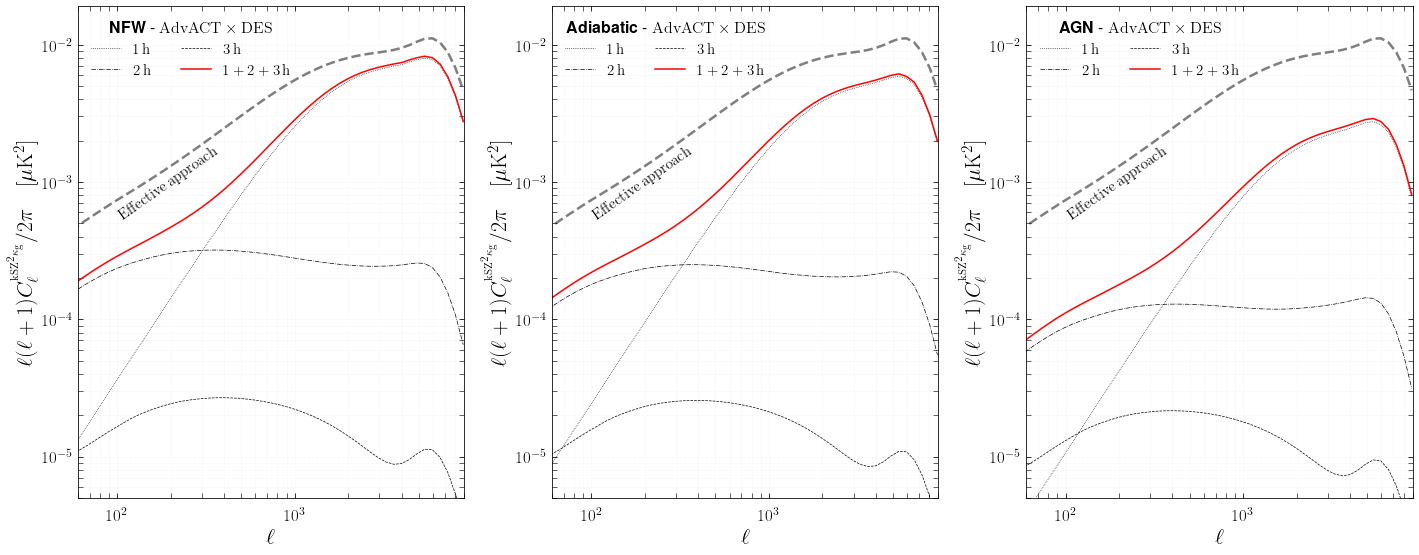

In [310]:

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5

fig, ((ax3,ax5,ax7)) = plt.subplots(1,3,figsize=(20,8))



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None,'hf':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'],cl_kSZ_kSZ_g['hf'] = np.loadtxt(path_to_kSZ2X_2022+'ttkg_cls_advact_nfw_l_1h_2h_3h_hf.txt',unpack=True)

cls_hf = cl_kSZ_kSZ_g['hf'].copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cls_hf),c='k',ls='--',alpha=0.5,lw=2.5)


ax.set_xlim(60.,9.e3)
ax.set_ylim(5e-6,1.9e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,ncol=2,frameon=False,fontsize=15,title=r'\textbf{NFW} - $\mathrm{AdvACT}\times\mathrm{DES}$')

props = dict(boxstyle='None', facecolor='None', alpha=1.)
textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
ax.text(0.1, 0.72, textstr, transform=ax.transAxes, fontsize=15,rotation=35,
        verticalalignment='top')

ax = ax5
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'] = np.loadtxt(path_to_kSZ2X_2022+'ttkg_cls_advact_adiabatic_l_1h_2h_3h.txt',unpack=True)





fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cls_hf),c='k',ls='--',alpha=0.5,lw=2.5)

ax.set_xlim(60.,9.e3)
ax.set_ylim(5e-6,1.9e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,ncol=2,frameon=False,fontsize=15,title=r'\textbf{Adiabatic} - $\mathrm{AdvACT\times DES}$')

props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.1, 0.72, textstr, transform=ax.transAxes, fontsize=15,rotation=35,
        verticalalignment='top')


ax = ax7
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'] = np.loadtxt(path_to_kSZ2X_2022+'ttkg_cls_advact_agn_l_1h_2h_3h.txt',unpack=True)





fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cls_hf),c='k',ls='--',alpha=0.5,lw=2.5)


ax.set_xlim(60.,9.e3)
ax.set_ylim(5e-6,1.9e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,ncol=2,frameon=False,fontsize=15,title=r'\textbf{AGN} - $\mathrm{AdvACT}\times\mathrm{DES}$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'

props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.1, 0.72, textstr, transform=ax.transAxes, fontsize=15,rotation=35,
        verticalalignment='top')





fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_ttkg_xout_from_nfw.pdf')


## cmb lensing (SO)

### NFW

#### compute

In [55]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_hf',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        
    

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 5000.0,
'ell_min' : 100.0,



'gas profile' : 'nfw',
'x_out_truncated_density_profile (electrons)': 1., 

       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()

cl_kSZ_kSZ_g_nfw = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 138.8750 seconds


#### save

In [56]:
dls = cl_kSZ_kSZ_g_nfw
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']
dl_hf = dls['hf']
np.savetxt(path_to_kSZ2X_2022+'ttkcmb_cls_so_nfw_l_1h_2h_3h_hf.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h,dl_hf])

### AGN

#### compute

In [57]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h)',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        
    

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 5000.0,
'ell_min' : 100.0,

'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()

cl_kSZ_kSZ_g_agn = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 48.6537 seconds


#### save

In [58]:
dls = cl_kSZ_kSZ_g_agn
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']

np.savetxt(path_to_kSZ2X_2022+'ttkcmb_cls_so_agn_l_1h_2h_3h.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h])

### Adiabatic

#### compute

In [59]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)

M.set(
    {
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h)',


'ksz_filter_file' : path_to_kSZ2X_2022+'so_fl_A_170422.txt',        
    

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 5000.0,
'ell_min' : 100.0,

'gas profile' : 'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()

cl_kSZ_kSZ_g_shock = M.cl_kSZ_kSZ_kcmb()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 51.8743 seconds


#### save

In [60]:
dls = cl_kSZ_kSZ_g_shock
l = dls['ell']
dl_1h = dls['1h']
dl_2h = dls['2h']
dl_3h = dls['3h']

np.savetxt(path_to_kSZ2X_2022+'ttkcmb_cls_so_adiabatic_l_1h_2h_3h.txt',
          np.c_[l,dl_1h,dl_2h,dl_3h])

### Plot

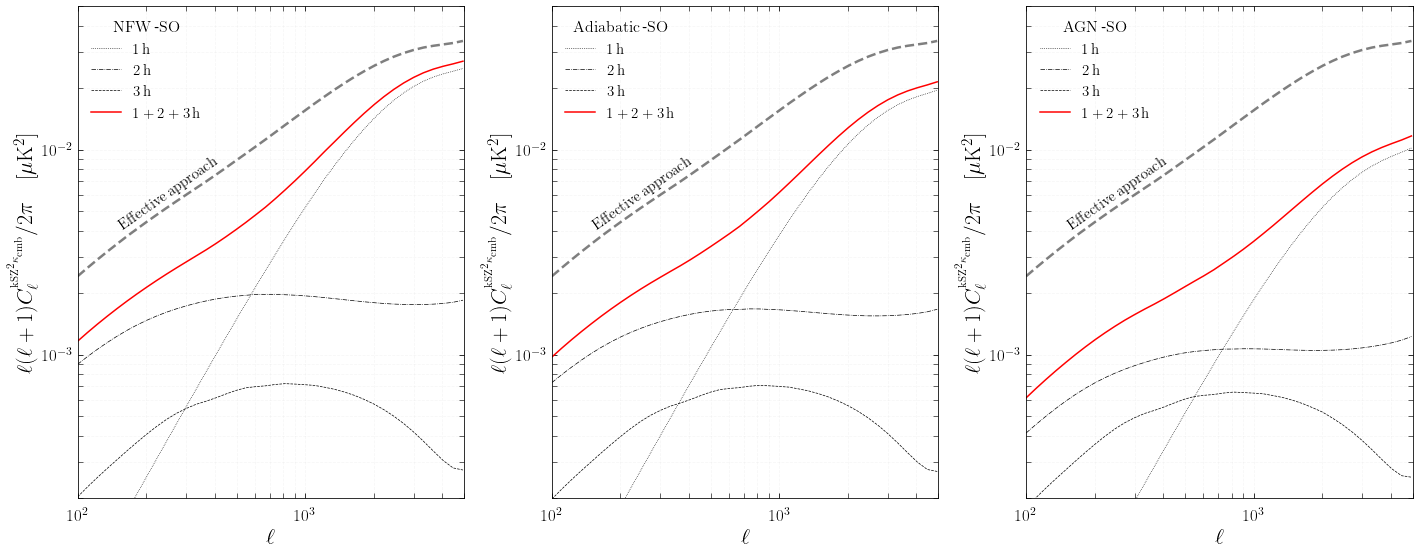

In [67]:

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5

fig, ((ax3,ax5,ax7)) = plt.subplots(1,3,figsize=(20,8))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')




cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None,'hf':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'],cl_kSZ_kSZ_g['hf'] = np.loadtxt(path_to_kSZ2X_2022+'ttkcmb_cls_so_nfw_l_1h_2h_3h_hf.txt',unpack=True)

cls_hf = cl_kSZ_kSZ_g['hf'].copy()



fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cls_hf),c='k',ls='--',alpha=0.5,lw=2.5)


ax.set_xlim(100.,5e3)
ax.set_ylim(2e-4,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{NFW}\,$-$\mathrm{SO}$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'

props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.1, 0.7, textstr, transform=ax.transAxes, fontsize=15,rotation=35,
        verticalalignment='top')

ax = ax5
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'] = np.loadtxt(path_to_kSZ2X_2022+'ttkcmb_cls_so_adiabatic_l_1h_2h_3h.txt',unpack=True)




fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cls_hf),c='k',ls='--',alpha=0.5,lw=2.5)


ax.set_xlim(100.,5e3)
ax.set_ylim(2e-4,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{Adiabatic}\,$-$\mathrm{SO}$')


textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'

props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.1, 0.7, textstr, transform=ax.transAxes, fontsize=15,rotation=35,
        verticalalignment='top')

ax = ax7
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


cl_kSZ_kSZ_g = {'ell':None,'1h':None,'2h':None,'3h':None}
cl_kSZ_kSZ_g['ell'],cl_kSZ_kSZ_g['1h'],cl_kSZ_kSZ_g['2h'],cl_kSZ_kSZ_g['3h'] = np.loadtxt(path_to_kSZ2X_2022+'ttkcmb_cls_so_agn_l_1h_2h_3h.txt',unpack=True)



fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cls_hf),c='k',ls='--',alpha=0.5,lw=2.5)



ax.set_xlim(100.,5e3)
ax.set_ylim(2e-4,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{AGN}\,$-$\mathrm{SO}$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'

props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.1, 0.7, textstr, transform=ax.transAxes, fontsize=15,rotation=35,
        verticalalignment='top')


fig.tight_layout()
plt.savefig(path_to_kSZ2X_2022+'cls_ttkc_xout_from_nfw.pdf')


# 3d power spectra plot

In [3]:
z_for_pk_hm = 1.

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({

'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',

'gas profile':'B16',
'gas profile mode' : 'shock',


'x_out_truncated_density_profile (electrons)': 1., 
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
    


"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
})



M.compute()
pk_at_z_hm = M.pk_at_z_hm()
pk_gg_at_z_hm = M.pk_gg_at_z_hm()
pk_at_z_class_halofit = np.vectorize(M.pk)
pk_bb_at_z_hm_shock = M.pk_bb_at_z_hm()


M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({

'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',

'gas profile':'B16',
'gas profile mode' : 'shock',


'x_out_truncated_density_profile (electrons)': 1., 
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
    
'hm_consistency' : 0,

"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
})



M.compute()
pk_at_z_hm_no_consistency = M.pk_at_z_hm()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({

'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',

'gas profile':'B16',
'gas profile mode' : 'agn',


'x_out_truncated_density_profile (electrons)': 1., 
'normalize_gas_density_profile' : 0,
'use_xout_in_density_profile_from_enclosed_mass' : 1,
    
'non linear':'hmcode',
"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
})
M.compute()
pk_at_z_class_hmcode = np.vectorize(M.pk)
pk_bb_at_z_hm_agn = M.pk_bb_at_z_hm()

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({

'output': 'mean_galaxy_bias,mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',

'gas profile':'nfw',


'x_out_truncated_density_profile (electrons)': 1., 

    


"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-3,
"k_max_for_pk_hm" : 5e1,
    
})

M.compute()

pk_bb_at_z_hm_nfw = M.pk_bb_at_z_hm()




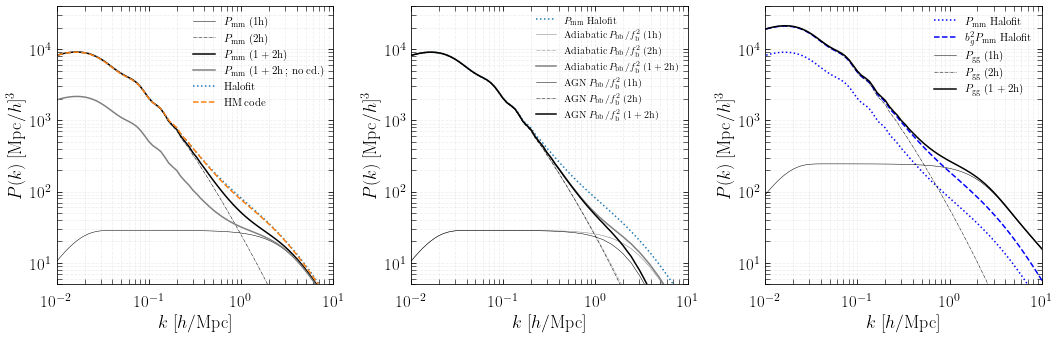

In [34]:
k_arr = np.geomspace(2e-3,1e1,100)

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

z_arr = np.linspace(1e-8,4.,1000)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(5e0,4e4)
ax.set_xlim(1e-2,1e1)

ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = '$P_\mathrm{mm}$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = '$P_\mathrm{mm}$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_at_z_hm['k'],np.asarray(pk_at_z_hm['2h'])+np.asarray(pk_at_z_hm['1h']),label = '$P_\mathrm{mm}$ $\mathrm{(1+2h)}$',c='k',ls='-')

ax.plot(pk_at_z_hm_no_consistency['k'],np.asarray(pk_at_z_hm_no_consistency['2h'])+np.asarray(pk_at_z_hm_no_consistency['1h']),label = '$P_\mathrm{mm}$ $\mathrm{(1+2h\,;\,no\,cd.)}$',c='grey',ls='-')

ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$\mathrm{Halofit}$',ls=':')
ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='$\mathrm{HM\,code}$',ls='--')


ax.legend(fontsize=11,ncol=1,frameon=False)


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(5e0,4e4)
ax.set_xlim(1e-2,1e1)

ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ $\mathrm{Halofit}$',c='b',ls=':')
ax.plot(k_arr/M.h(),M.get_mean_galaxy_bias_at_z(z_for_pk_hm)**2.*pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$b_g^2 P_\mathrm{mm}$ $\mathrm{Halofit}$',ls='--',c='b')


ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = '$P_\mathrm{gg}$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = '$P_\mathrm{gg}$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_gg_at_z_hm['k'],
        np.asarray(pk_gg_at_z_hm['1h'])+np.asarray(pk_gg_at_z_hm['2h']),
        label = '$P_\mathrm{gg}$ $\mathrm{(1+2h)}$',c='k',ls='-')

ax.legend(fontsize=11,ncol=1,frameon=False)

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(5e0,4e4)
ax.set_xlim(1e-2,1e1)


ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ $\mathrm{Halofit}$',ls=':')

ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = '$\mathrm{Adiabatic}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1h)}$',c='grey',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = '$\mathrm{Adiabatic}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(2h)}$',c='grey',ls='-.',lw=0.5)

ax.plot(pk_bb_at_z_hm_shock['k'],(np.asarray(pk_bb_at_z_hm_shock['1h'])+np.asarray(pk_bb_at_z_hm_shock['2h']))*M.get_f_b()**-2.,label = '$\mathrm{Adiabatic}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1+2h)}$',c='grey',ls='-')



ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['1h'])*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1h)}$',c='k',ls='-',lw=0.5)
ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['2h'])*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(2h)}$',c='k',ls='-.',lw=0.5)
ax.plot(pk_bb_at_z_hm_agn['k'],(np.asarray(pk_bb_at_z_hm_agn['1h'])+np.asarray(pk_bb_at_z_hm_agn['2h']))*M.get_f_b()**-2.,label = '$\mathrm{AGN}$ $P_\mathrm{bb}/f_\mathrm{b}^2$ $\mathrm{(1+2h)}$',c='k',ls='-')




ax.legend(fontsize=10,ncol=1,frameon=False)

fig.tight_layout()

plt.savefig(path_to_kSZ2X_2022+'pks.pdf')

# Mass conversion plot

In [55]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)


M.set({# class_sz parameters:
       'output':'m200c_to_m200m,m200c_to_m500c',
       'concentration parameter':'B13',
        })
M.compute()

m200c_to_m200m_B13 = np.vectorize(M.get_m200c_to_m200m_at_z_and_M)
m200c_to_m500c_B13 = np.vectorize(M.get_m200c_to_m500c_at_z_and_M)


L = Class()
L.set(ksz_params)
L.set(common_params)
L.set(cosmo_params)
L.set({# class_sz parameters:
       'output':'m200c_to_m200m,m200c_to_m500c',
       'concentration parameter':'D08',
        })
L.compute()

m200c_to_m200m_D08 = np.vectorize(L.get_m200c_to_m200m_at_z_and_M)
m200c_to_m500c_D08 = np.vectorize(L.get_m200c_to_m500c_at_z_and_M)

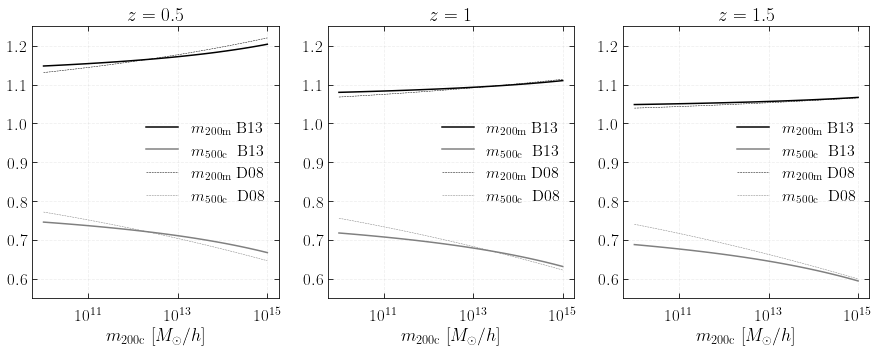

In [78]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
# ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$m_{200\mathrm{c}}$   $[M_\odot/h]$",size=title_size)
ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim(5e0,4e4)
# ax.set_xlim(1e-2,1e1)
ax.set_ylim(0.55,1.25)
ax.set_title(r"$z=0.5$")

zp = 0.5
ax.plot(m200c_arr,m200c_to_m200m_B13(zp,m200c_arr)/m200c_arr,c='k',label=r'$m_{200\mathrm{m}}$ $\mathrm{B13}$')
ax.plot(m200c_arr,m200c_to_m500c_B13(zp,m200c_arr)/m200c_arr,c='grey',label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{B13}$')

ax.plot(m200c_arr,m200c_to_m200m_D08(zp,m200c_arr)/m200c_arr,c='k',ls='--',lw=0.5,label=r'$m_{200\mathrm{m}}$ $\mathrm{D08}$')
ax.plot(m200c_arr,m200c_to_m500c_D08(zp,m200c_arr)/m200c_arr,c='grey',ls='--',lw=0.5,label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{D08}$')
ax.legend(frameon=False)



ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
# ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$m_{200\mathrm{c}}$   $[M_\odot/h]$",size=title_size)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(0.55,1.25)
# ax.set_xlim(1e-2,1e1)
ax.set_title(r"$z=1$")

zp = 1.
ax.plot(m200c_arr,m200c_to_m200m_B13(zp,m200c_arr)/m200c_arr,c='k',label=r'$m_{200\mathrm{m}}$ $\mathrm{B13}$')
ax.plot(m200c_arr,m200c_to_m500c_B13(zp,m200c_arr)/m200c_arr,c='grey',label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{B13}$')

ax.plot(m200c_arr,m200c_to_m200m_D08(zp,m200c_arr)/m200c_arr,c='k',ls='--',lw=0.5,label=r'$m_{200\mathrm{m}}$ $\mathrm{D08}$')
ax.plot(m200c_arr,m200c_to_m500c_D08(zp,m200c_arr)/m200c_arr,c='grey',ls='--',lw=0.5,label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{D08}$')
ax.legend(frameon=False)

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
# ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$m_{200\mathrm{c}}$   $[M_\odot/h]$",size=title_size)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(0.55,1.25)
# ax.set_xlim(1e-2,1e1)
ax.set_title(r"$z=1.5$")

zp = 1.5
ax.plot(m200c_arr,m200c_to_m200m_B13(zp,m200c_arr)/m200c_arr,c='k',label=r'$m_{200\mathrm{m}}$ $\mathrm{B13}$')
ax.plot(m200c_arr,m200c_to_m500c_B13(zp,m200c_arr)/m200c_arr,c='grey',label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{B13}$')

ax.plot(m200c_arr,m200c_to_m200m_D08(zp,m200c_arr)/m200c_arr,c='k',ls='--',lw=0.5,label=r'$m_{200\mathrm{m}}$ $\mathrm{D08}$')
ax.plot(m200c_arr,m200c_to_m500c_D08(zp,m200c_arr)/m200c_arr,c='grey',ls='--',lw=0.5,label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{D08}$')
ax.legend(frameon=False)
plt.savefig(path_to_kSZ2X_2022+'mconv.pdf')

# Comparison with Kusiak et al 

In [123]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf',


        
# 'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',
'ksz_filter_file' :path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 1.00,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff': 1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 22.3972 seconds


In [124]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'comp_kusiaketal_hf_bg1_filterold.txt',
           np.c_[l,cl_tot,covll])

In [127]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',

'ksz_filter_file' : path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',        

'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',


'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

# 'effective_galaxy_bias': 2.23,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
        
        
'gas profile' : 'B16', # set NFW profile
'gas profile mode' : 'agn',

      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 16.3208 seconds


checking effective bias

In [128]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999987642741822
1.9981077380411056


In [129]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(cl_kSZ2X['1h']) + np.asarray(cl_kSZ2X['2h']) + np.asarray(cl_kSZ2X['3h'])
cl_lensing = np.asarray(cl_kSZ2X['lensing term'])
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'hmcalc.txt',
           np.c_[l,cl_tot,cl_lensing,covll])

In [133]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)

M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf',


        
# 'ksz_filter_file' : path_to_kSZ2X_2022+'planck_fl_A_170422.txt',
'ksz_filter_file' :path_to_kSZ2X_2022+'external_data/planck_filter_jch_2016.txt',
        
'full_path_to_noise_curve_for_t_t': path_to_kSZ2X_2022+'nl_planck_47uK_5arcmin_uK2_170422.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

# bg, blue: 1.56; green: 2.23
'effective_galaxy_bias': 1.00,

# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff': 0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 25.7316 seconds


In [137]:
cl_kSZ2X = M.cl_kSZ_kSZ_g().copy()


cl_tot = np.asarray(np.asarray(cl_kSZ2X['hf']))
covll = np.asarray(cl_kSZ2X['covmat'])
l = np.asarray(cl_kSZ2X['ell'])

np.savetxt(path_to_kSZ2X_2022+'comp_kusiaketal_hf_bg1_filterold_nofdndz.txt',
           np.c_[l,cl_tot,covll])

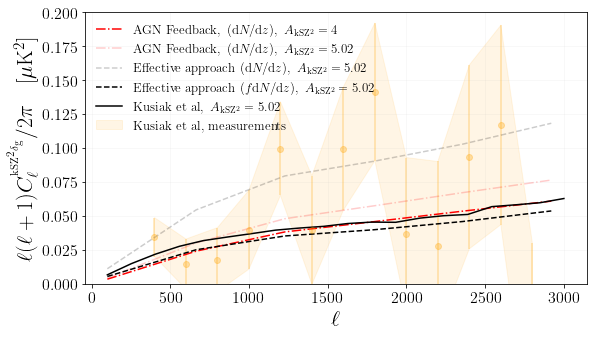

In [55]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

bg_kusiak = 2.23

ax=ax1
l,cl_tot,cl_lensing,covll = np.loadtxt(path_to_kSZ2X_2022+'hmcalc.txt',unpack=True)
# snrl = cl_tot**2/covll
# snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
# print(snrl)
# print(2.*snrl)
fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
# ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,fac_l*4.*cl_tot,
        c='r',ls='-.',
        label=r'$\mathrm{AGN\,\,Feedback},\,\,(\mathrm{d}N/\mathrm{d}z),\,\,A_\mathrm{kSZ^2}=4$')

ax.plot(l,fac_l*5.02*cl_tot,
        c='r',ls='-.', alpha = 0.2,
        label=r'$\mathrm{AGN\,\,Feedback},\,\,(\mathrm{d}N/\mathrm{d}z),\,\,A_\mathrm{kSZ^2}=5.02$')



# l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'snrtot_data_planck_x_uwise_green_filterA_nonlinvel_fsky0p6_bg2p23_sn1p65e-7_nl47uK_b5arcmin_hf_l_cl_covll_170422.txt',unpack=True)
# fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
# # ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
# snrl = cl_tot**2/covll
# snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
# print(snrl)
# print(2.*snrl)
# ax.plot(l,fac_l*cl_tot,label='effective approach')



l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'comp_kusiaketal_hf_bg1_filterold_nofdndz.txt',unpack=True)
# snrl = cl_tot**2/covll
# snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
# print(snrl)
# print(2.*snrl)
fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
# ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
ax.plot(l,5.02*bg_kusiak*fac_l*cl_tot,
        c='k',ls='--',alpha=0.2,
        label=r'$\mathrm{Effective}\,\,\mathrm{approach}\,\,(\mathrm{d}N/\mathrm{d}z),\,\,A_\mathrm{kSZ^2}=5.02$')


l,cl_tot,covll = np.loadtxt(path_to_kSZ2X_2022+'comp_kusiaketal_hf_bg1_filterold.txt',unpack=True)
fac_l = (T_cmb*1e6)**2*l*(l+1.)/2./np.pi
# ax.errorbar(l,fac_l*cl_tot,yerr=fac_l*np.sqrt(covll))
# snrl = cl_tot**2/covll
# snrl = np.sqrt(np.sum(snrl[l<l_max_planck]))
# print(snrl)
# print(2.*snrl)

ax.plot(l,5.02*bg_kusiak*fac_l*cl_tot,
        c='k',ls='--',
        label=r'$\mathrm{Effective}\,\,\mathrm{approach}\,\,(f\mathrm{d}N/\mathrm{d}z),\,\,A_\mathrm{kSZ^2}=5.02$')




path_to_class_external_data = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts'
L_ref_sf_july = np.loadtxt(path_to_class_external_data+'/kSZ2_gal_unwise/07-28-2020-l2Cl_filtered_planck_gilmarin_b1_YESJeans_kSZ2xgals-green.dat')
L_ref_sf_august = np.loadtxt(path_to_class_external_data+'/kSZ2_gal_unwise/08-18-2020-l2Cl_filtered_planck_NLveldisp_b1_NOJeans_kSZ2xgals-green.dat')
bg_green = 1.
smag_green = 0.
bgeff = bg_green
smag = smag_green
shot_noise = 1.81e-2
fac = 1.
# ell_ref_lensmag_sf_august= L_ref_sf_august[0,:]
# kSZ_kSZ_lensmag_1h_ref_sf_august = L_ref_sf_august[1,:]
ell_ref_sf_august= L_ref_sf_august[0,:]
kSZ_kSZ_gal_1h_ref_sf_august = L_ref_sf_august[1,:]
ax.plot(ell_ref_sf_august,5.02*bg_kusiak*kSZ_kSZ_gal_1h_ref_sf_august*fac*bgeff,
        c='k',
        label=r'$\mathrm{Kusiak}\,\,\mathrm{et}\,\,\mathrm{al},\,\,A_\mathrm{kSZ^2}=5.02$')


# ax.plot(ell_ref_sf_august,2.23*kSZ_kSZ_gal_1h_ref_sf_august*fac*bgeff,ls='--',label='Kusiak et al')


Ola_measurements = np.loadtxt('/Users/boris/Work/ksz_bispectra/pink_unwise_green.txt')
err_cell_ola_measurements = Ola_measurements[2,:]
cell_ola_measurements = Ola_measurements[1,:]
ell_ola_measurements = Ola_measurements[0,:]

ax.errorbar(ell_ola_measurements,cell_ola_measurements,yerr=err_cell_ola_measurements,
            marker='o',ls='None',
            alpha=0.3,
            c='orange')

ax.fill_between(ell_ola_measurements,
                cell_ola_measurements-err_cell_ola_measurements,
                cell_ola_measurements+err_cell_ola_measurements,
            label=r'$\mathrm{Kusiak}\,\,\mathrm{et}\,\,\mathrm{al,}\,\,\mathrm{measurements}$',
            color='orange',
            alpha=0.1)



ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)

ax.set_ylim(0.00,0.2)
plt.legend(frameon=False,fontsize=13)
# ax.plot(l,fac_l*cl_lensing)
plt.grid(which='both',alpha=0.1)
plt.savefig(path_to_kSZ2X_2022+'comp_kusiak.pdf')

# AdvACT lensing

In [236]:
import pandas
df = pandas.read_csv(path_to_kSZ2X_2022+'external_data/act_dr6_nlkk.csv')
print(df)

    10.401254700059747   6.15804176086581e-8
0            10.947556          6.100710e-08
1            11.522550          6.084889e-08
2            12.127745          6.016236e-08
3            12.764726          6.011736e-08
4            13.435163          5.939309e-08
..                 ...                   ...
84          806.785897          2.148917e-07
85          849.160414          2.170354e-07
86          893.760552          2.207641e-07
87          940.703206          2.246060e-07
88          978.659160          2.275187e-07

[89 rows x 2 columns]


In [241]:
l_advact_nl = df.iloc[:,0]
nl_advact_nl = df.iloc[:,1]

In [243]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set({
    'output': 'lCl,lens_lens_1h,lens_lens_2h,lens_lens_hf',
    'l_max_scalars':20000.,
#     'mass function' : 'T08M200c',
#     'hm_consistency': 1,
# #     'T10_alpha_fixed' : 0,
#     'n_m_dndlnM' : 200,
    #'m_min_counter_terms' : 1e9,
# 'delta for galaxies': '200c',
#  'concentration parameter': 'B13',
'ell_max': 20000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.0001,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.0001,
    
'M_min':1e10,
'M_max':1e+17,
'z_min':1e-5,
'z_max': 15.,
    
'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 200.0,

    
'ndim_masses' : 128, # important 128 is default ccl value
'ndim_redshifts' : 150,
# 'concentration parameter':'B13',
'non linear':'halofit',
'perturb_sampling_stepsize' : 0.005,
'k_max_tau0_over_l_max':5.,
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'x_out_truncated_nfw_profile_satellite_galaxies':1.09,
# 'f_cen_HOD': 0.12,
# 'Delta_z_lens':0.00,
# 'Delta_z_source':1.07e-3,

# 'cmb_lensing_noise_file' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
})
M.compute()

cl_kk = M.cl_kk

(2e-11, 2e-05)

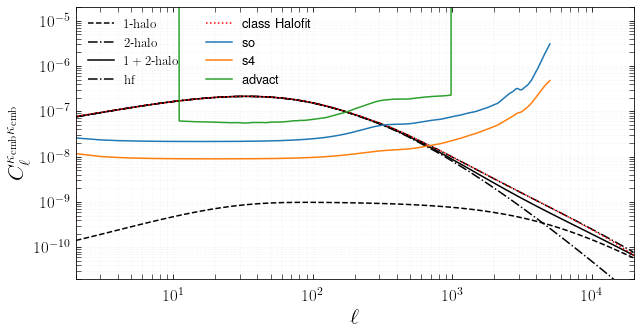

In [259]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(10,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk()['ell'])
fac = ell*(ell+1.)/2./np.pi
cl_kk_1h = np.asarray(cl_kk()['1h'])
cl_kk_2h = np.asarray(cl_kk()['2h'])
cl_kk_hf = np.asarray(cl_kk()['hf'])

# # ell = np.asarray(cl_gg()['ell'])
# cl_km_1h = np.asarray(cl_km()['1h'])
# cl_km_2h = np.asarray(cl_km()['2h'])

ax.plot(ell,cl_kk_1h/fac,ls='--',c='k',label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac,ls='-.',c='k',label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac+cl_kk_1h/fac,ls='-',c='k',label=r'$\mathrm{1+2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_hf/fac,ls='-.',c='k',label=r'$\mathrm{hf}$')
# M.raw_cl()['ell']
# M.raw_cl()['pp']

class_cls, = ax.plot(M.raw_cl()['ell'],
                     M.raw_cl()['pp']*(M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2.)**2.,
                     ls=':',c='r',label=r'class Halofit')



nl_kk_l,nl_kk_nl = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_lensing_noise.dat',unpack=True)
ax.plot(nl_kk_l,nl_kk_nl,label='so')

nl_kk_l,nl_kk_nl = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_lensing_noise.dat',unpack=True)
ax.plot(nl_kk_l,nl_kk_nl,label='s4')

nl_kk_l,nl_kk_nl = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/advact_lensing_noise.dat',unpack=True)
ax.plot(nl_kk_l,nl_kk_nl,label='advact')

plt.legend(frameon=True,framealpha=0,ncol=2,fontsize=13,loc=2)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(2e0,2.e4)
ax.set_ylim(2e-11,2.e-5)
# plt.savefig(path_to_kSZ2X_2022+'clkk_so_s4.pdf')

In [258]:
f_nl_advact = scipy.interpolate.interp1d(
l_advact_nl,
    nl_advact_nl,
    kind='linear',
    axis=-1,
    copy=True,
    bounds_error=False,
    fill_value=1e100,
    assume_sorted=False)
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/advact_lensing_noise.dat',
           np.c_[nl_kk_l,f_nl_advact(nl_kk_l)])